StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 111, 6, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    4891992
request_datetime              0
on_scene_datetime       4891992
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

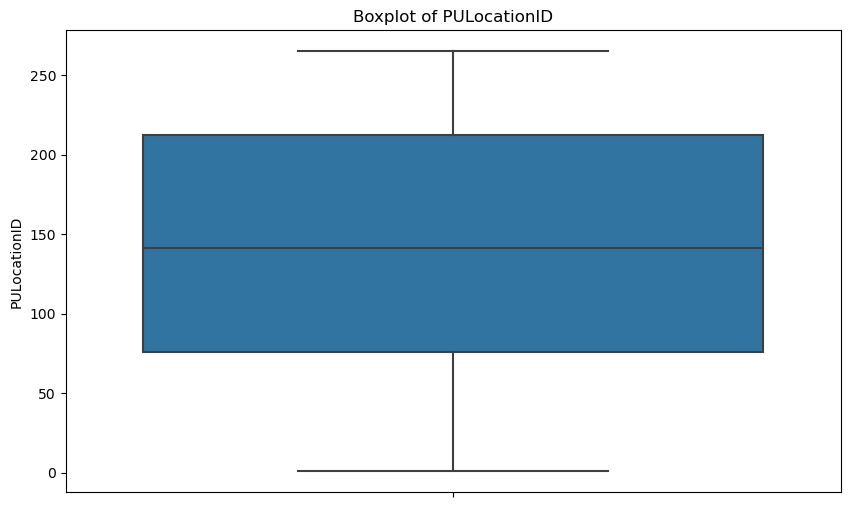

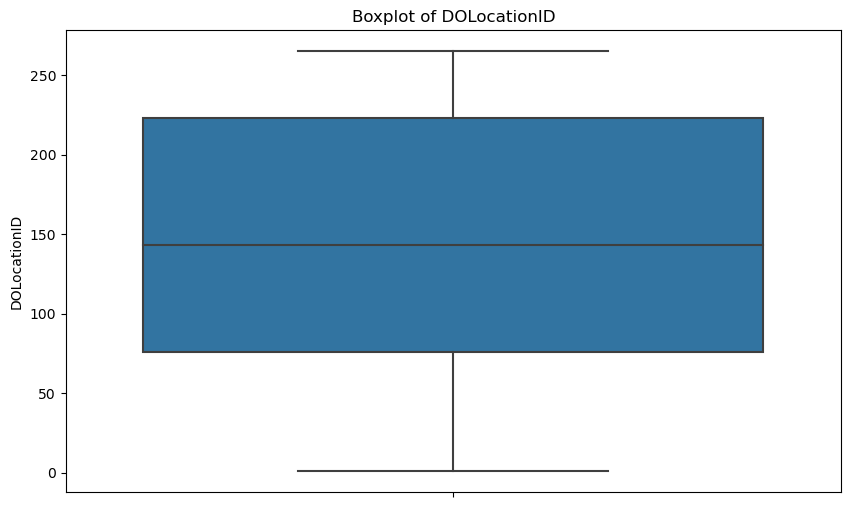

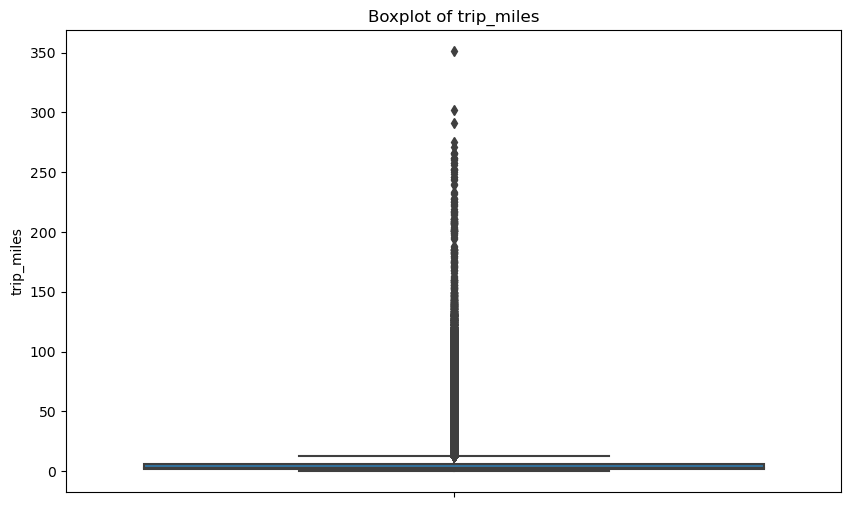

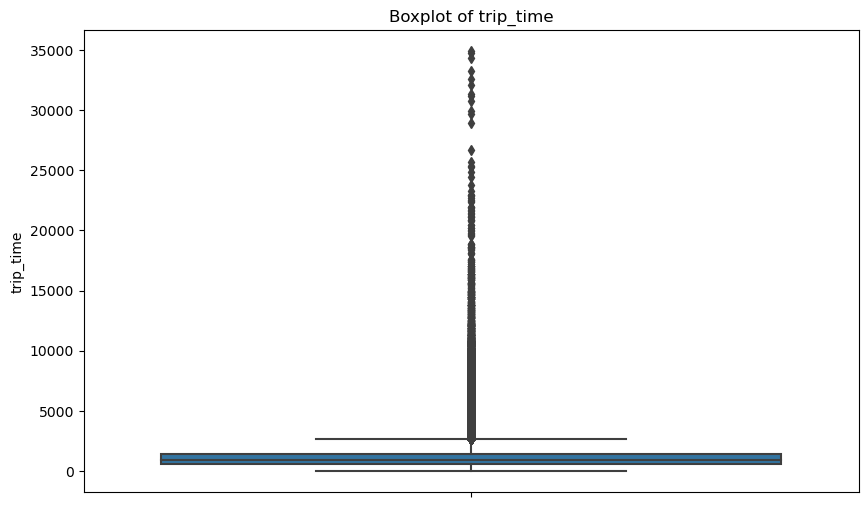

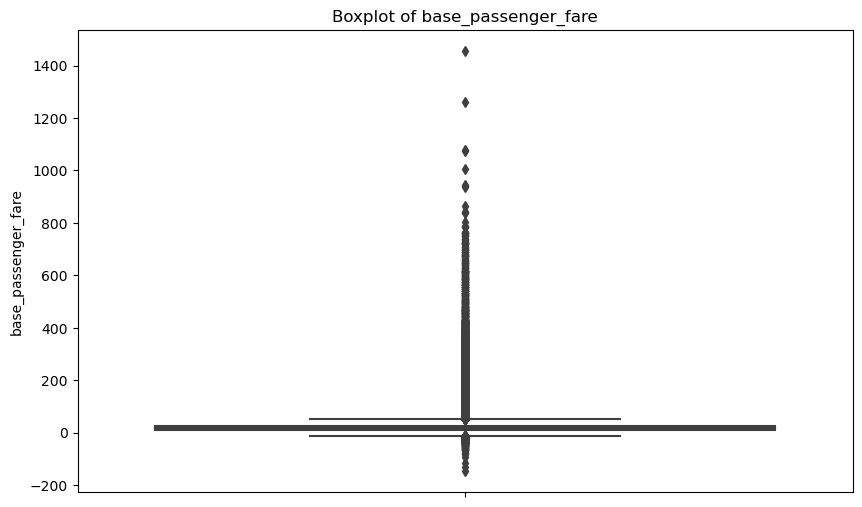

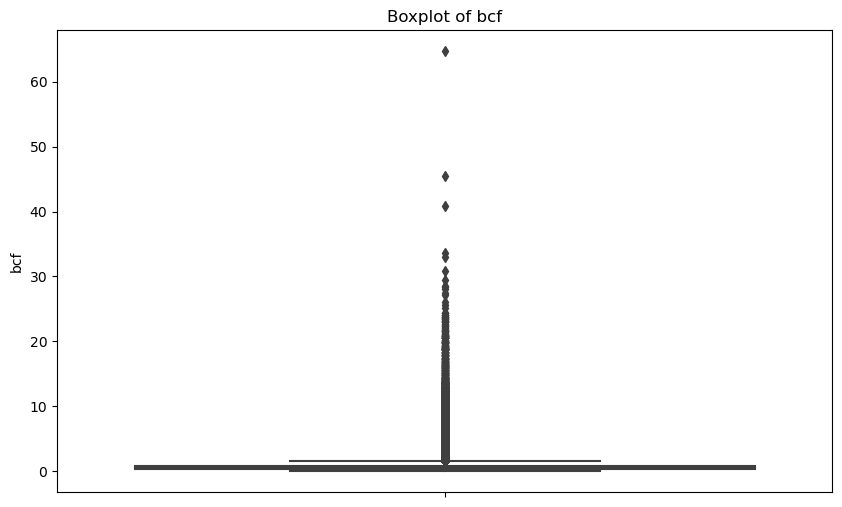

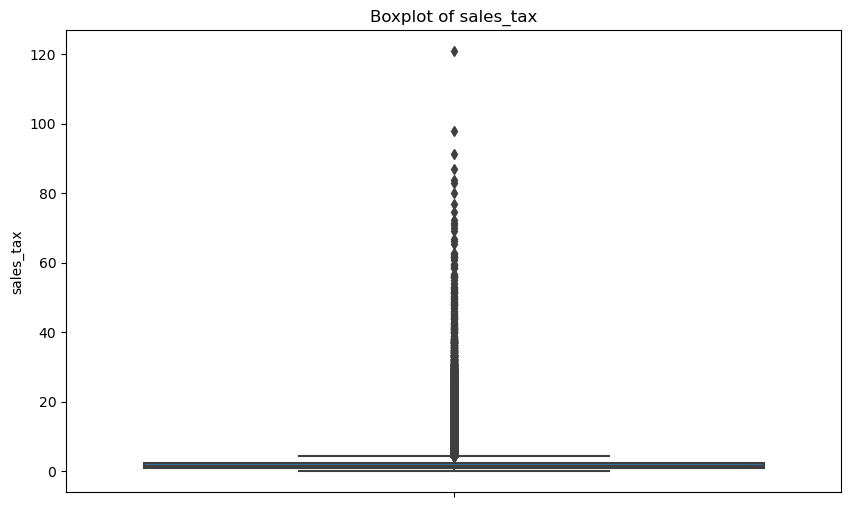

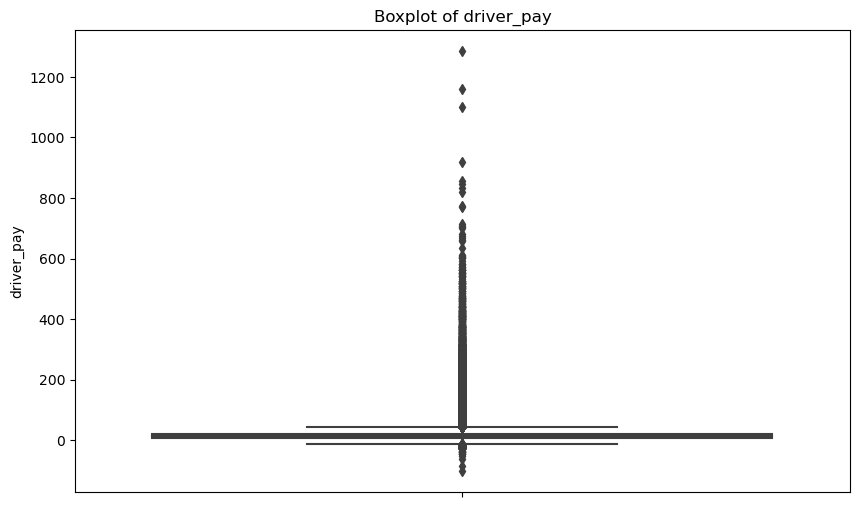

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


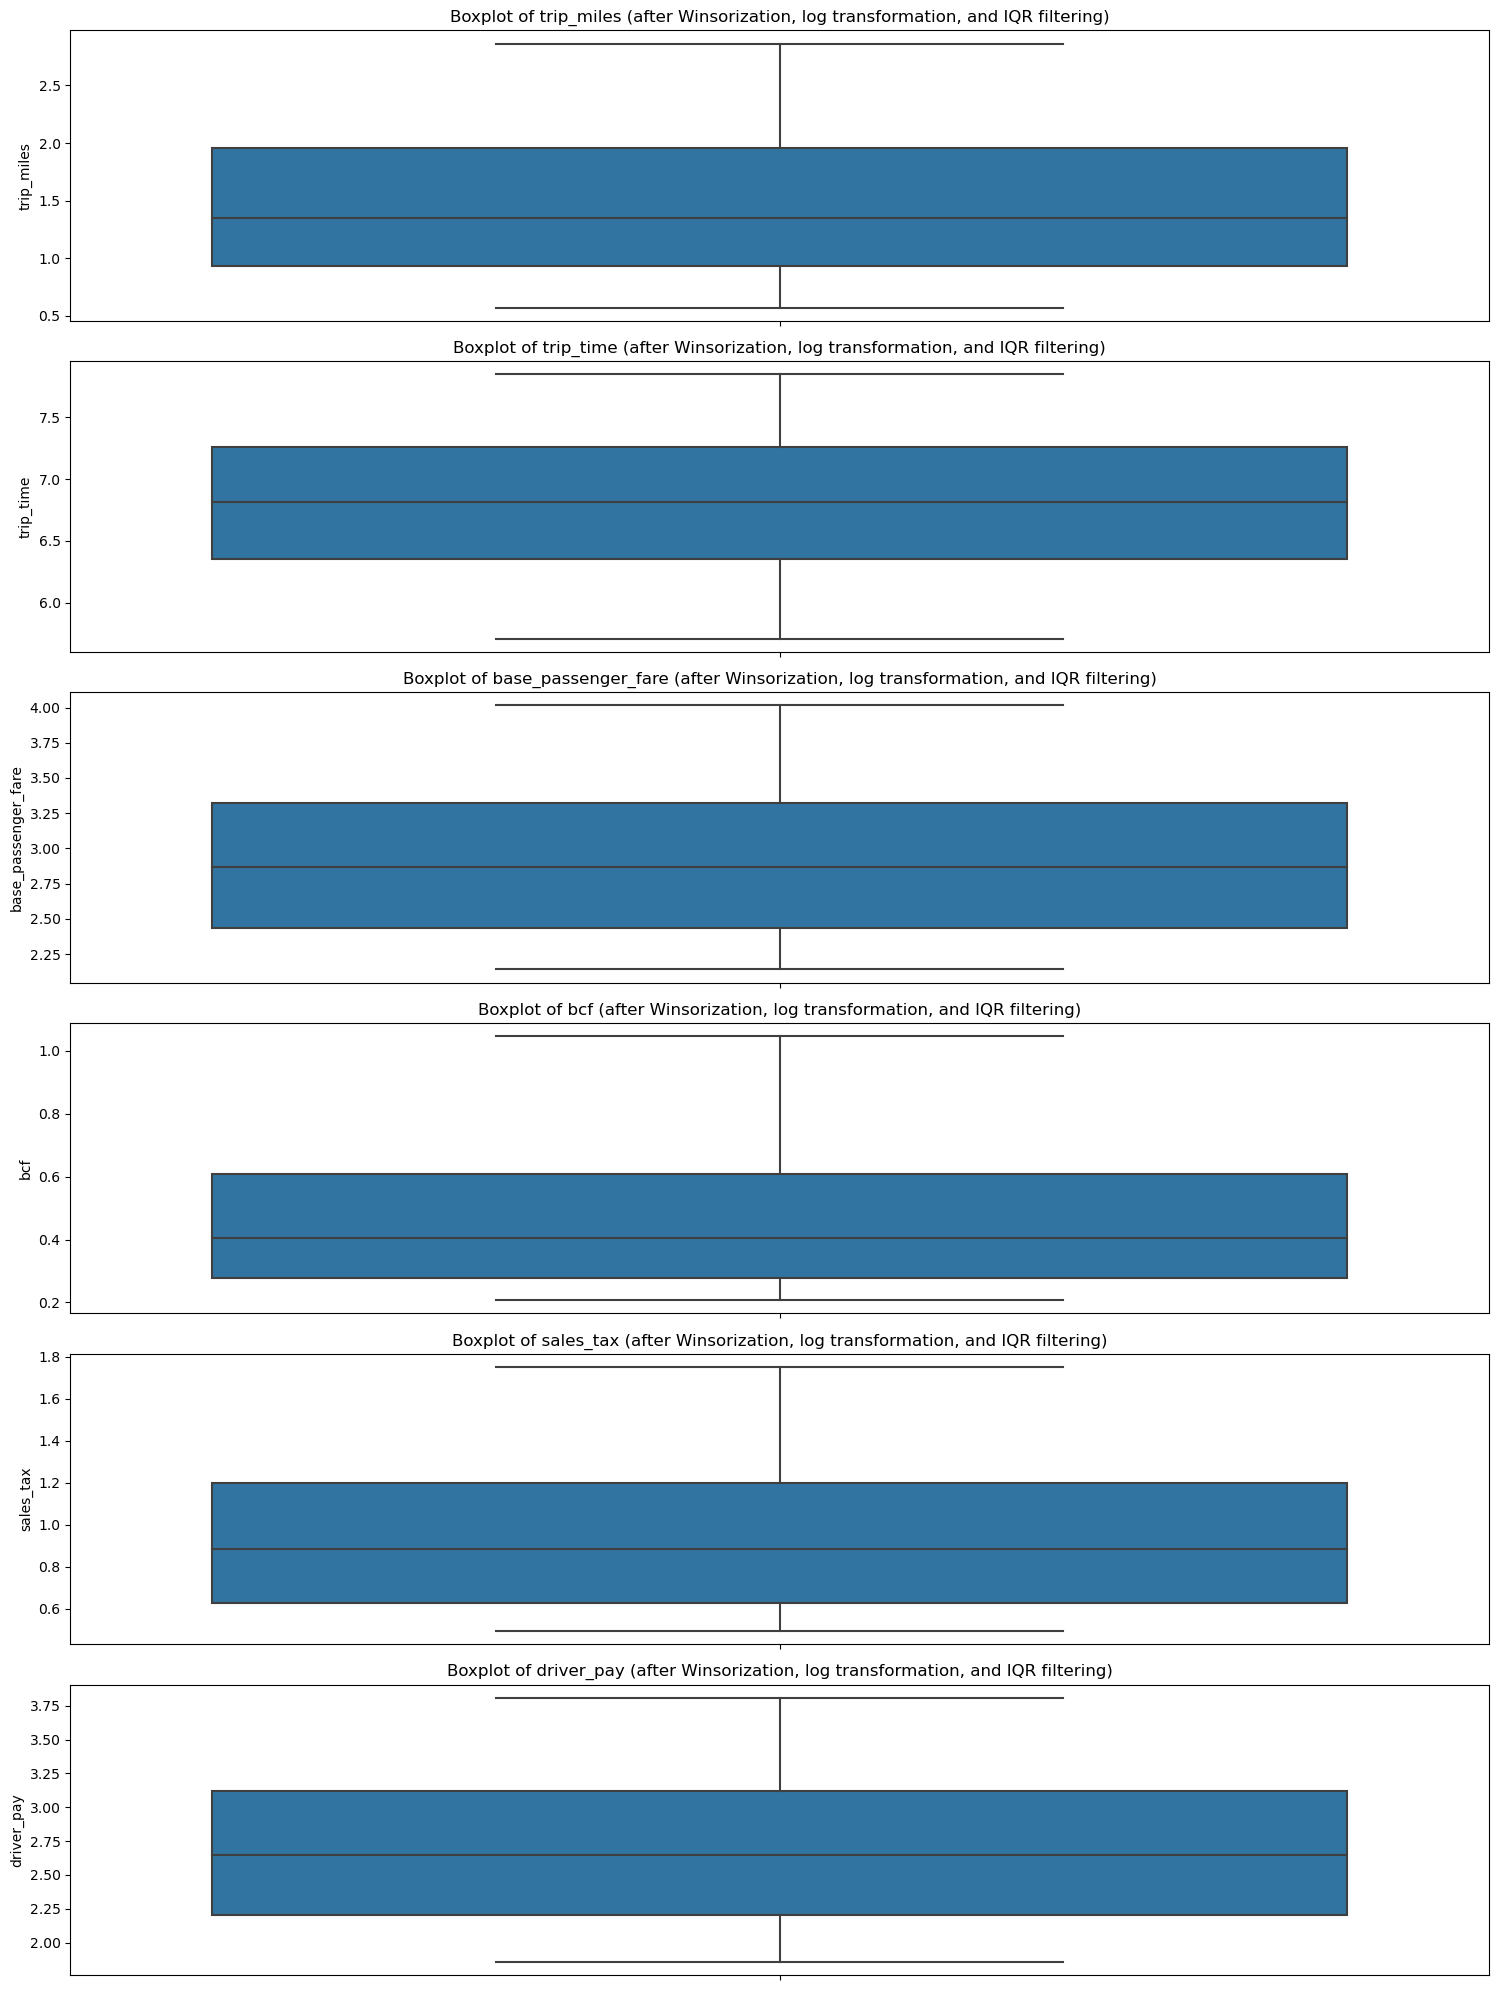

   trip_miles  estimated_emissions  emission_levels
0    0.662688           267.725941                0
1    1.329724           537.208500                0
2    2.283402           922.494519                0
3    0.570980           230.675737                0
4    1.682688           679.806103                0


/tmp/ipykernel_7608/604154903.py:136: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = jan_new.corr()


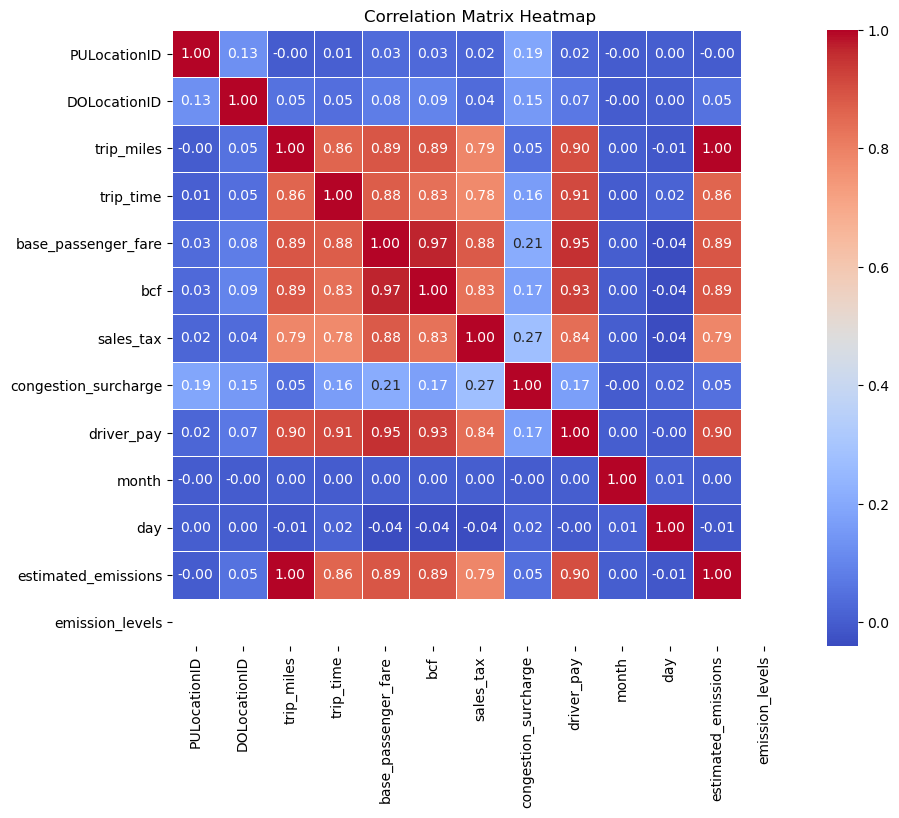

Shape of jan_df: (13579909, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:18:06   
1               B03404               B03404         00:48:42   
2               B03404               B03404         00:15:35   
3               B03404               B03404         00:35:24   
4               B03404               B03404         00:43:15   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:19:24        00:19:38         00:48:07            48   
1          00:56:20        00:58:39         01:33:08           246   
2          00:20:14        00:20:27         00:37:54             9   
3          00:39:30        00:41:05         00:48:16           129   
4          00:51:10        00:52:47         01:04:51           129   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0            68    0.662688   7.444249             3.293983  0.576613   
1           163 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

jan = pd.read_parquet("Users/ekulshre/2023/fhvhv_tripdata_2023-01.parquet")
jan.head()
null_counts = jan.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = jan['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

jan_filtered = jan[~jan['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
jan_filtered = jan_filtered.drop(columns=['airport_fee'])
null_counts = jan_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
jan_filtered.shape
jan_filtered.info()
jan_filtered = jan_filtered.drop(columns=['hvfhs_license_num'])
jan_filtered['date'] = jan_filtered['request_datetime'].dt.date
jan_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
jan_filtered['date'] = pd.to_datetime(jan_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
jan_filtered['request_datetime'] = pd.to_datetime(jan_filtered['request_datetime']).dt.time
jan_filtered['on_scene_datetime'] = pd.to_datetime(jan_filtered['on_scene_datetime']).dt.time
jan_filtered['pickup_datetime'] = pd.to_datetime(jan_filtered['pickup_datetime']).dt.time
jan_filtered['dropoff_datetime'] = pd.to_datetime(jan_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
jan_filtered['month'] = pd.to_datetime(jan_filtered['date']).dt.month
jan_filtered['day'] = pd.to_datetime(jan_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(jan_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(jan_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = jan_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", jan_filtered['month'].unique())

jan_filtered = jan_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips', 'tolls'])
duplicate_count = jan_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
jan_filtered = jan_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = jan_filtered[jan_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

jan_filtered = jan_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(jan_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = jan_filtered[jan_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

jan_filtered = jan_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(jan_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=jan_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
jan_new = jan_filtered.copy()

for column in columns_to_process:
    jan_new[column] = winsorize(jan_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    jan_new[column] = np.log1p(jan_new[column])

for column in columns_to_process:
    Q1 = jan_new[column].quantile(0.25)
    Q3 = jan_new[column].quantile(0.75)
    IQR = Q3 - Q1
    jan_new = jan_new[(jan_new[column] >= (Q1 - 1.5 * IQR)) & (jan_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=jan_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
jan_new['estimated_emissions'] = jan_new['trip_miles'] * emission_factor
emission_threshold = 3000
jan_new['emission_levels'] = jan_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(jan_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = jan_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = jan_new['dispatching_base_num'].value_counts()
top_10_bases = jan_new['dispatching_base_num'].value_counts().head(10).index
jan_new = jan_new[jan_new['dispatching_base_num'].isin(top_10_bases)]
jan_new.shape
jan_new.head()

# Save jan_new to a new DataFrame called jan_df
jan_df = jan_new.copy()

# Display the shape and first few rows of jan_df to verify
print("Shape of jan_df:", jan_df.shape)
print(jan_df.head())


# FEB EDA

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 111, 7, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    4673541
request_datetime              0
on_scene_datetime       4673541
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

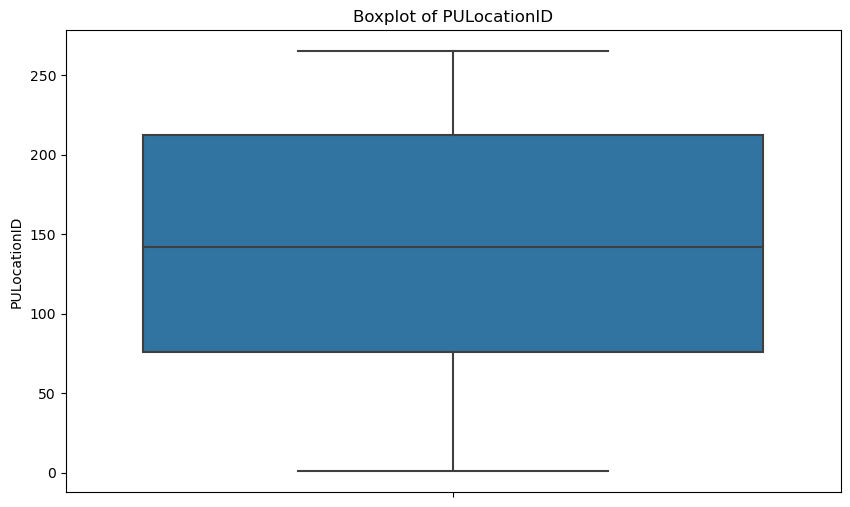

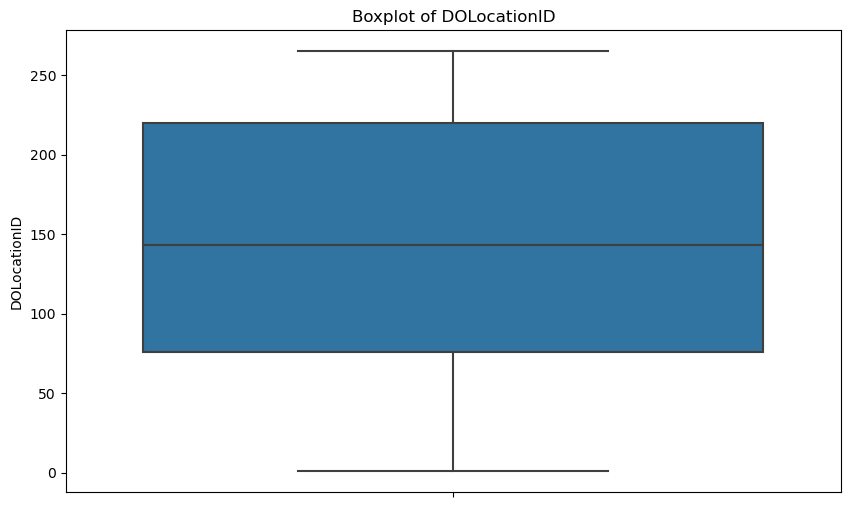

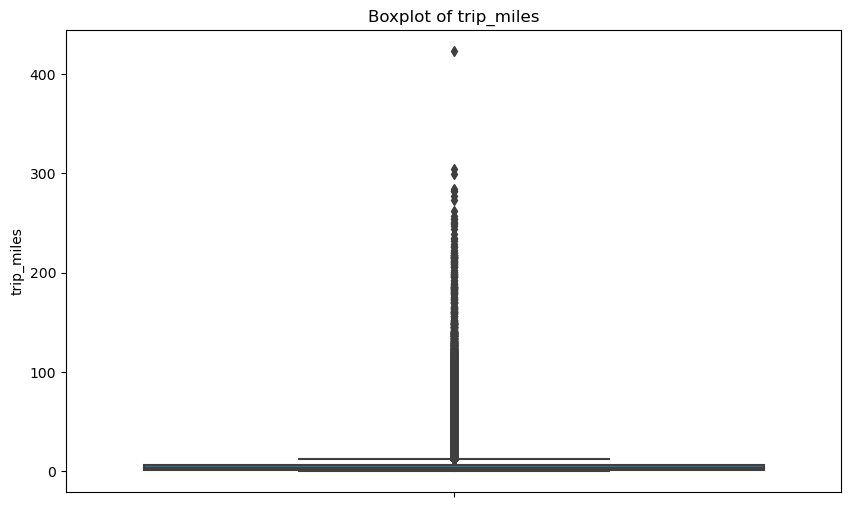

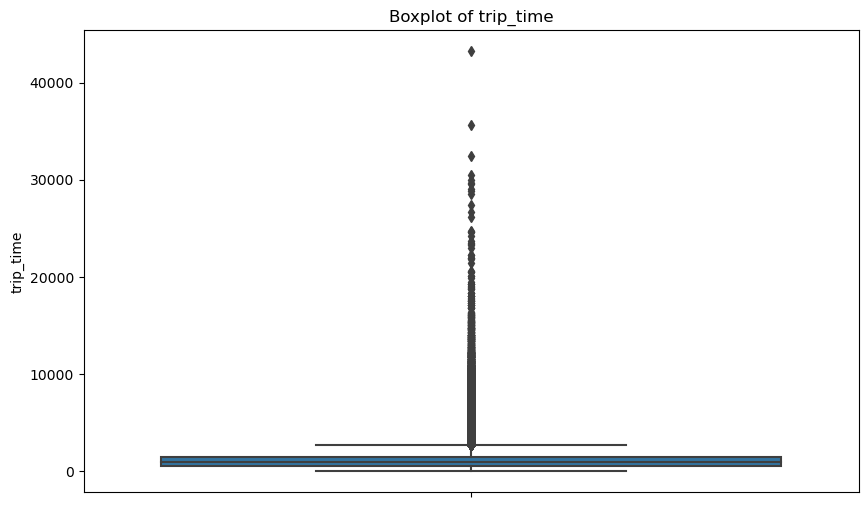

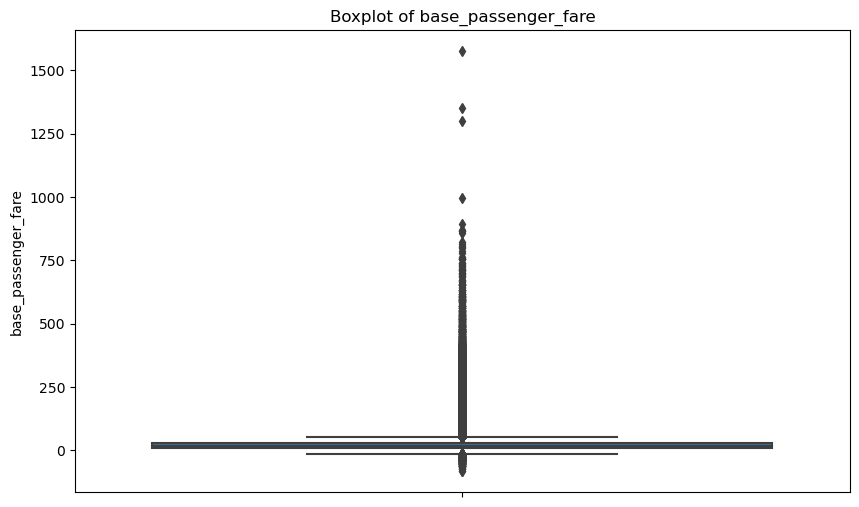

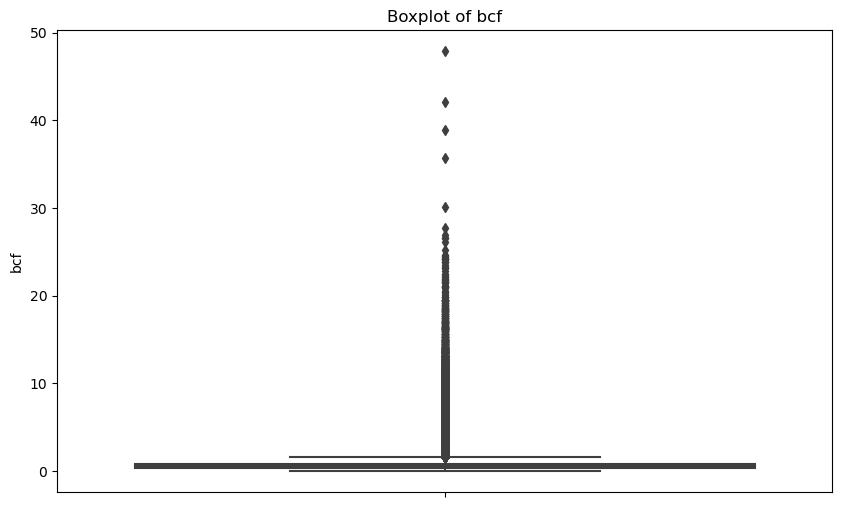

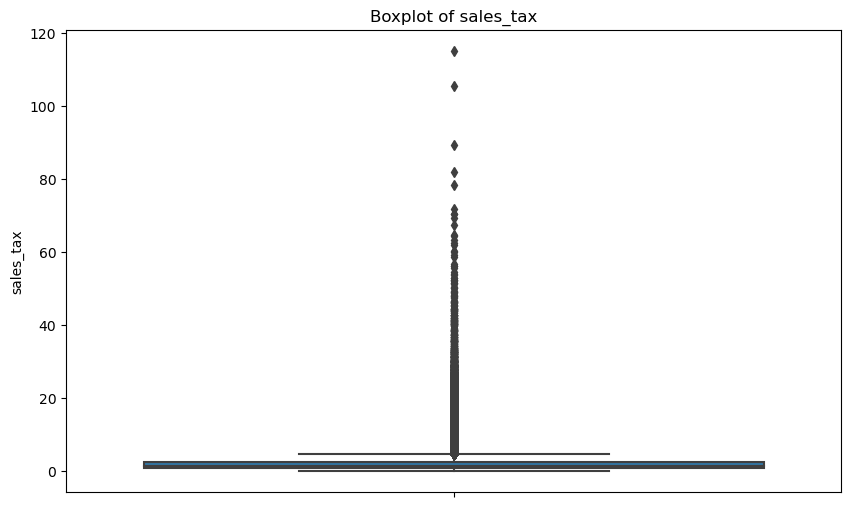

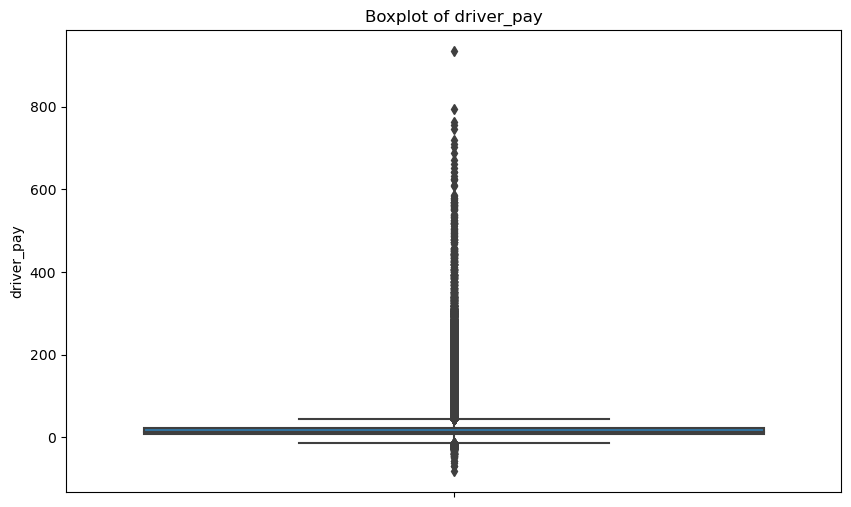

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


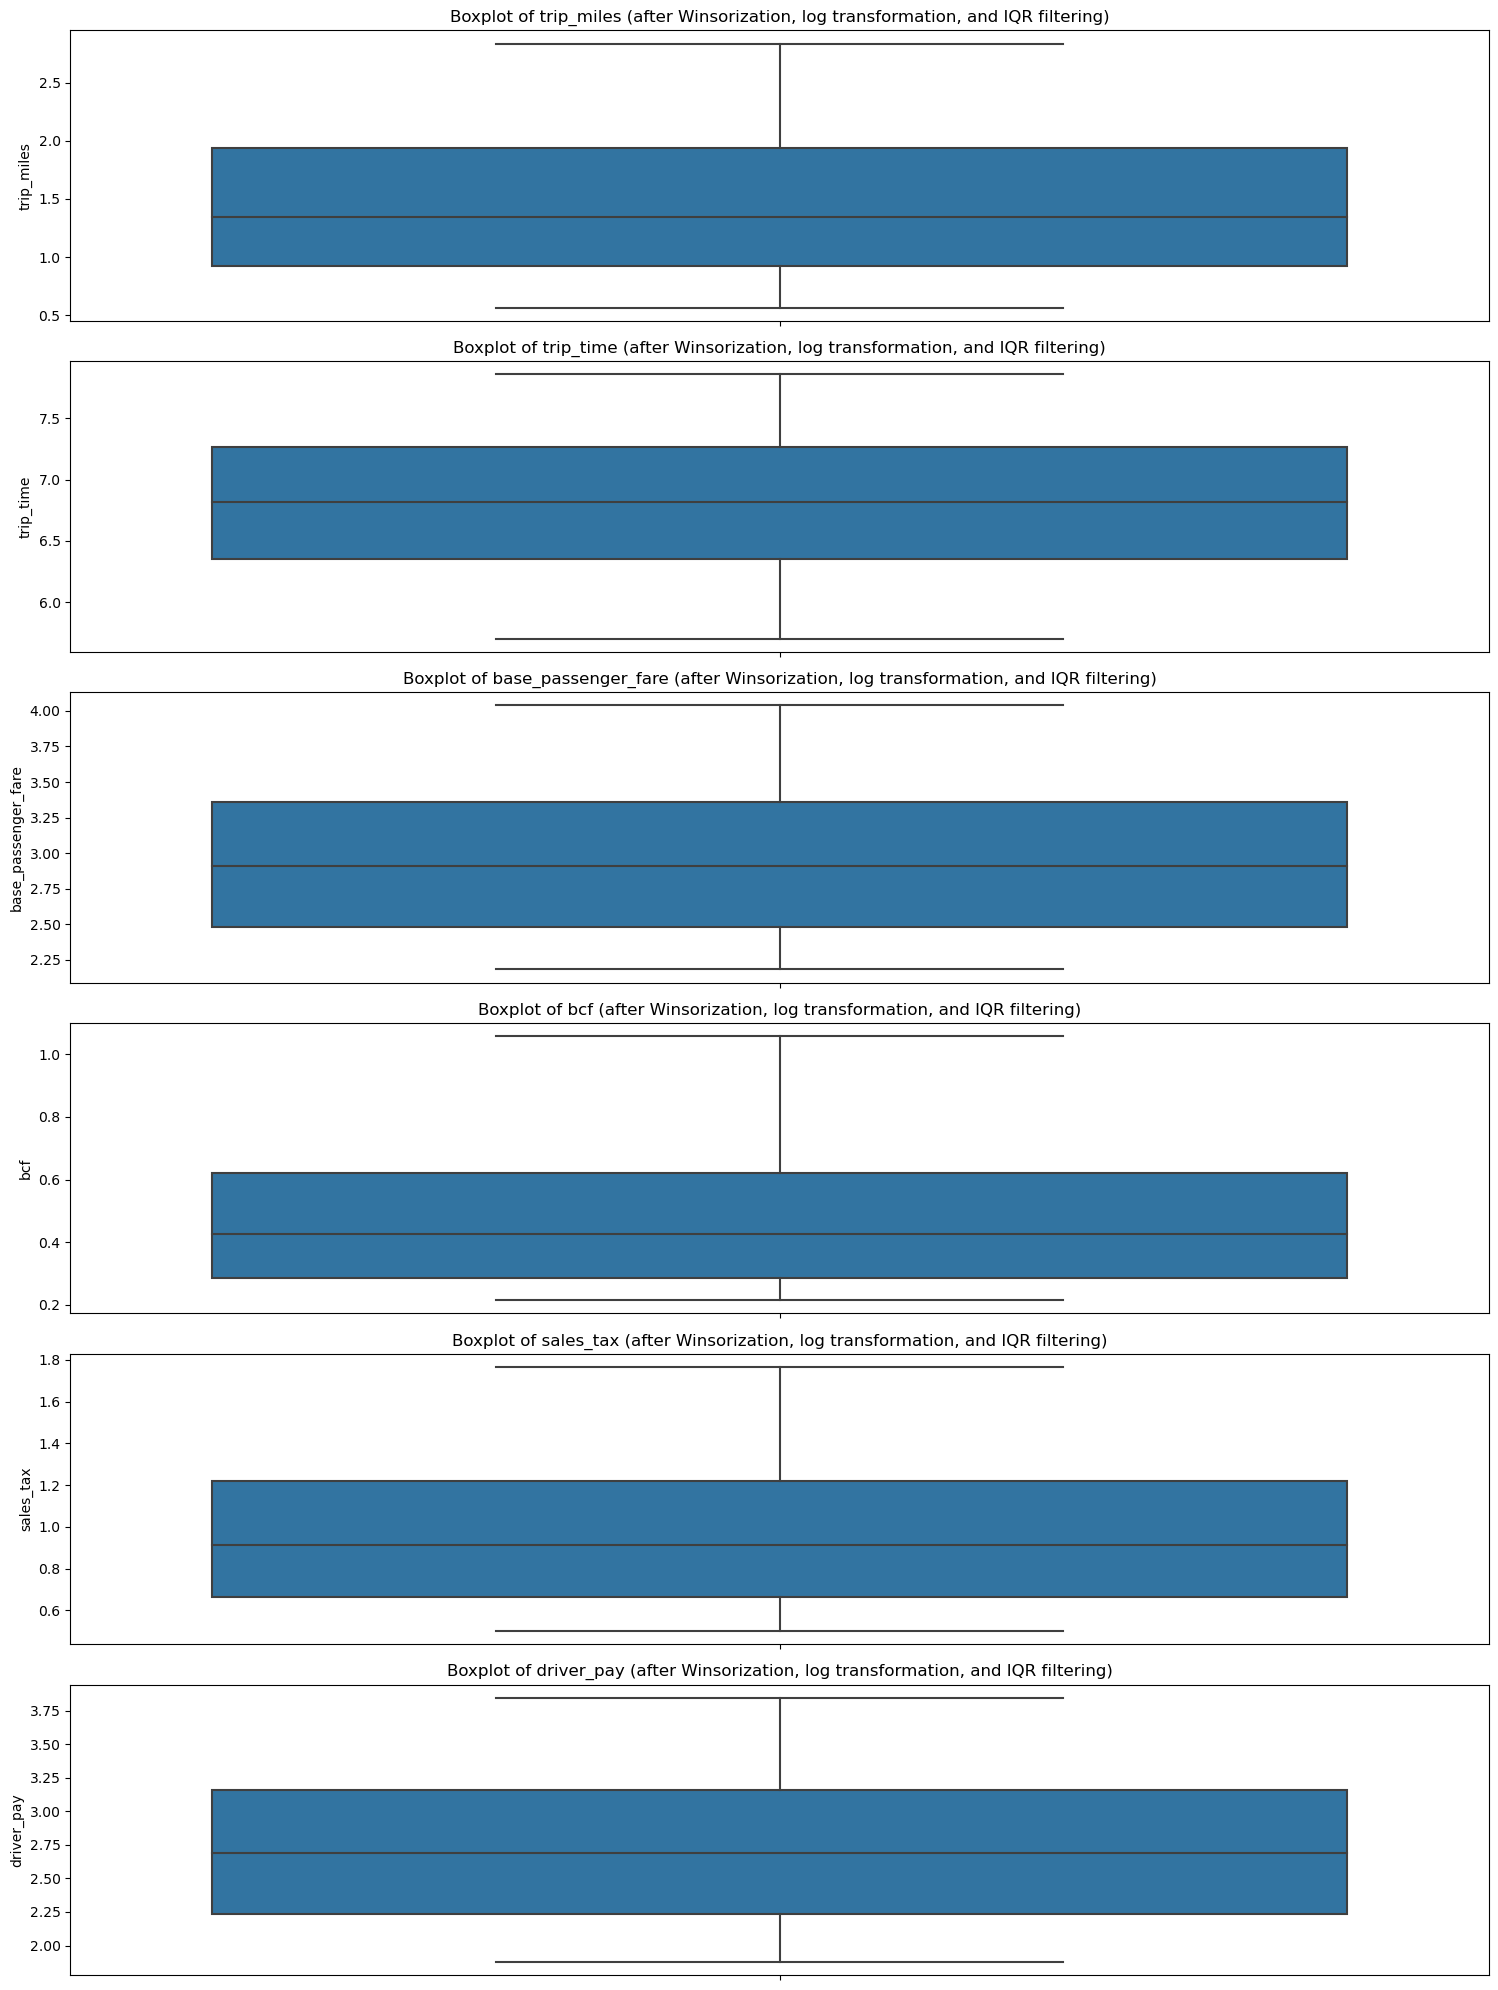

   trip_miles  estimated_emissions  emission_levels
0    1.857859           750.575145                0
1    0.871293           352.002520                0
2    0.565314           228.386779                0
3    2.149434           868.371301                0
4    0.867100           350.308597                0


/tmp/ipykernel_7608/2529816879.py:129: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = feb_new.corr()


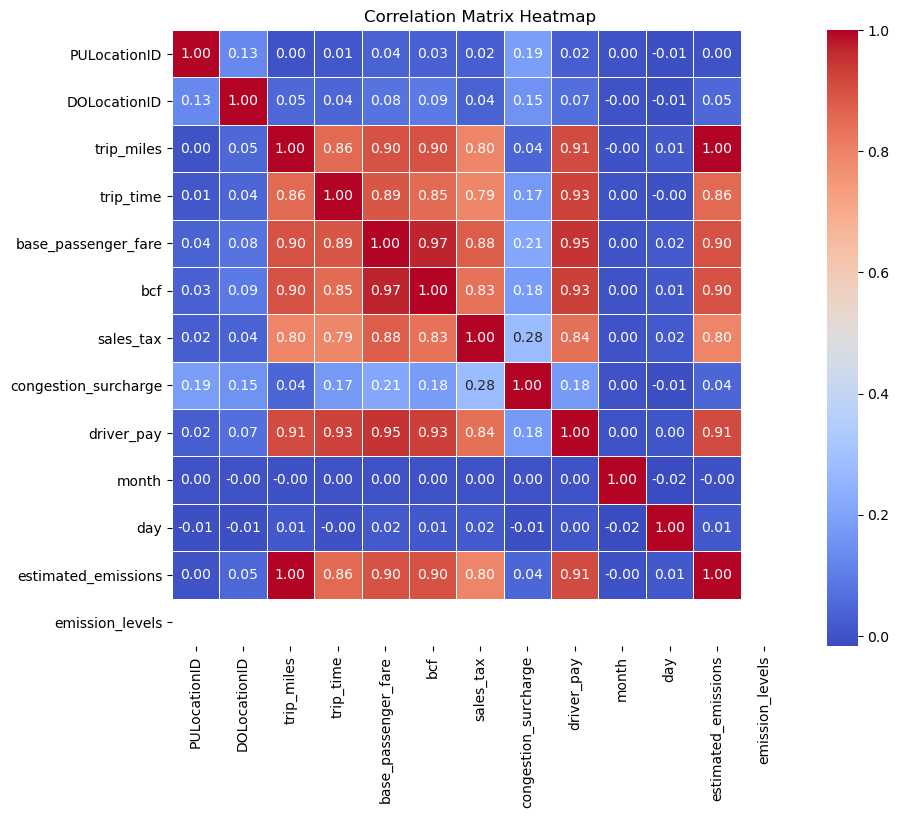

Shape of feb_df: (13280675, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:12:17   
1               B03404               B03404         00:24:45   
2               B03404               B03404         00:06:48   
3               B03404               B03404         00:14:35   
4               B03404               B03404         00:43:28   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:13:34        00:15:34         00:25:01           244   
1          00:25:53        00:26:07         00:31:47            74   
2          00:08:47        00:09:57         00:13:09            36   
3          00:16:31        00:17:43         00:37:01            36   
4          00:46:11        00:47:59         00:55:36             7   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0            74    1.857859   6.342121             2.859340  0.329304   
1           168 

In [3]:
import pandas as pd
feb = pd.read_parquet("Users/ekulshre/2023/fhvhv_tripdata_2023-02.parquet")
feb.head()
null_counts = feb.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = feb['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

feb_filtered = feb[~feb['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
feb_filtered = feb_filtered.drop(columns=['airport_fee'])
null_counts = feb_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
feb_filtered.shape
feb_filtered.info()
feb_filtered = feb_filtered.drop(columns=['hvfhs_license_num'])
feb_filtered['date'] = feb_filtered['request_datetime'].dt.date
feb_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
feb_filtered['date'] = pd.to_datetime(feb_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
feb_filtered['request_datetime'] = pd.to_datetime(feb_filtered['request_datetime']).dt.time
feb_filtered['on_scene_datetime'] = pd.to_datetime(feb_filtered['on_scene_datetime']).dt.time
feb_filtered['pickup_datetime'] = pd.to_datetime(feb_filtered['pickup_datetime']).dt.time
feb_filtered['dropoff_datetime'] = pd.to_datetime(feb_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
feb_filtered['month'] = pd.to_datetime(feb_filtered['date']).dt.month
feb_filtered['day'] = pd.to_datetime(feb_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(feb_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(feb_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = feb_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", feb_filtered['month'].unique())

feb_filtered = feb_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips', 'tolls'])
duplicate_count = feb_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
feb_filtered = feb_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = feb_filtered[feb_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

feb_filtered = feb_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(feb_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = feb_filtered[feb_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

feb_filtered = feb_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(feb_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=feb_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
feb_new = feb_filtered.copy()

for column in columns_to_process:
    feb_new[column] = winsorize(feb_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    feb_new[column] = np.log1p(feb_new[column])

for column in columns_to_process:
    Q1 = feb_new[column].quantile(0.25)
    Q3 = feb_new[column].quantile(0.75)
    IQR = Q3 - Q1
    feb_new = feb_new[(feb_new[column] >= (Q1 - 1.5 * IQR)) & (feb_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=feb_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
feb_new['estimated_emissions'] = feb_new['trip_miles'] * emission_factor
emission_threshold = 3000
feb_new['emission_levels'] = feb_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(feb_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = feb_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = feb_new['dispatching_base_num'].value_counts()
top_10_bases = feb_new['dispatching_base_num'].value_counts().head(10).index
feb_new = feb_new[feb_new['dispatching_base_num'].isin(top_10_bases)]
feb_new.shape
feb_new.head()

# Save feb_new to a new DataFrame called feb_df
feb_df = feb_new.copy()

# Display the shape and first few rows of feb_df to verify
print("Shape of feb_df:", feb_df.shape)
print(feb_df.head())


In [4]:
merge_1 = pd.concat([jan_df, feb_df], ignore_index=True)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 111, 8, Finished, Available, Finished)

In [6]:
merge_1.to_parquet('jan_feb_2023.parquet', index=False)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 111, 10, Finished, Available, Finished)

In [3]:
import pandas as pd

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 127, 8, Finished, Available, Finished)

In [4]:
jan_feb_2023=pd.read_parquet("jan_feb_2023.parquet")

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 127, 9, Finished, Available, Finished)

# MARCH EDA

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 8, 6, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    5851726
request_datetime              0
on_scene_datetime       5851726
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

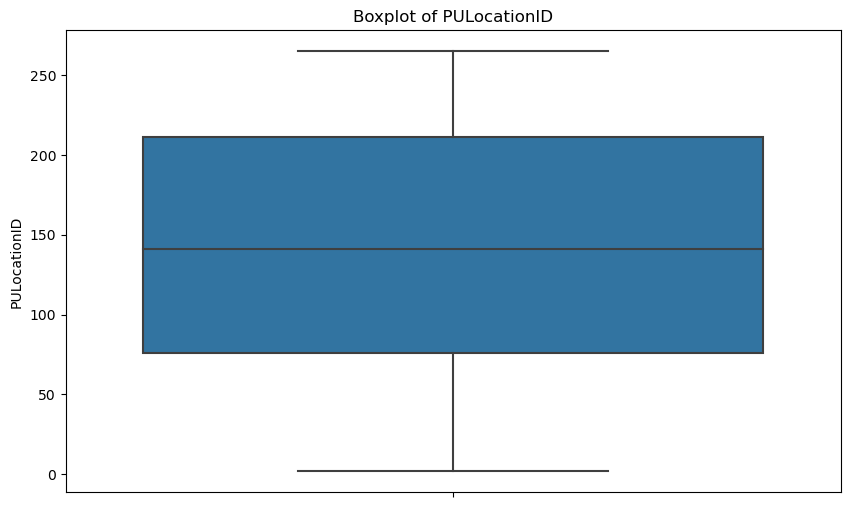

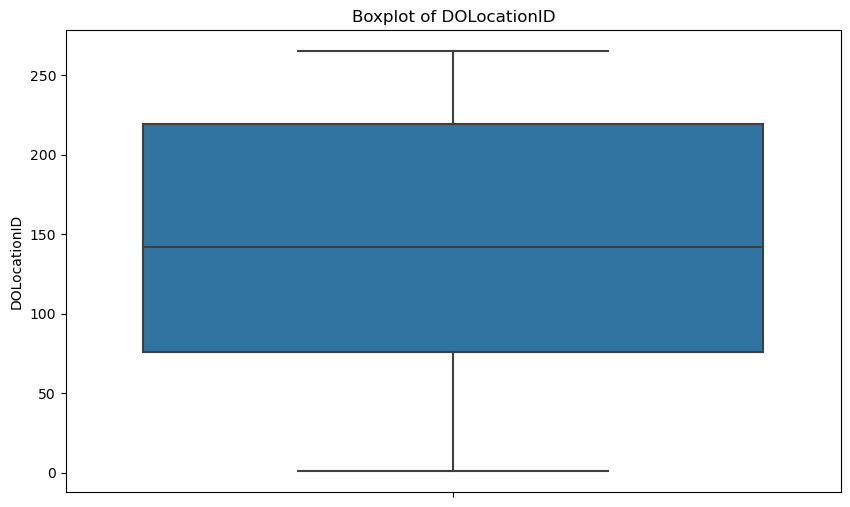

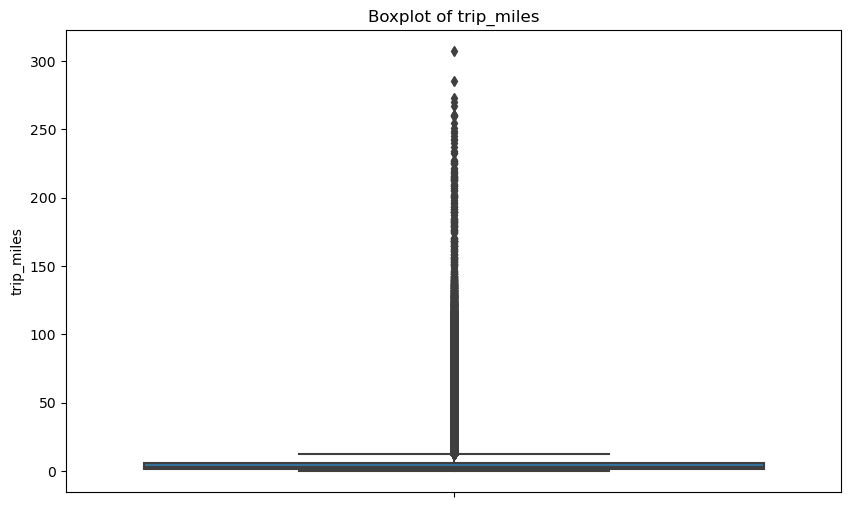

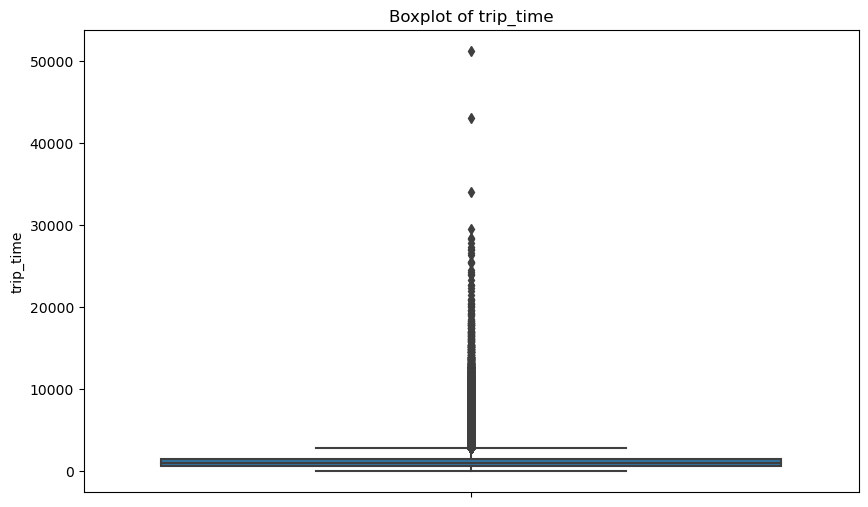

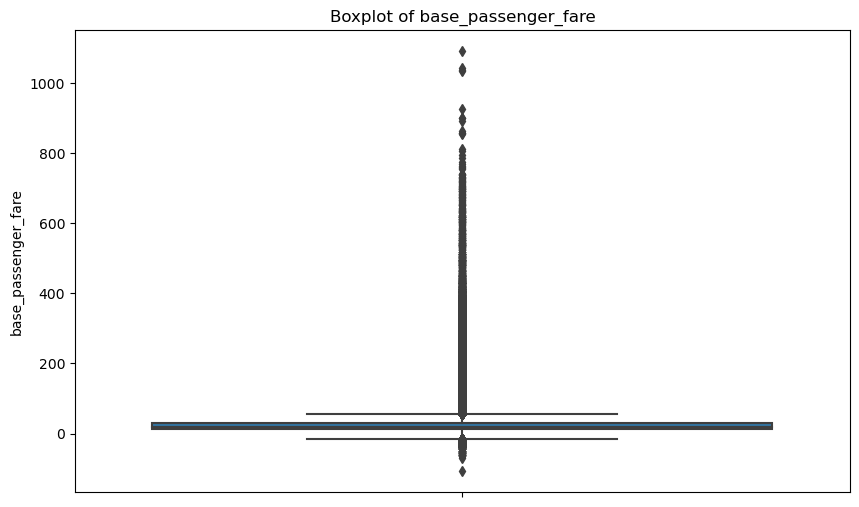

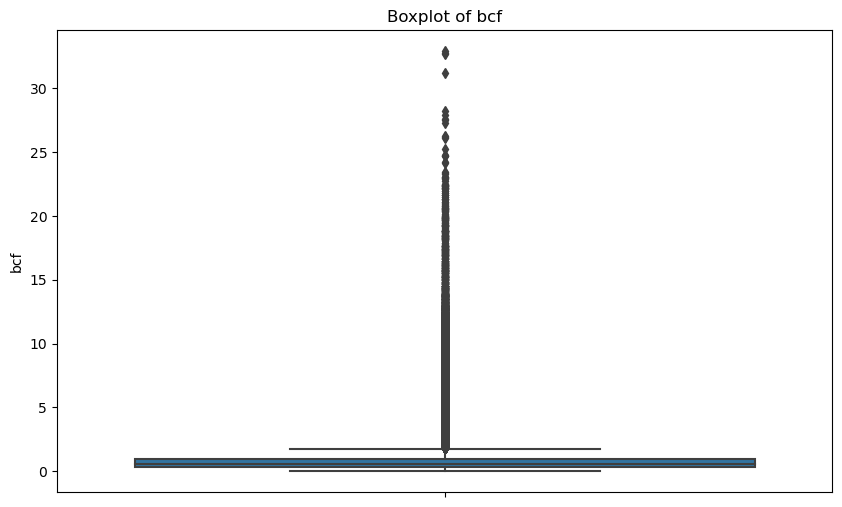

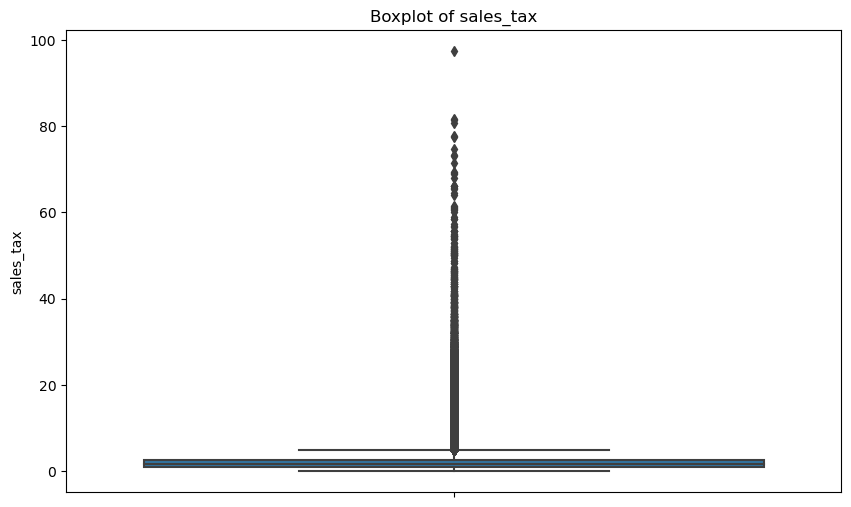

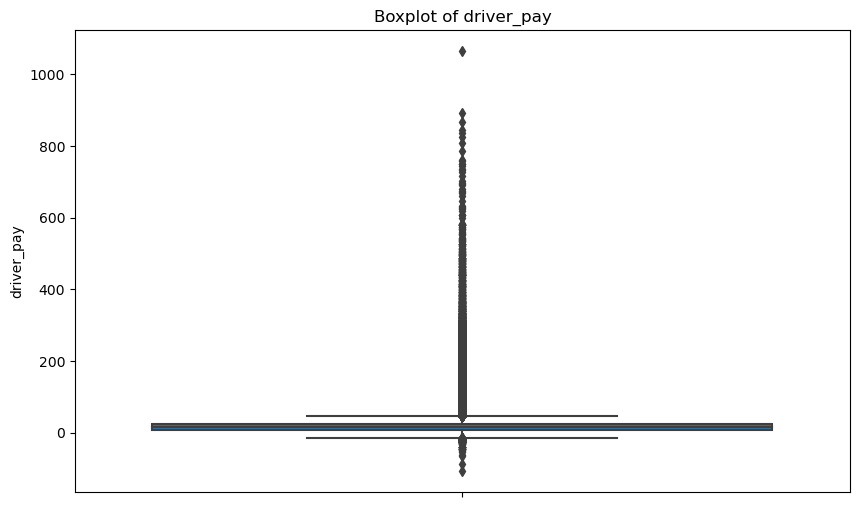

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


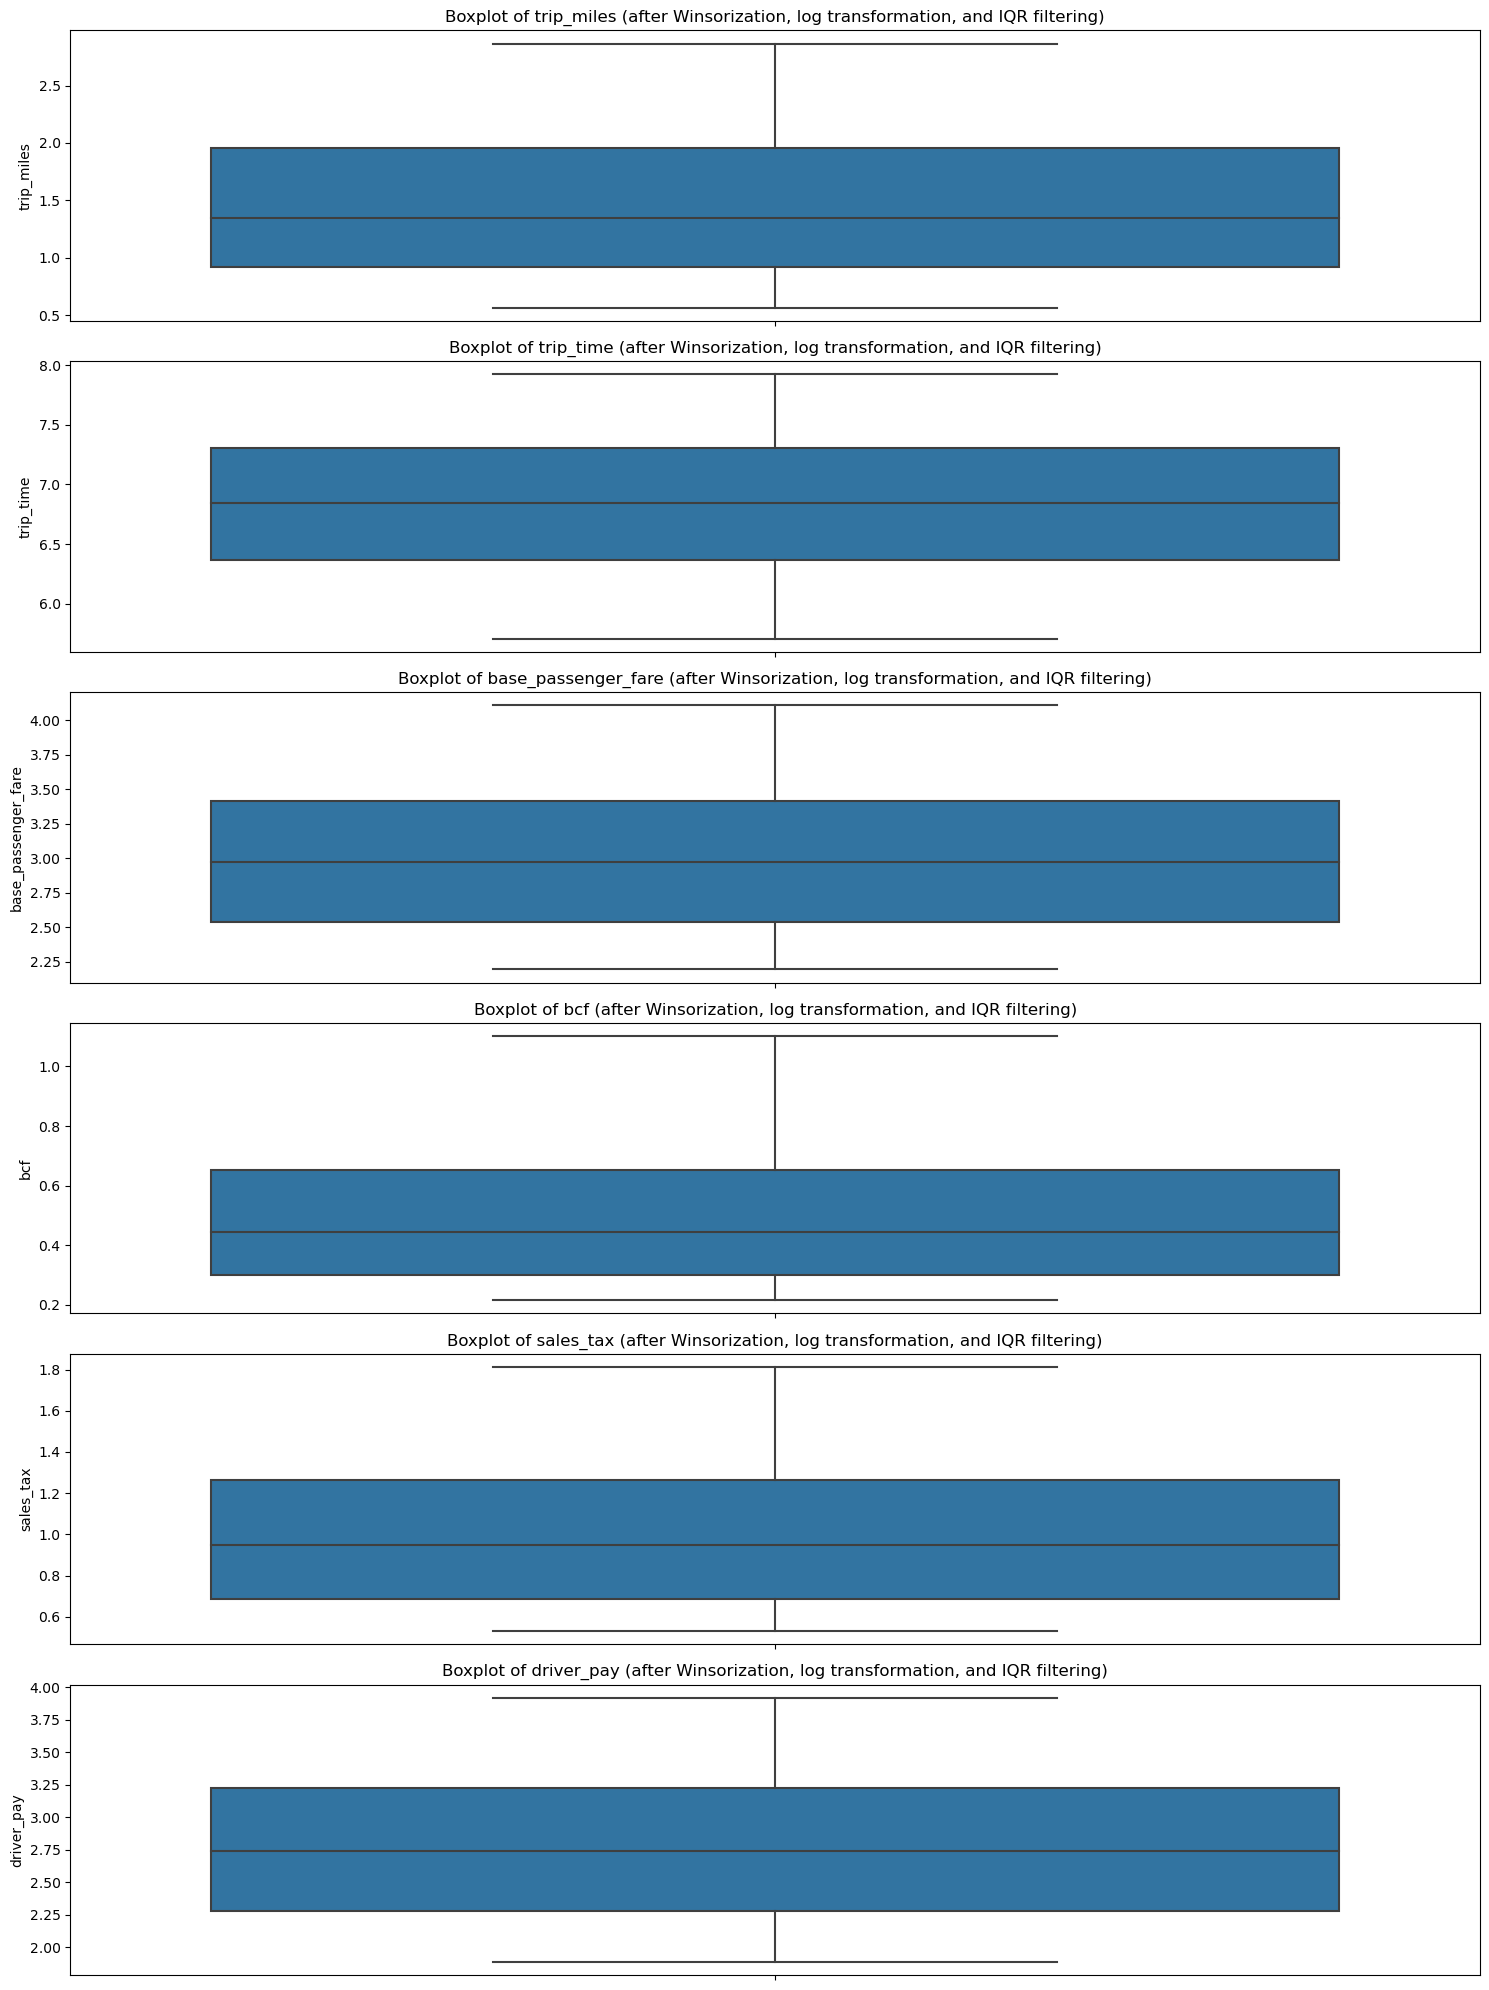

   trip_miles  estimated_emissions  emission_levels
0    0.792993           320.368976                0
1    1.283708           518.617940                0
2    2.025513           818.307333                0
3    1.663926           672.226143                0
4    2.333114           942.578176                0


/tmp/ipykernel_12848/3042717570.py:137: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = mar_new.corr()


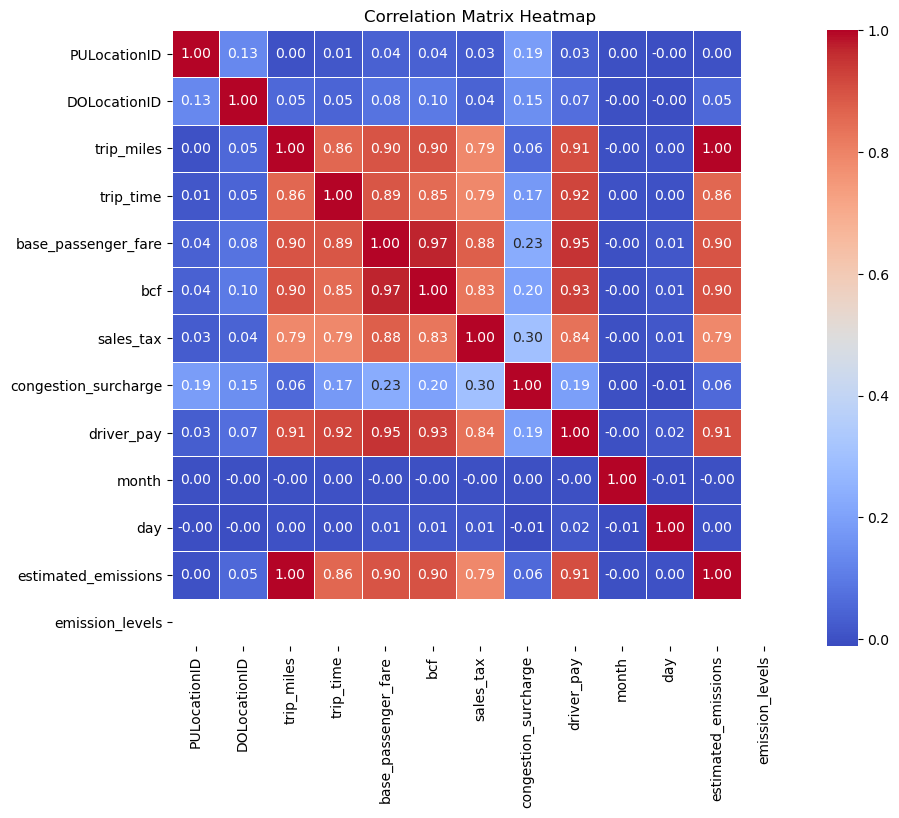

Shape of mar_df: (14552722, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:02:05   
1               B03404               B03404         00:11:47   
2               B03404               B03404         00:35:59   
3               B03404               B03404         00:24:18   
4               B03404               B03404         00:04:54   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:05:26        00:05:26         00:11:05           114   
1          00:12:58        00:14:30         00:31:12            79   
2          00:36:50        00:38:51         01:05:46           113   
3          00:30:55        00:31:03         00:49:24           229   
4          00:07:43        00:08:00         00:25:29           144   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0            79    0.792993   5.828946             2.193886  0.215111   
1            79 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

mar = pd.read_parquet("Users/ekulshre/2023/fhvhv_tripdata_2023-03.parquet")
mar.head()
null_counts = mar.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = mar['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

mar_filtered = mar[~mar['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
mar_filtered = mar_filtered.drop(columns=['airport_fee'])
null_counts = mar_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
mar_filtered.shape
mar_filtered.info()
mar_filtered = mar_filtered.drop(columns=['hvfhs_license_num'])
mar_filtered['date'] = mar_filtered['request_datetime'].dt.date
mar_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
mar_filtered['date'] = pd.to_datetime(mar_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
mar_filtered['request_datetime'] = pd.to_datetime(mar_filtered['request_datetime']).dt.time
mar_filtered['on_scene_datetime'] = pd.to_datetime(mar_filtered['on_scene_datetime']).dt.time
mar_filtered['pickup_datetime'] = pd.to_datetime(mar_filtered['pickup_datetime']).dt.time
mar_filtered['dropoff_datetime'] = pd.to_datetime(mar_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
mar_filtered['month'] = pd.to_datetime(mar_filtered['date']).dt.month
mar_filtered['day'] = pd.to_datetime(mar_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(mar_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(mar_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = mar_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", mar_filtered['month'].unique())

mar_filtered = mar_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips', 'tolls'])
duplicate_count = mar_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
mar_filtered = mar_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = mar_filtered[mar_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

mar_filtered = mar_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(mar_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = mar_filtered[mar_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

mar_filtered = mar_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(mar_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=mar_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
mar_new = mar_filtered.copy()

for column in columns_to_process:
    mar_new[column] = winsorize(mar_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    mar_new[column] = np.log1p(mar_new[column])

for column in columns_to_process:
    Q1 = mar_new[column].quantile(0.25)
    Q3 = mar_new[column].quantile(0.75)
    IQR = Q3 - Q1
    mar_new = mar_new[(mar_new[column] >= (Q1 - 1.5 * IQR)) & (mar_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=mar_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
mar_new['estimated_emissions'] = mar_new['trip_miles'] * emission_factor
emission_threshold = 3000
mar_new['emission_levels'] = mar_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(mar_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = mar_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = mar_new['dispatching_base_num'].value_counts()
top_10_bases = mar_new['dispatching_base_num'].value_counts().head(10).index
mar_new = mar_new[mar_new['dispatching_base_num'].isin(top_10_bases)]
mar_new.shape
mar_new.head()

# Save mar_new to a new DataFrame called mar_df
mar_df = mar_new.copy()

# Display the shape and first few rows of mar_df to verify
print("Shape of mar_df:", mar_df.shape)
print(mar_df.head())


# APRIL EDA

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 8, 7, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    5138317
request_datetime              0
on_scene_datetime       5138317
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

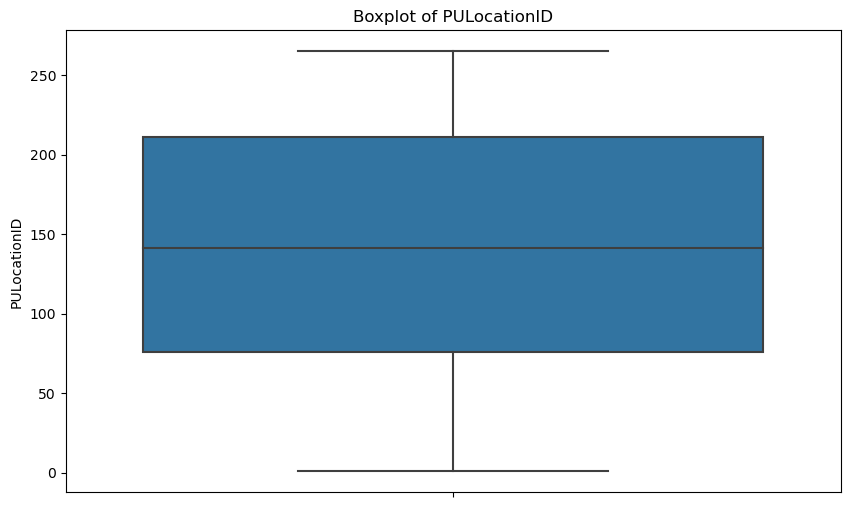

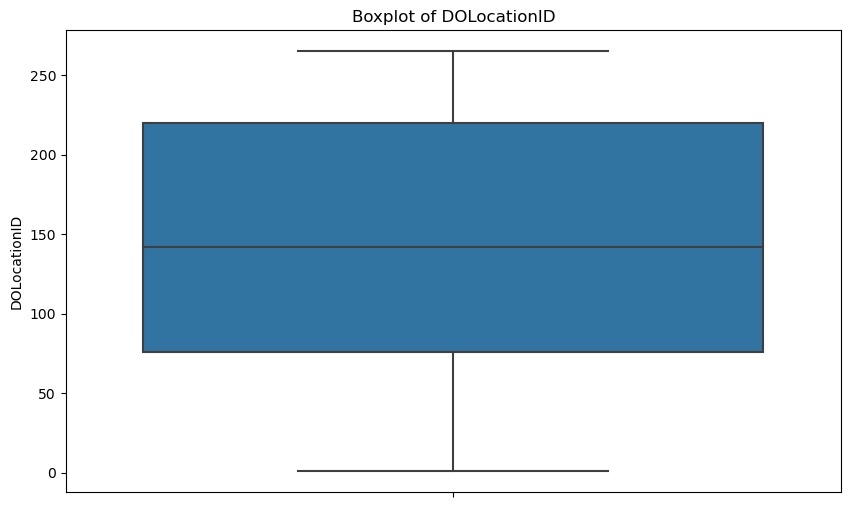

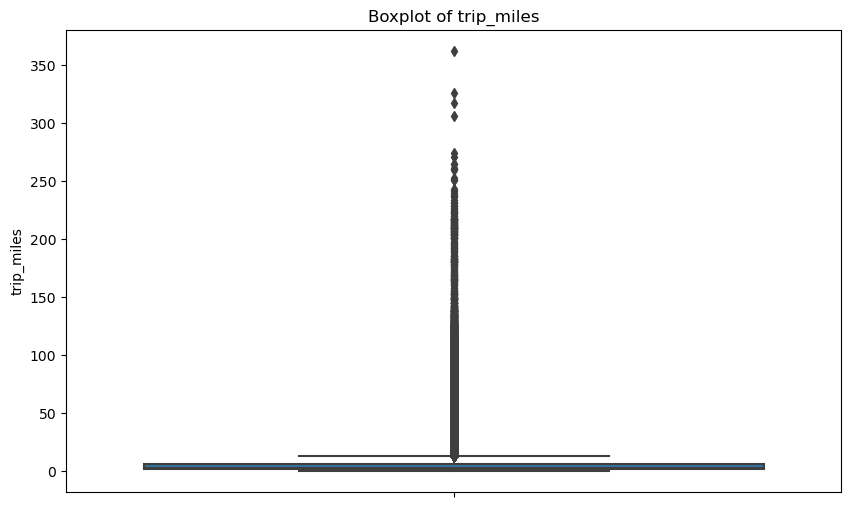

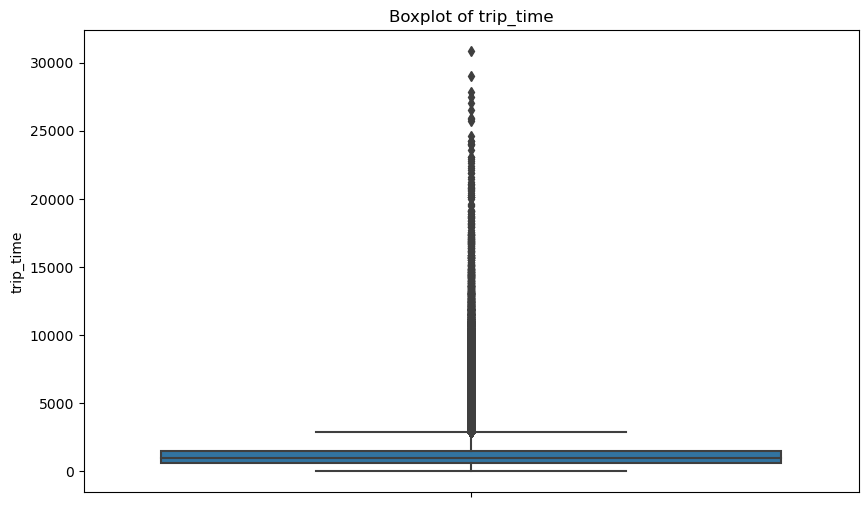

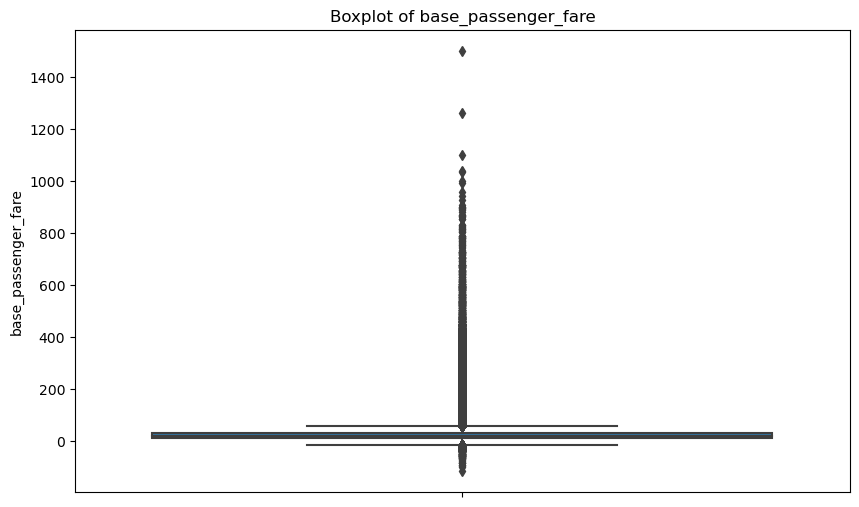

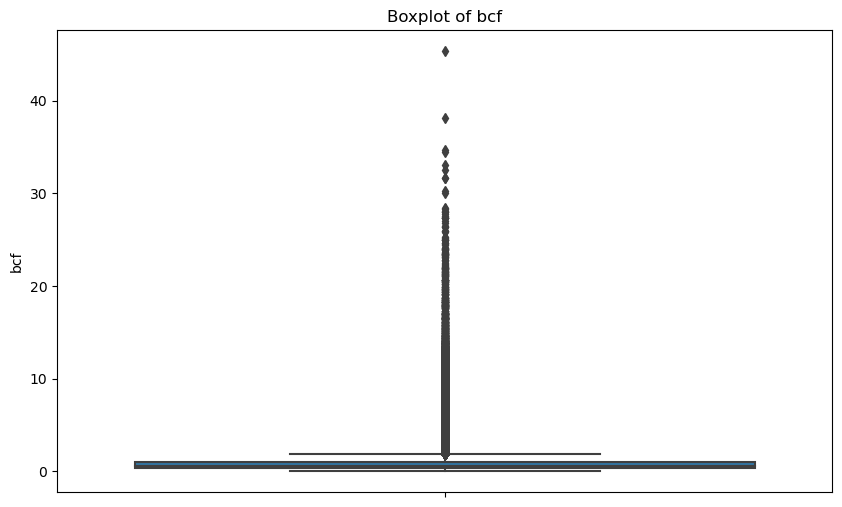

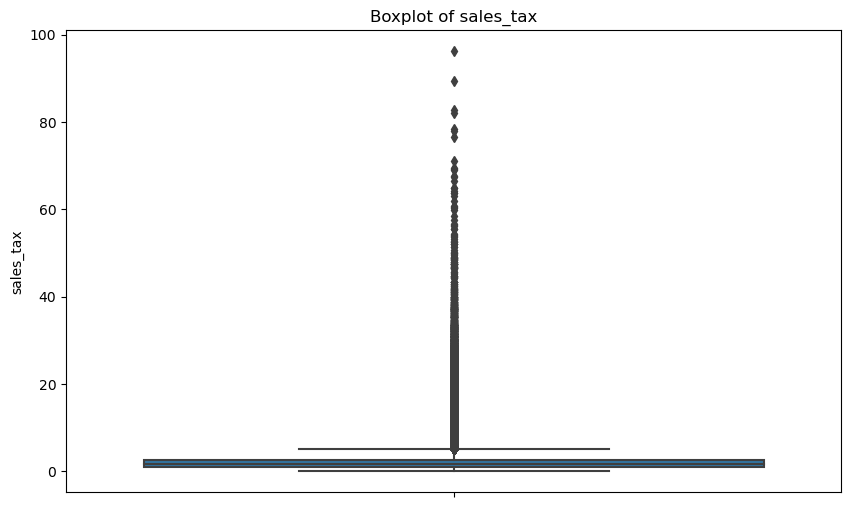

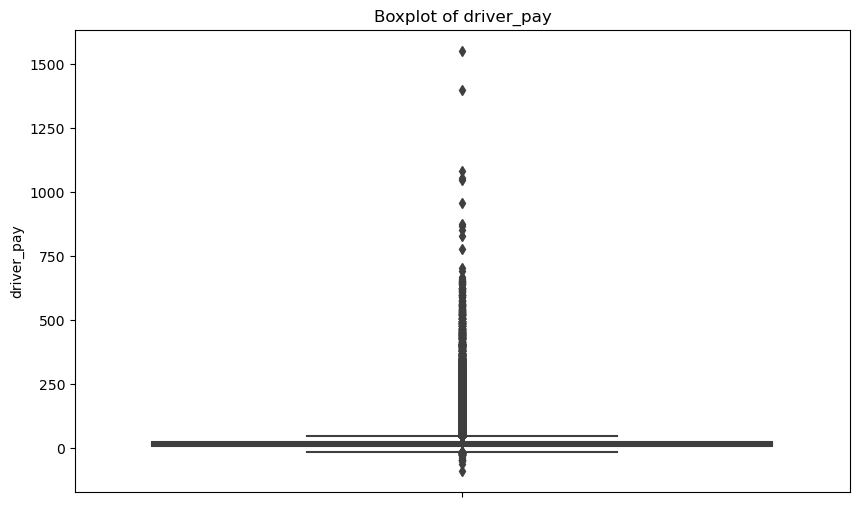

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


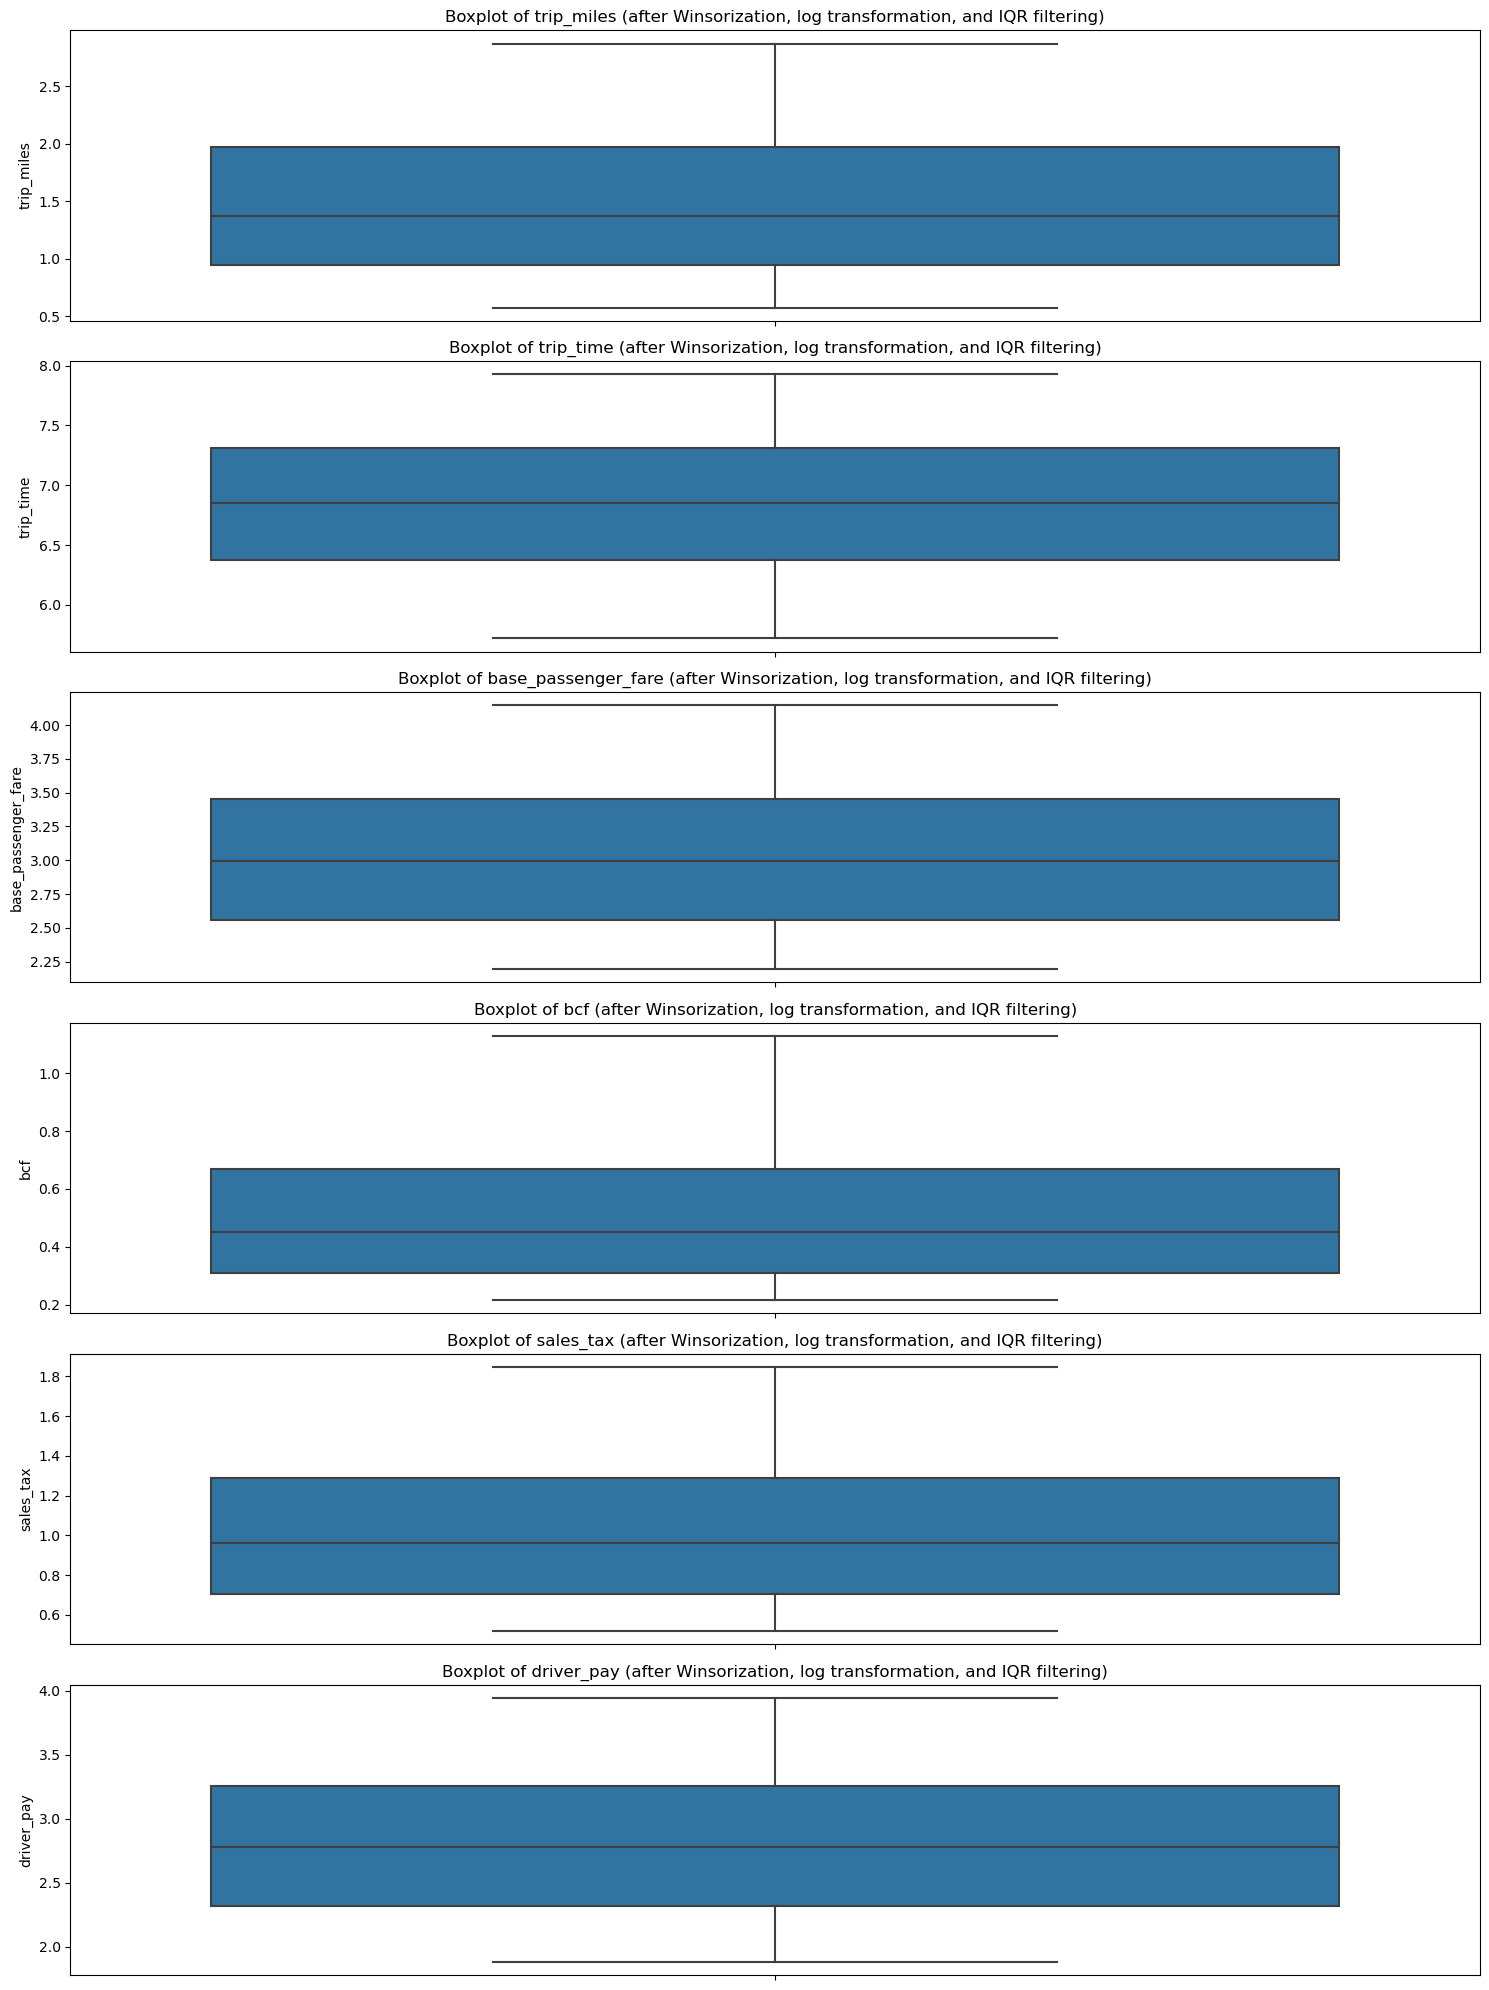

   trip_miles  estimated_emissions  emission_levels
0    1.808289           730.548664                0
1    1.413423           571.022904                0
2    1.223775           494.405274                0
3    0.576613           232.951799                0
4    1.644805           664.501243                0


/tmp/ipykernel_12848/4055813124.py:137: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = april_new.corr()


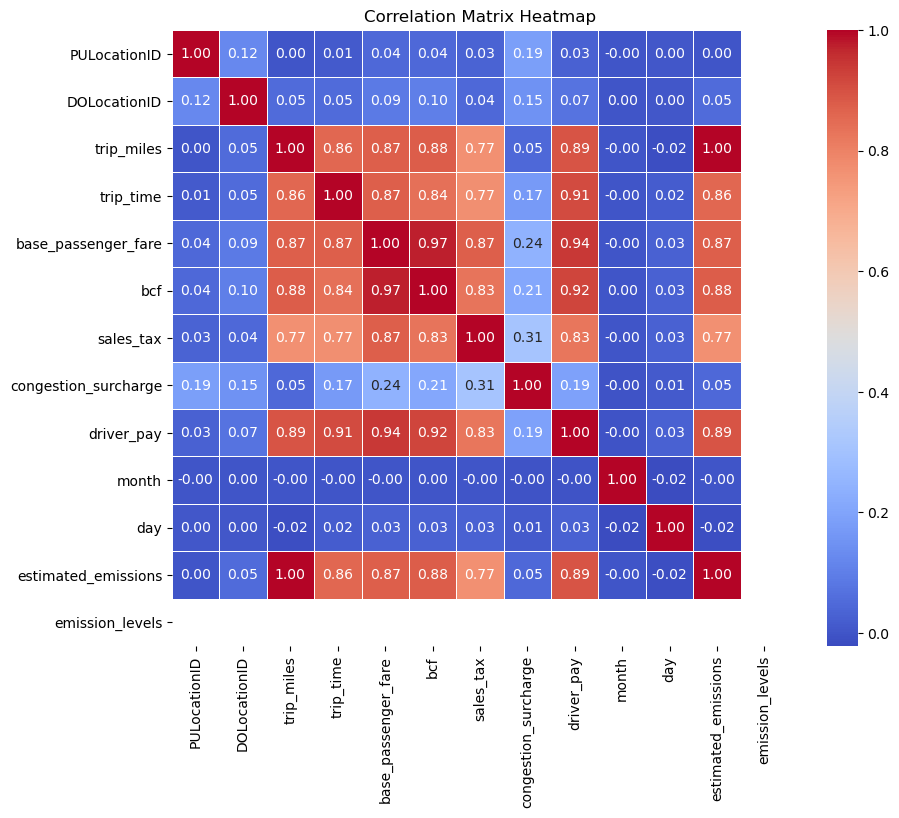

Shape of april_df: (13997965, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:01:28   
1               B03404               B03404         00:39:40   
2               B03404               B03404         23:56:31   
3               B03404               B03404         00:12:35   
4               B03404               B03404         00:46:23   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:02:41        00:03:03         00:15:42           174   
1          00:41:20        00:43:42         01:01:08           211   
2          00:00:20        00:01:01         00:09:48           222   
3          00:16:04        00:17:17         00:19:12            76   
4          00:47:30        00:47:49         01:05:23           263   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           126    1.808289   6.633318             3.068983  0.482426   
1           16

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

april = pd.read_parquet("Users/ekulshre/2023/fhvhv_tripdata_2023-04.parquet")
april.head()
null_counts = april.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = april['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

april_filtered = april[~april['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
april_filtered = april_filtered.drop(columns=['airport_fee'])
null_counts = april_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
april_filtered.shape
april_filtered.info()
april_filtered = april_filtered.drop(columns=['hvfhs_license_num'])
april_filtered['date'] = april_filtered['request_datetime'].dt.date
april_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
april_filtered['date'] = pd.to_datetime(april_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
april_filtered['request_datetime'] = pd.to_datetime(april_filtered['request_datetime']).dt.time
april_filtered['on_scene_datetime'] = pd.to_datetime(april_filtered['on_scene_datetime']).dt.time
april_filtered['pickup_datetime'] = pd.to_datetime(april_filtered['pickup_datetime']).dt.time
april_filtered['dropoff_datetime'] = pd.to_datetime(april_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
april_filtered['month'] = pd.to_datetime(april_filtered['date']).dt.month
april_filtered['day'] = pd.to_datetime(april_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(april_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(april_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = april_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", april_filtered['month'].unique())

april_filtered = april_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips', 'tolls'])
duplicate_count = april_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
april_filtered = april_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = april_filtered[april_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

april_filtered = april_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(april_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = april_filtered[april_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

april_filtered = april_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(april_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=april_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
april_new = april_filtered.copy()

for column in columns_to_process:
    april_new[column] = winsorize(april_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    april_new[column] = np.log1p(april_new[column])

for column in columns_to_process:
    Q1 = april_new[column].quantile(0.25)
    Q3 = april_new[column].quantile(0.75)
    IQR = Q3 - Q1
    april_new = april_new[(april_new[column] >= (Q1 - 1.5 * IQR)) & (april_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=april_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
april_new['estimated_emissions'] = april_new['trip_miles'] * emission_factor
emission_threshold = 3000
april_new['emission_levels'] = april_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(april_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = april_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = april_new['dispatching_base_num'].value_counts()
top_10_bases = april_new['dispatching_base_num'].value_counts().head(10).index
april_new = april_new[april_new['dispatching_base_num'].isin(top_10_bases)]
april_new.shape
april_new.head()

# Save april_new to a new DataFrame called april_df
april_df = april_new.copy()

# Display the shape and first few rows of april_df to verify
print("Shape of april_df:", april_df.shape)
print(april_df.head())


In [3]:
merge_2 = pd.concat([mar_df, april_df], ignore_index=True)

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 8, 8, Finished, Available, Finished)

In [ ]:
merge_2.to_parquet('mar_apr_2023.parquet', index=False)

# **May EDA**

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 3, 6, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    5560354
request_datetime              0
on_scene_datetime       5560354
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0005' 'HV0003']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

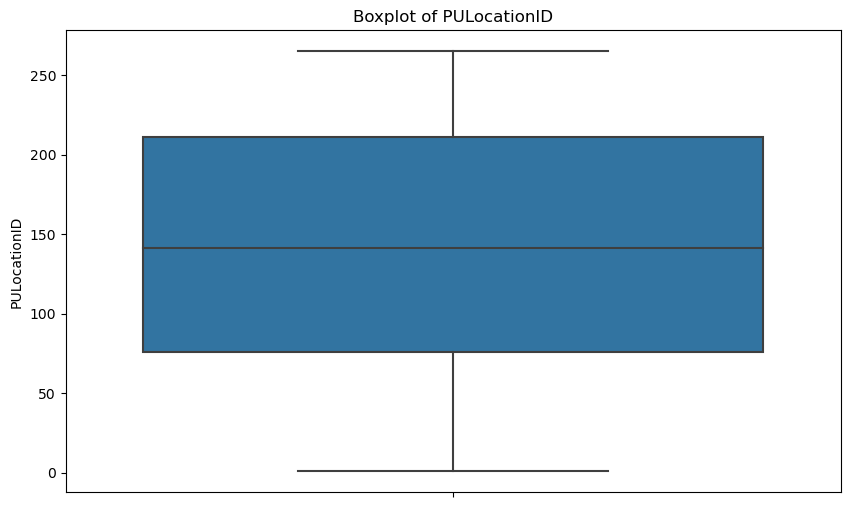

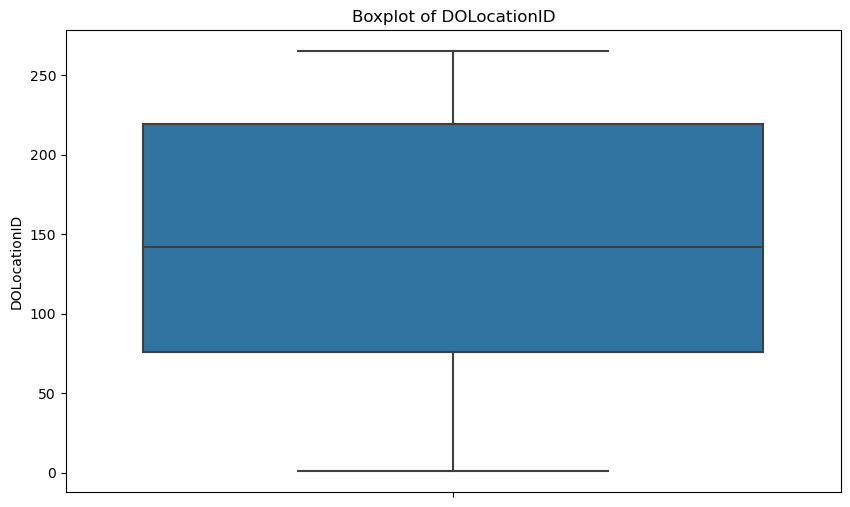

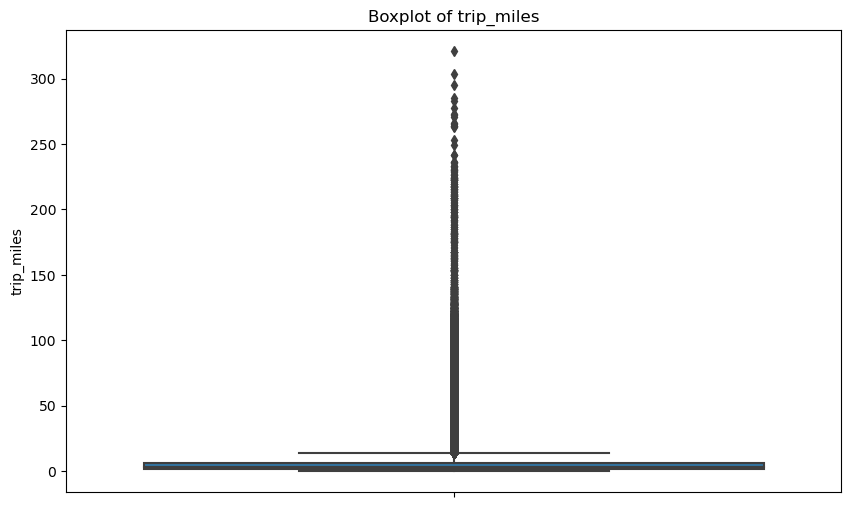

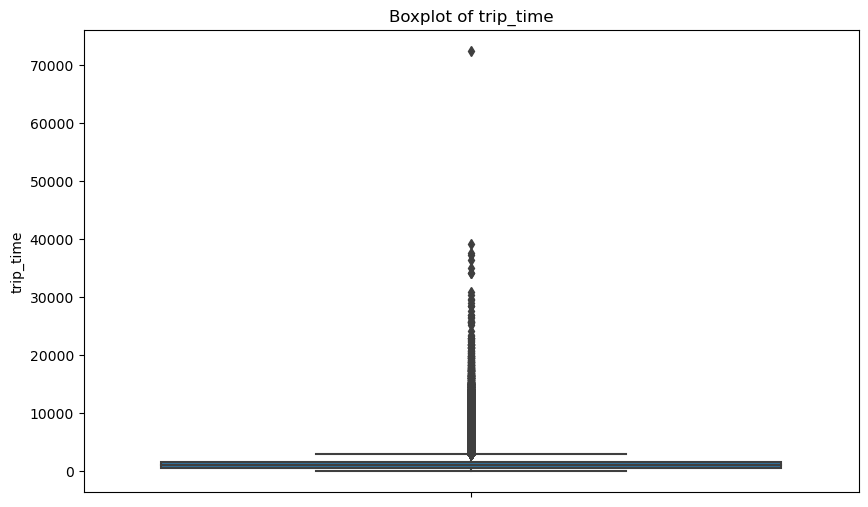

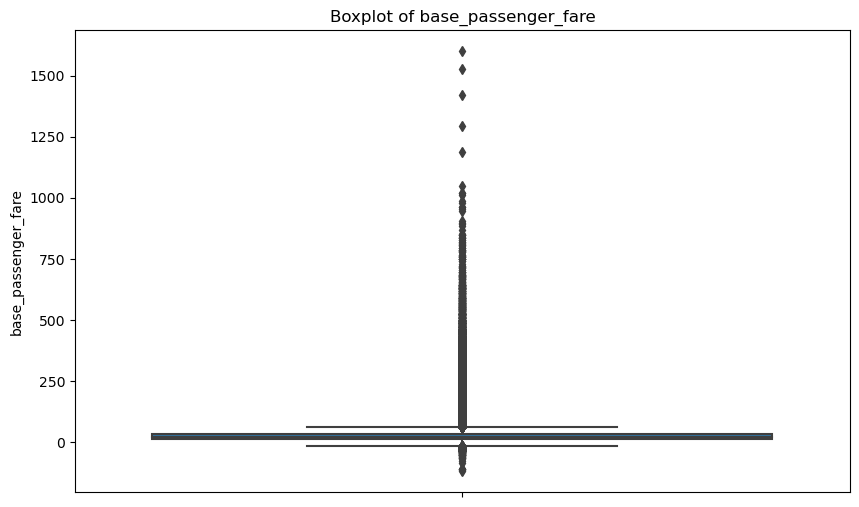

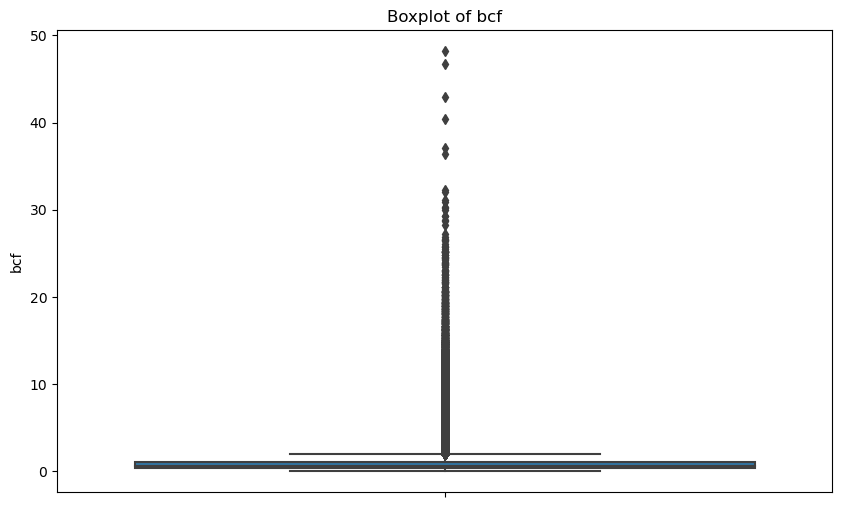

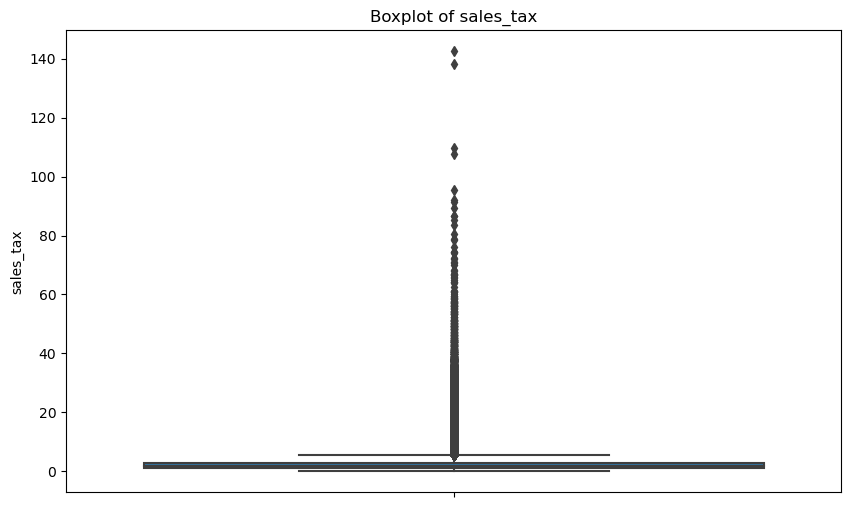

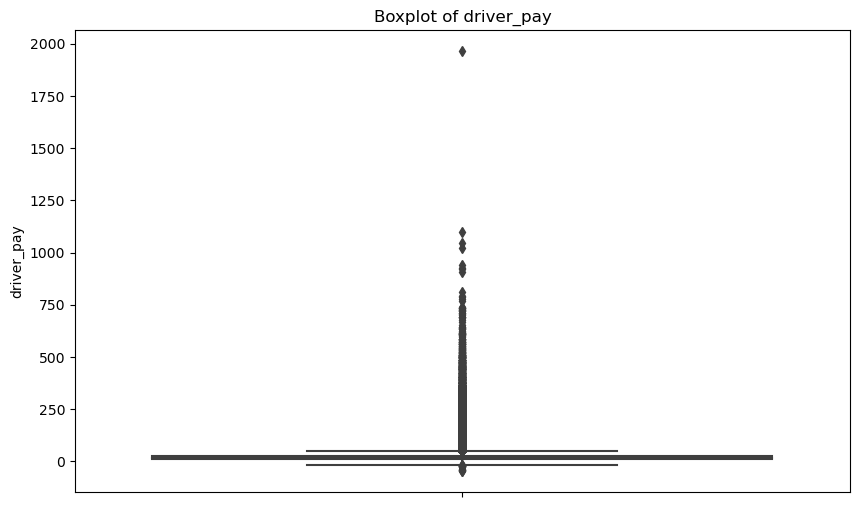

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


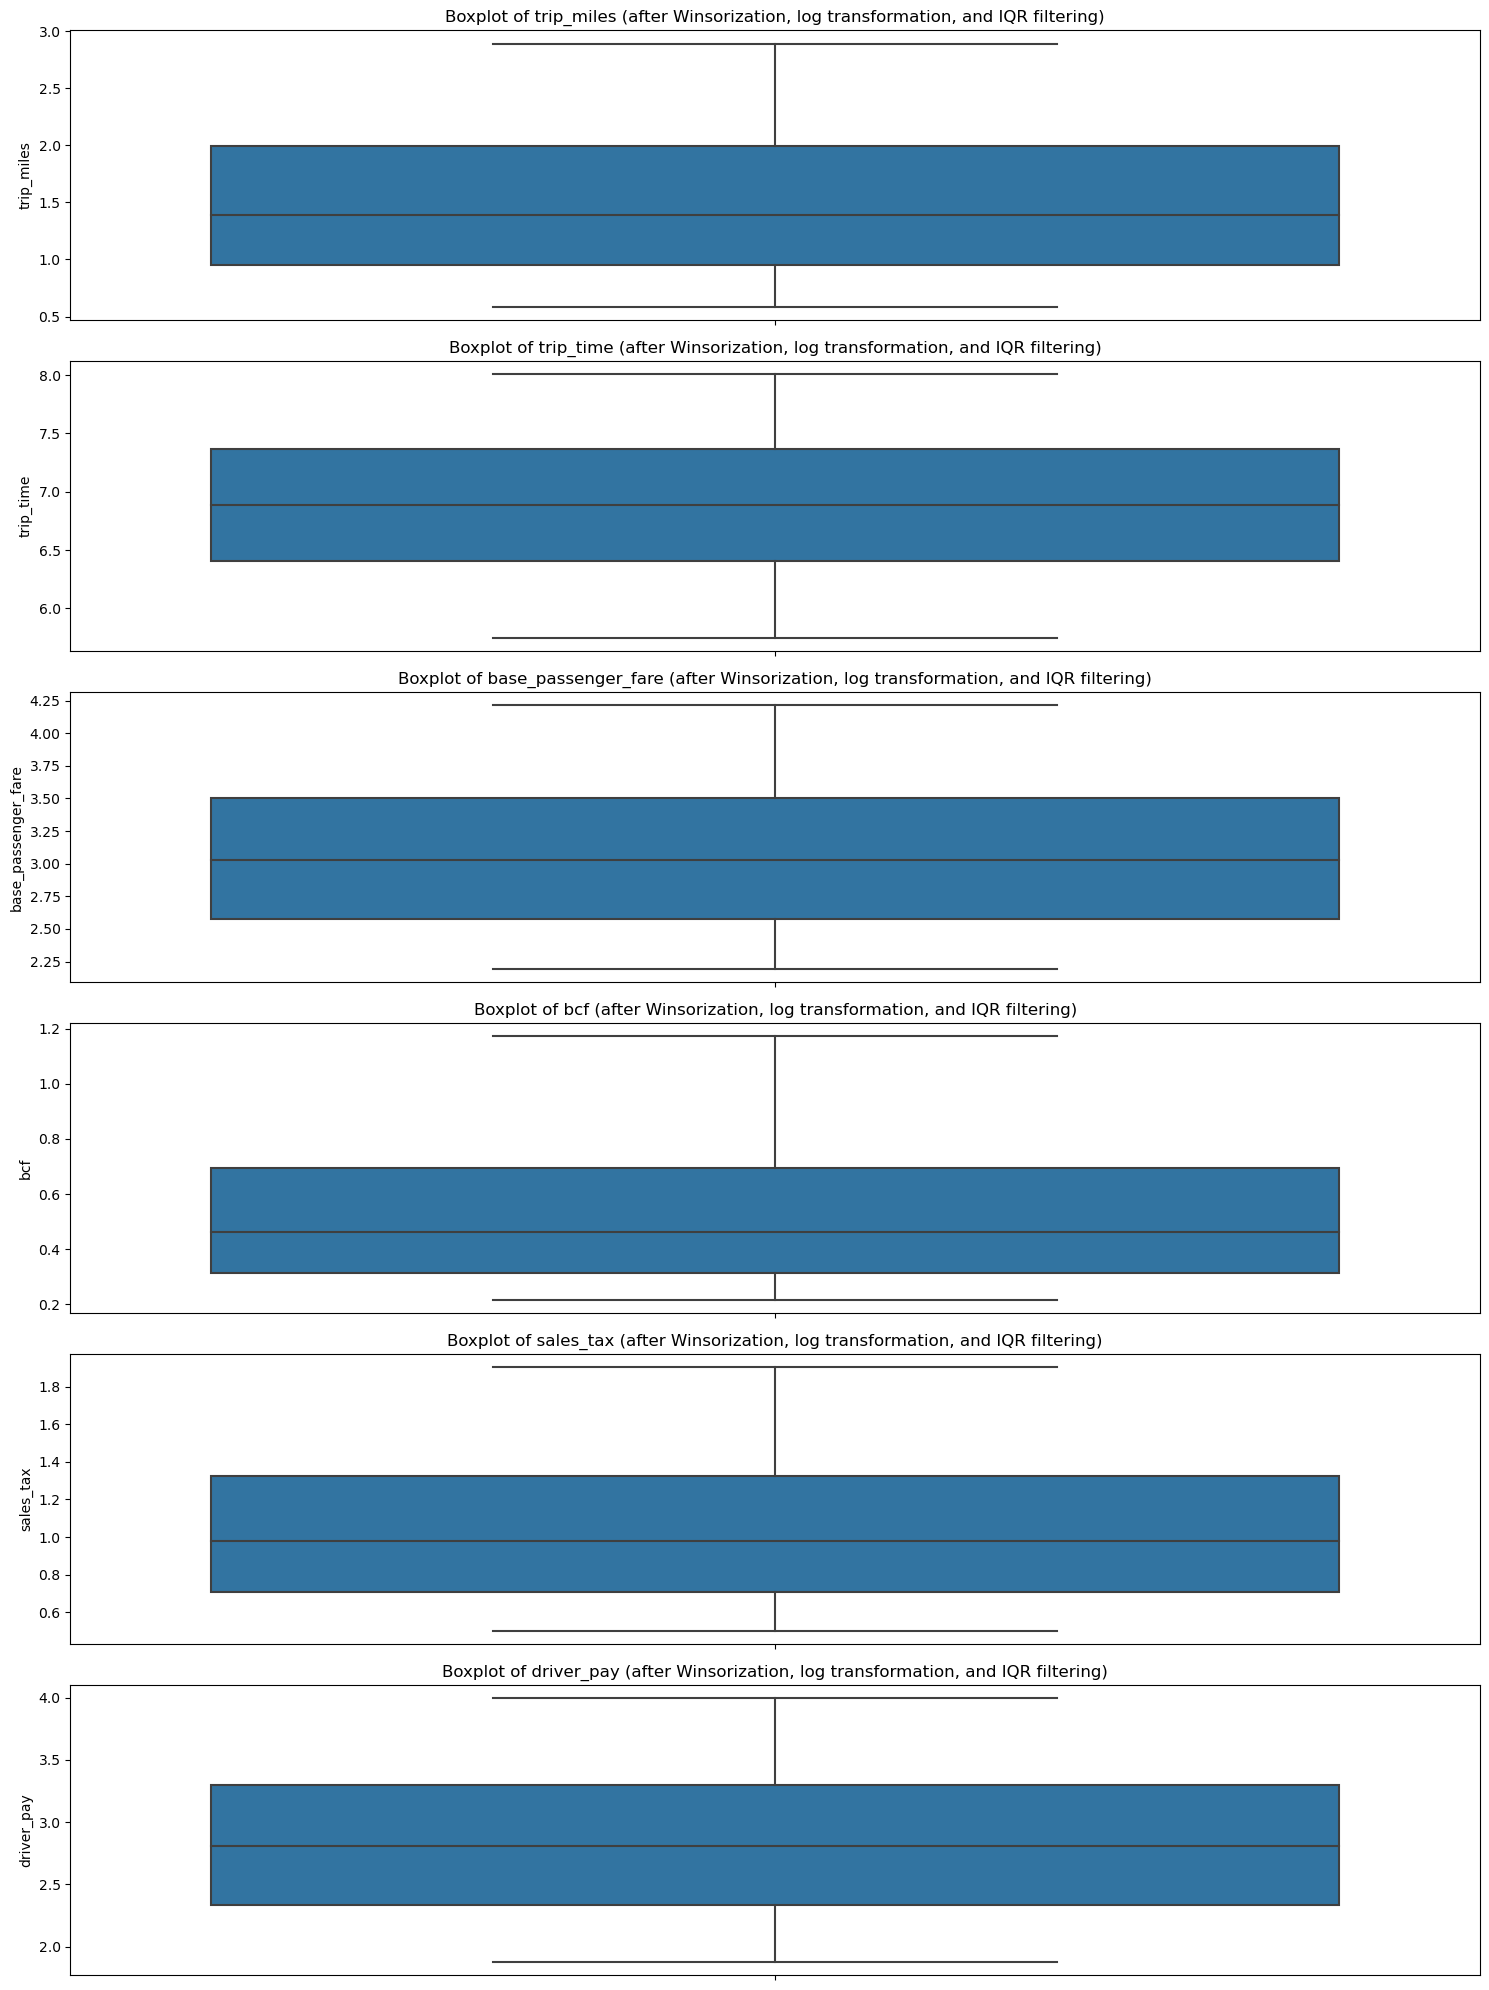

   trip_miles  estimated_emissions  emission_levels
2    1.585145           640.398669                0
3    1.196948           483.567069                0
4    2.346602           948.027199                0
5    0.974560           393.722095                0
6    2.531313          1022.650461                0


/tmp/ipykernel_8187/3295009515.py:137: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = may_new.corr()


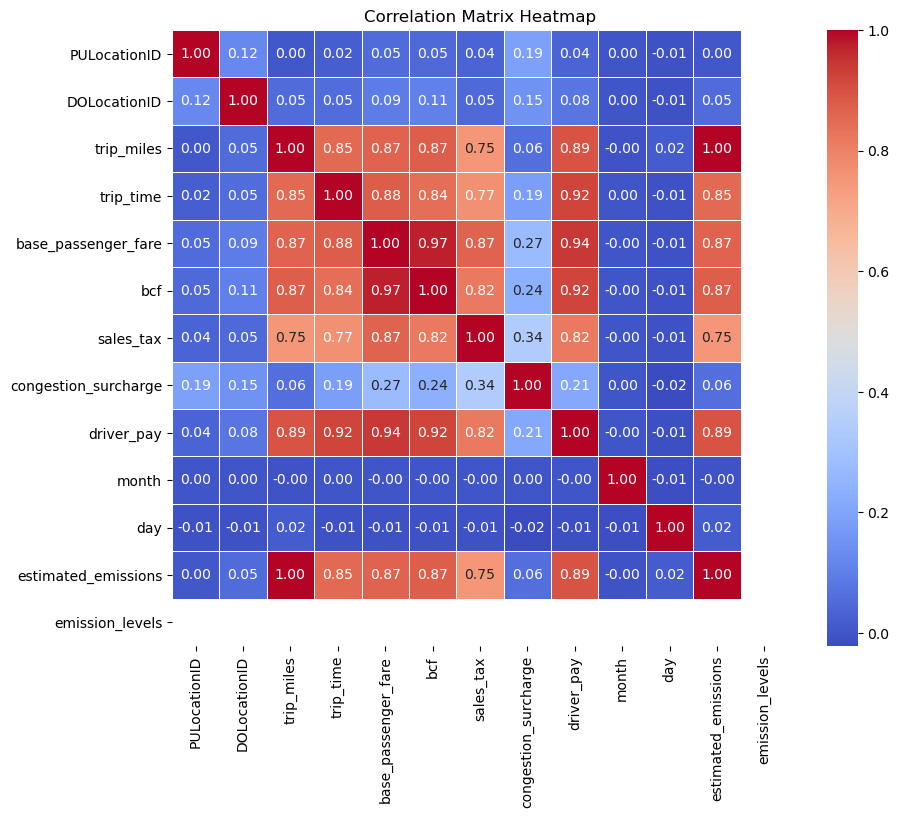

Shape of may_df: (14277518, 20)
  dispatching_base_num originating_base_num request_datetime  \
2               B03404               B03404         00:00:50   
3               B03404               B03404         00:19:08   
4               B03404               B03404         00:34:25   
5               B03404               B03404         00:27:29   
6               B03404               B03404         00:17:02   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
2          00:06:41        00:06:54         00:20:24           121   
3          00:23:57        00:24:27         00:36:01            92   
4          00:37:41        00:39:13         00:57:07            53   
5          00:28:56        00:29:14         00:38:00           234   
6          00:45:09        00:46:20         01:17:46           113   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
2            92    1.585145   6.698268             2.617396  0.322083   
3            53 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

may = pd.read_parquet("Users/ekulshre/2023/fhvhv_tripdata_2023-05.parquet")
may.head()
null_counts = may.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = may['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

may_filtered = may[~may['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
may_filtered = may_filtered.drop(columns=['airport_fee'])
null_counts = may_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
may_filtered.shape
may_filtered.info()
may_filtered = may_filtered.drop(columns=['hvfhs_license_num'])
may_filtered['date'] = may_filtered['request_datetime'].dt.date
may_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
may_filtered['date'] = pd.to_datetime(may_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
may_filtered['request_datetime'] = pd.to_datetime(may_filtered['request_datetime']).dt.time
may_filtered['on_scene_datetime'] = pd.to_datetime(may_filtered['on_scene_datetime']).dt.time
may_filtered['pickup_datetime'] = pd.to_datetime(may_filtered['pickup_datetime']).dt.time
may_filtered['dropoff_datetime'] = pd.to_datetime(may_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
may_filtered['month'] = pd.to_datetime(may_filtered['date']).dt.month
may_filtered['day'] = pd.to_datetime(may_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(may_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(may_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = may_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", may_filtered['month'].unique())

may_filtered = may_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag', 'tips', 'tolls'])
duplicate_count = may_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
may_filtered = may_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = may_filtered[may_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

may_filtered = may_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(may_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = may_filtered[may_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

may_filtered = may_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(may_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare', 'bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=may_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
may_new = may_filtered.copy()

for column in columns_to_process:
    may_new[column] = winsorize(may_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    may_new[column] = np.log1p(may_new[column])

for column in columns_to_process:
    Q1 = may_new[column].quantile(0.25)
    Q3 = may_new[column].quantile(0.75)
    IQR = Q3 - Q1
    may_new = may_new[(may_new[column] >= (Q1 - 1.5 * IQR)) & (may_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=may_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
may_new['estimated_emissions'] = may_new['trip_miles'] * emission_factor
emission_threshold = 3000
may_new['emission_levels'] = may_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(may_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = may_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = may_new['dispatching_base_num'].value_counts()
top_10_bases = may_new['dispatching_base_num'].value_counts().head(10).index
may_new = may_new[may_new['dispatching_base_num'].isin(top_10_bases)]
may_new.shape
may_new.head()

# Save may_new to a new DataFrame called may_df
may_df = may_new.copy()

# Display the shape and first few rows of may_df to verify
print("Shape of may_df:", may_df.shape)
print(may_df.head())


# JUNE EDA

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 3, 7, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    5544472
request_datetime              0
on_scene_datetime       5544472
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

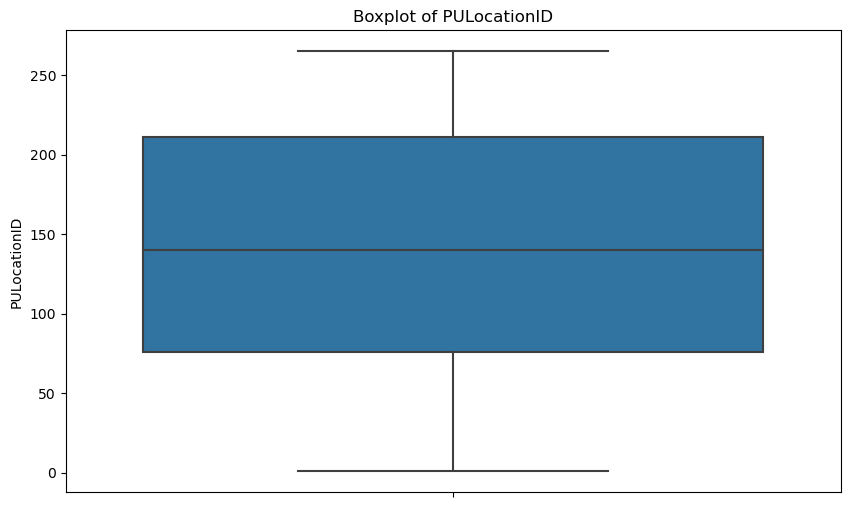

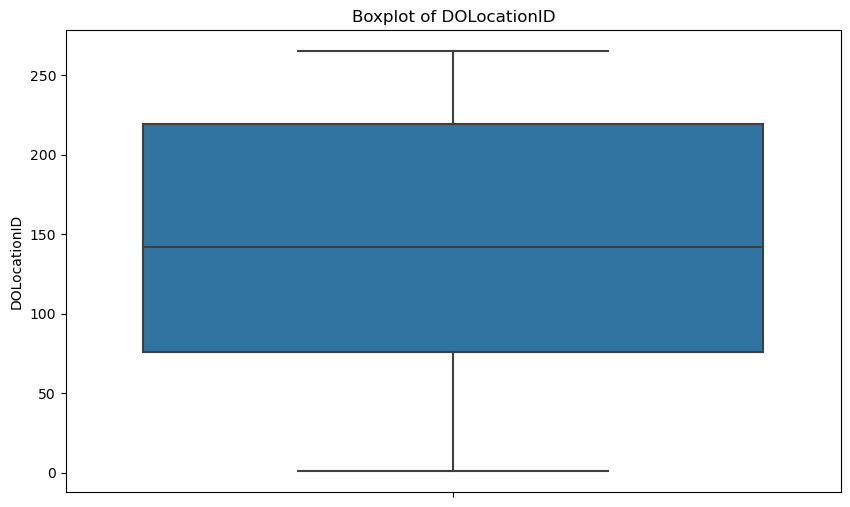

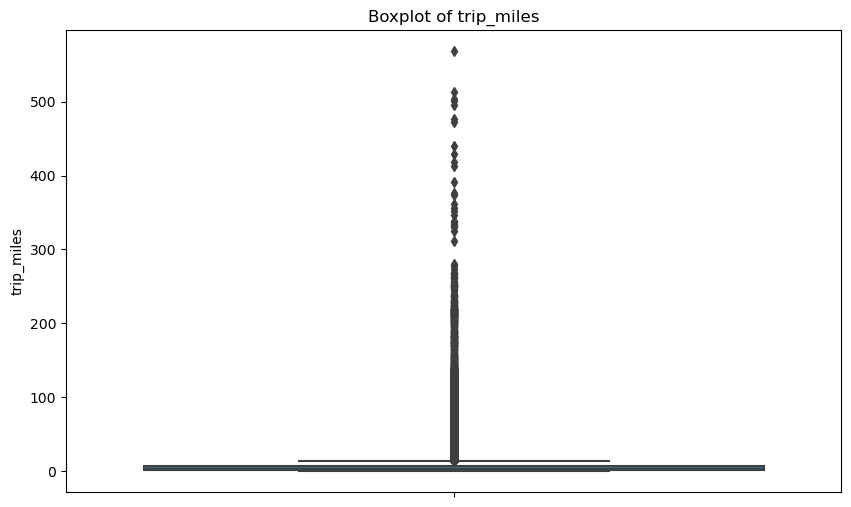

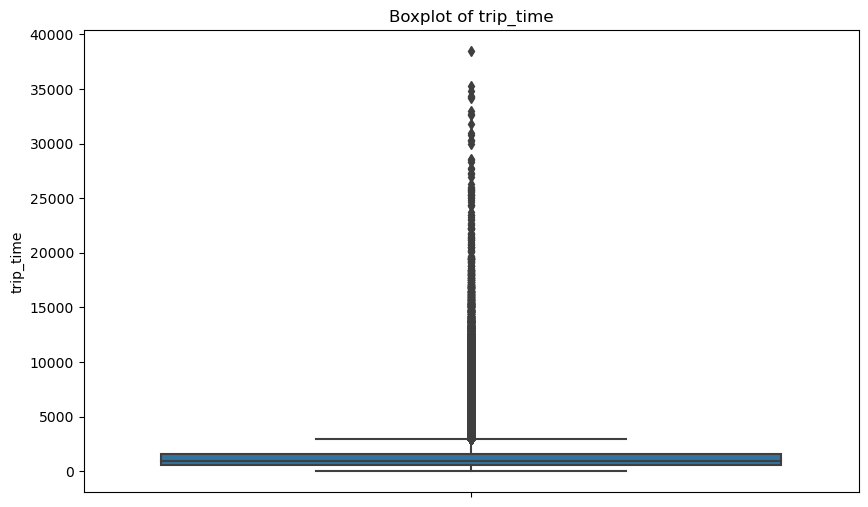

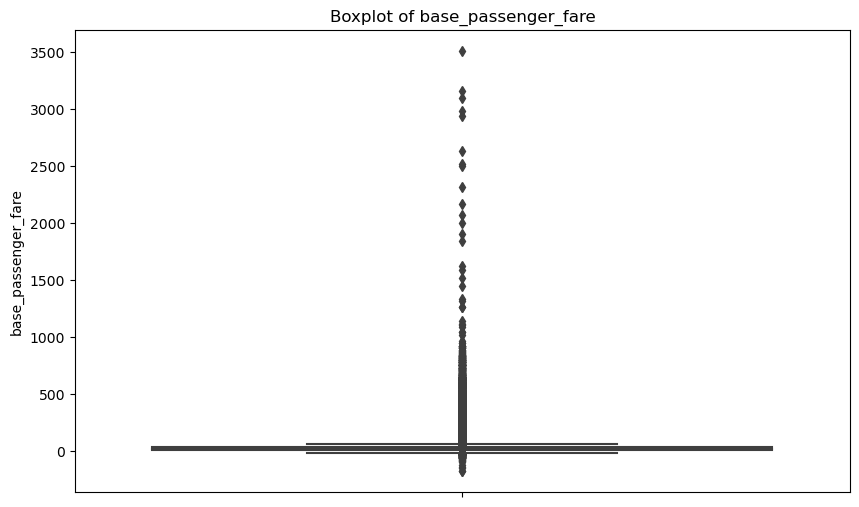

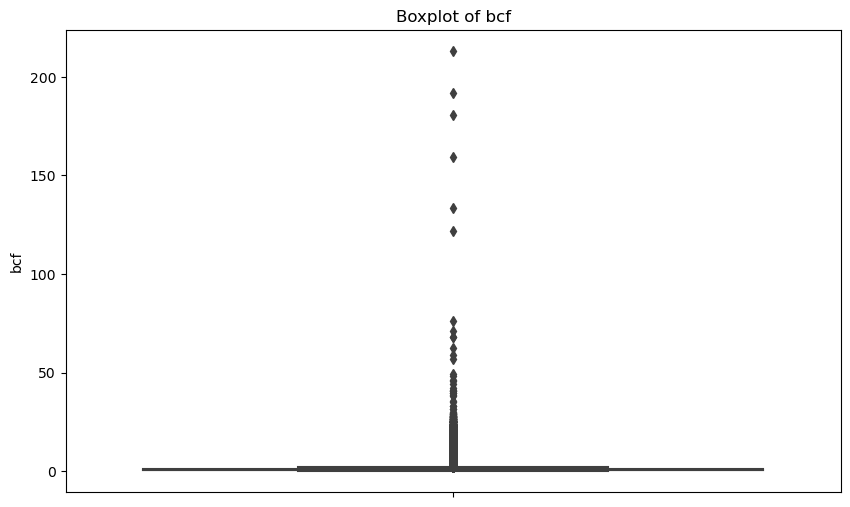

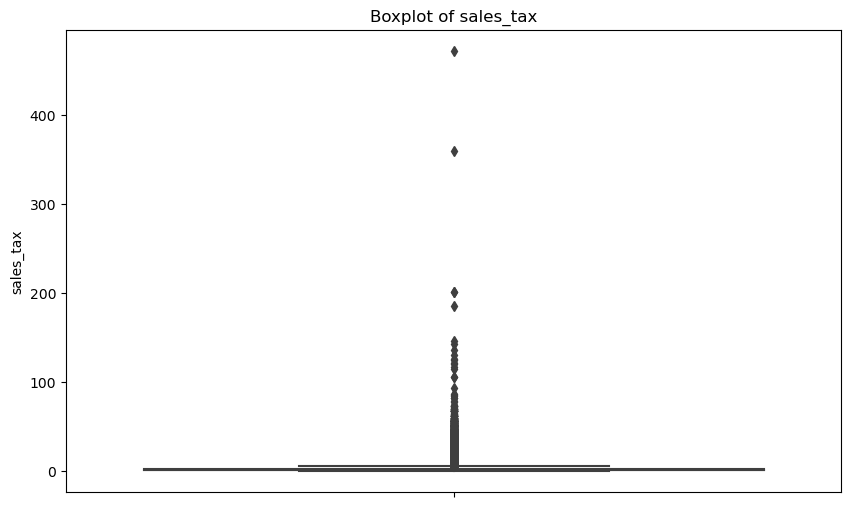

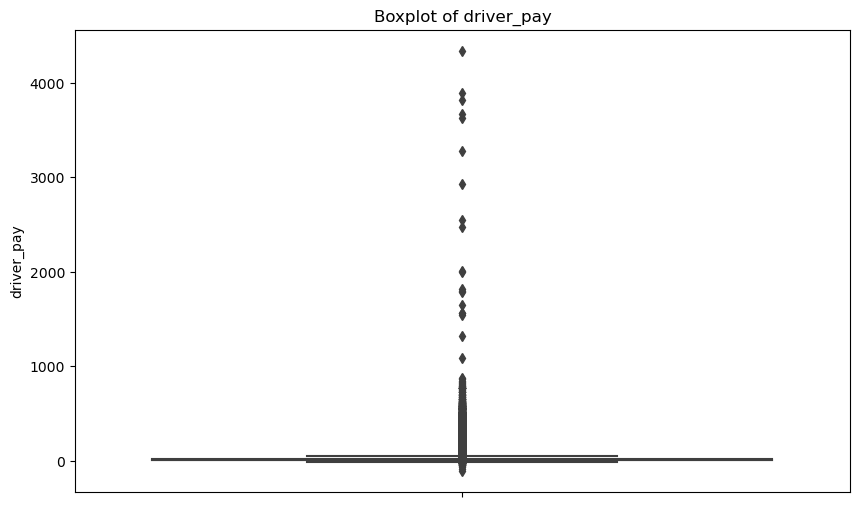

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


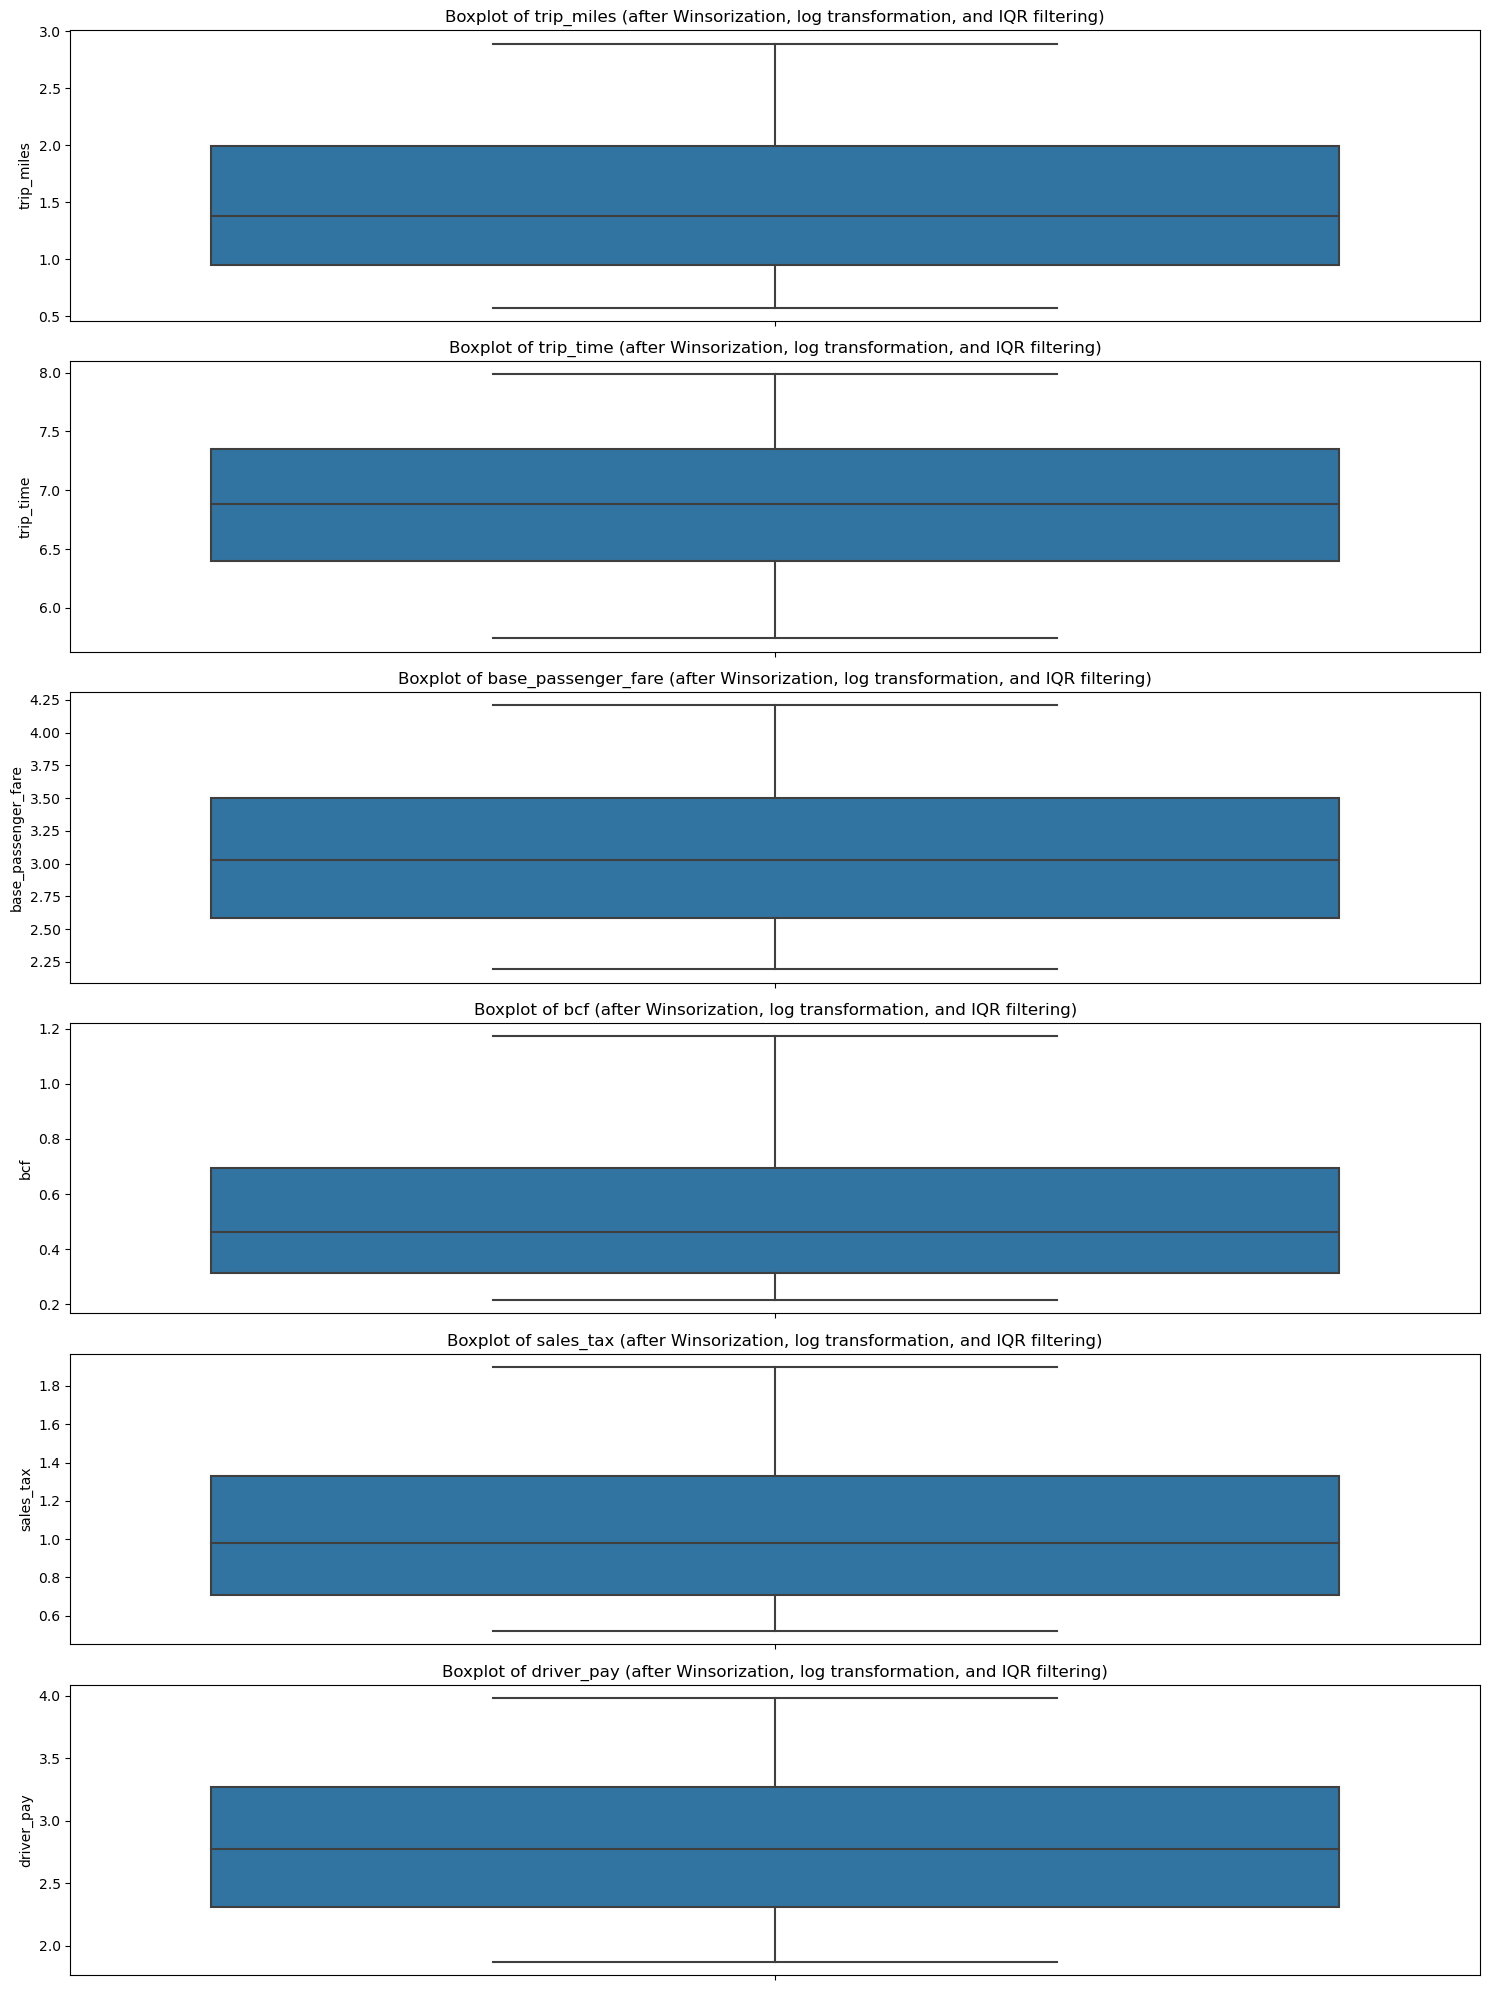

   trip_miles  estimated_emissions  emission_levels
0    1.022451           413.070175                0
1    1.987874           803.101237                0
2    2.285439           923.317329                0
4    2.162173           873.517867                0
5    1.583094           639.569951                0


/tmp/ipykernel_8187/2703483836.py:138: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = june_new.corr()


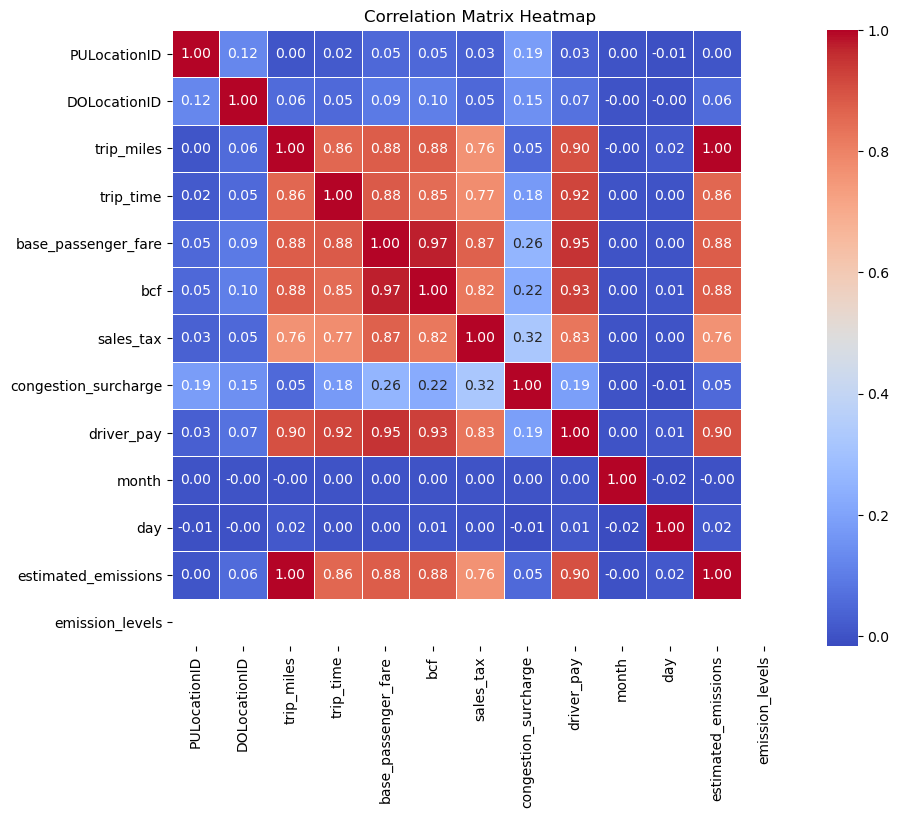

Shape of june_df: (13811893, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:17:17   
1               B03404               B03404         00:04:34   
2               B03404               B03404         00:09:43   
4               B03404               B03404         23:58:11   
5               B03404               B03404         00:16:58   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:21:12        00:21:22         00:27:59           225   
1          00:07:50        00:07:55         00:38:35           255   
2          00:10:19        00:12:19         00:40:14           162   
4          00:02:10        00:02:55         00:29:34           100   
5          00:21:13        00:21:38         00:36:40           145   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0            61    1.022451   5.986452             2.289500  0.239017   
1            85

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

june = pd.read_parquet("Users/ekulshre/2023/fhvhv_tripdata_2023-06.parquet")
june.head()
null_counts = june.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = june['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

june_filtered = june[~june['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
june_filtered = june_filtered.drop(columns=['airport_fee'])
june_filtered = june_filtered.dropna(subset=['originating_base_num'])
null_counts = june_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
june_filtered.shape
june_filtered.info()
june_filtered = june_filtered.drop(columns=['hvfhs_license_num'])
june_filtered['date'] = june_filtered['request_datetime'].dt.date
june_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
june_filtered['date'] = pd.to_datetime(june_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
june_filtered['request_datetime'] = pd.to_datetime(june_filtered['request_datetime']).dt.time
june_filtered['on_scene_datetime'] = pd.to_datetime(june_filtered['on_scene_datetime']).dt.time
june_filtered['pickup_datetime'] = pd.to_datetime(june_filtered['pickup_datetime']).dt.time
june_filtered['dropoff_datetime'] = pd.to_datetime(june_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
june_filtered['month'] = pd.to_datetime(june_filtered['date']).dt.month
june_filtered['day'] = pd.to_datetime(june_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(june_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(june_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = june_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", june_filtered['month'].unique())

june_filtered = june_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag', 'tips', 'tolls'])
duplicate_count = june_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
june_filtered = june_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = june_filtered[june_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

june_filtered = june_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(june_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = june_filtered[june_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

june_filtered = june_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(june_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare', 'bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=june_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
june_new = june_filtered.copy()

for column in columns_to_process:
    june_new[column] = winsorize(june_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    june_new[column] = np.log1p(june_new[column])

for column in columns_to_process:
    Q1 = june_new[column].quantile(0.25)
    Q3 = june_new[column].quantile(0.75)
    IQR = Q3 - Q1
    june_new = june_new[(june_new[column] >= (Q1 - 1.5 * IQR)) & (june_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=june_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
june_new['estimated_emissions'] = june_new['trip_miles'] * emission_factor
emission_threshold = 3000
june_new['emission_levels'] = june_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(june_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = june_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = june_new['dispatching_base_num'].value_counts()
top_10_bases = june_new['dispatching_base_num'].value_counts().head(10).index
june_new = june_new[june_new['dispatching_base_num'].isin(top_10_bases)]
june_new.shape
june_new.head()

# Save june_new to a new DataFrame called june_df
june_df = june_new.copy()

# Display the shape and first few rows of june_df to verify
print("Shape of june_df:", june_df.shape)
print(june_df.head())


In [3]:
merge_4 = pd.concat([may_df, june_df], ignore_index=True)

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 3, 8, Finished, Available, Finished)

In [4]:
merge_4.to_parquet('may_june_2023.parquet', index=False)

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 3, 9, Finished, Available, Finished)

# JULY EDA

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 3, 10, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    5388602
request_datetime              0
on_scene_datetime       5388602
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

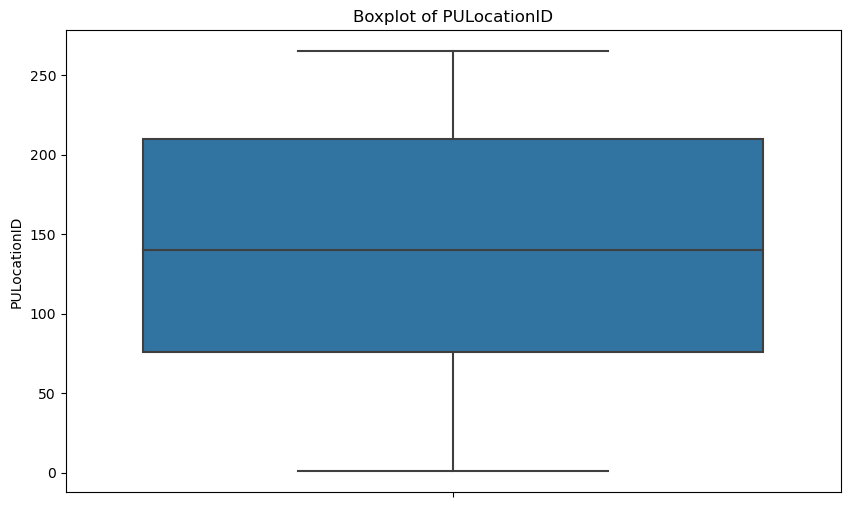

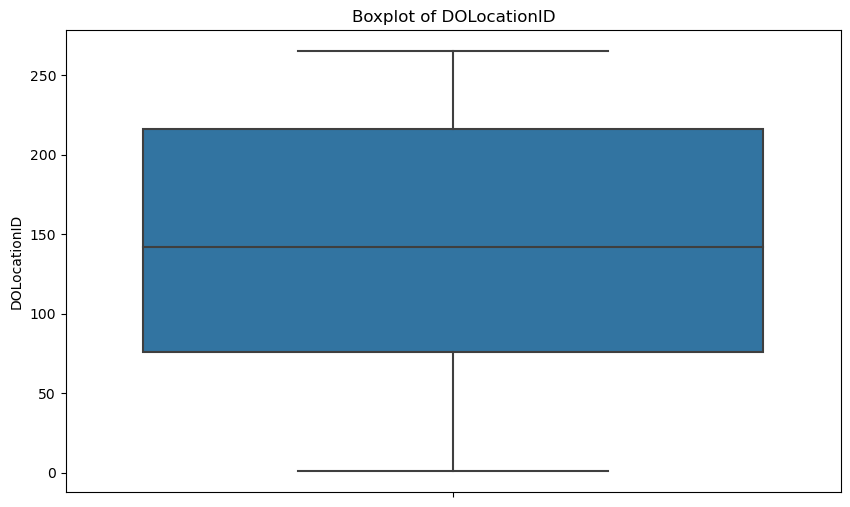

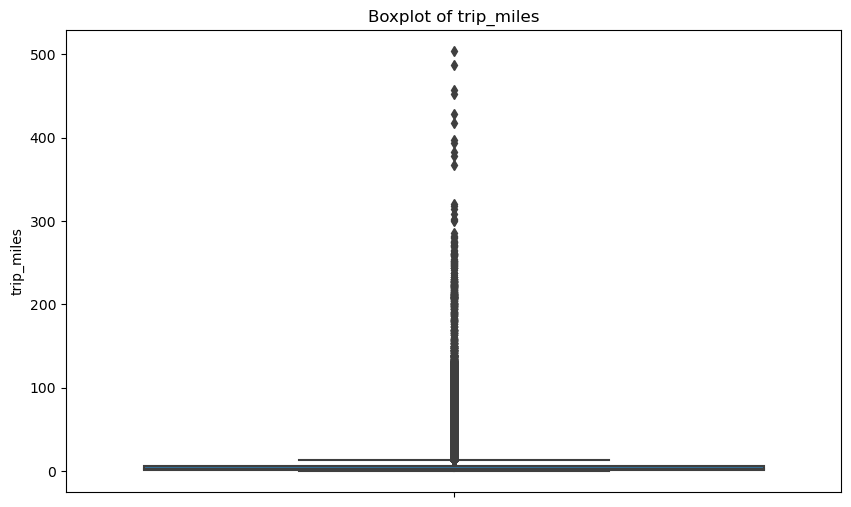

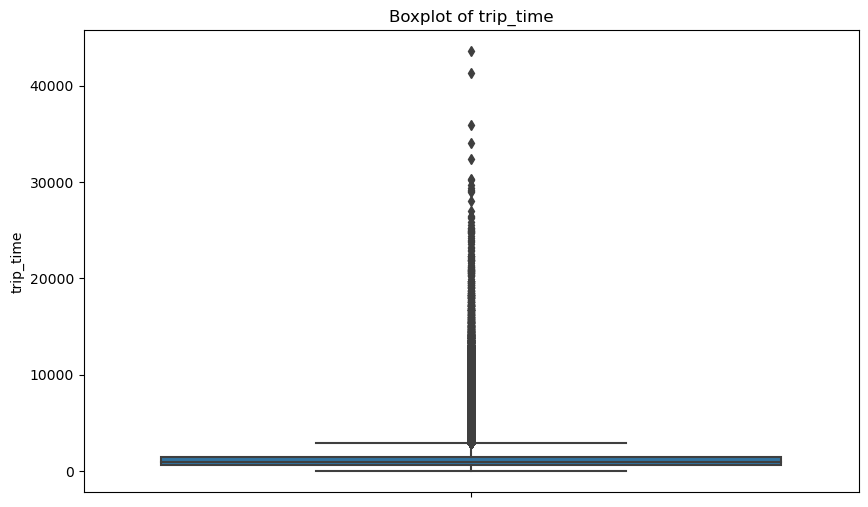

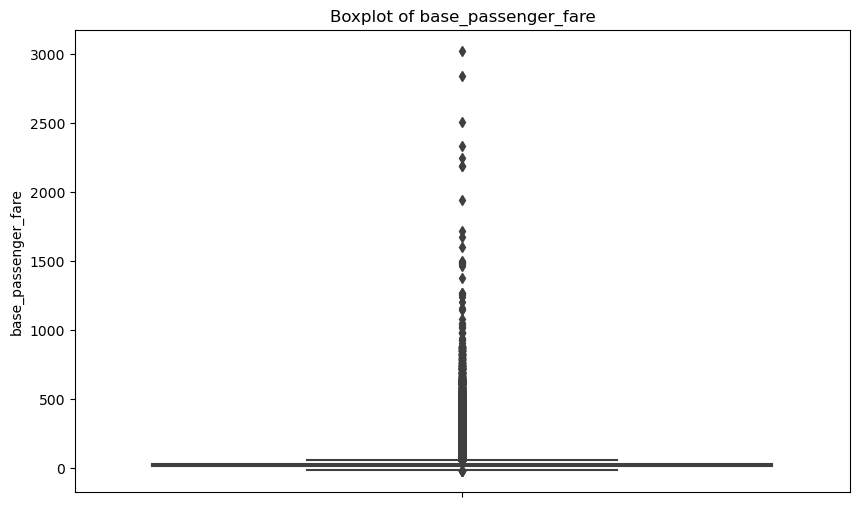

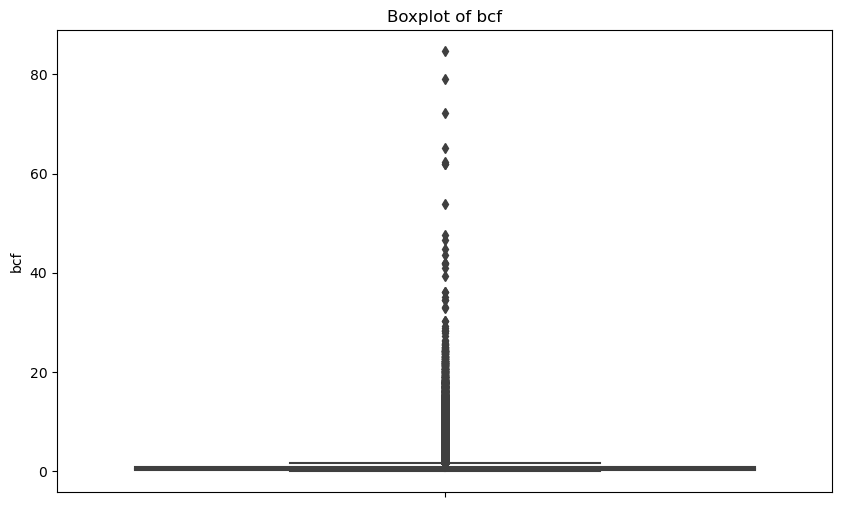

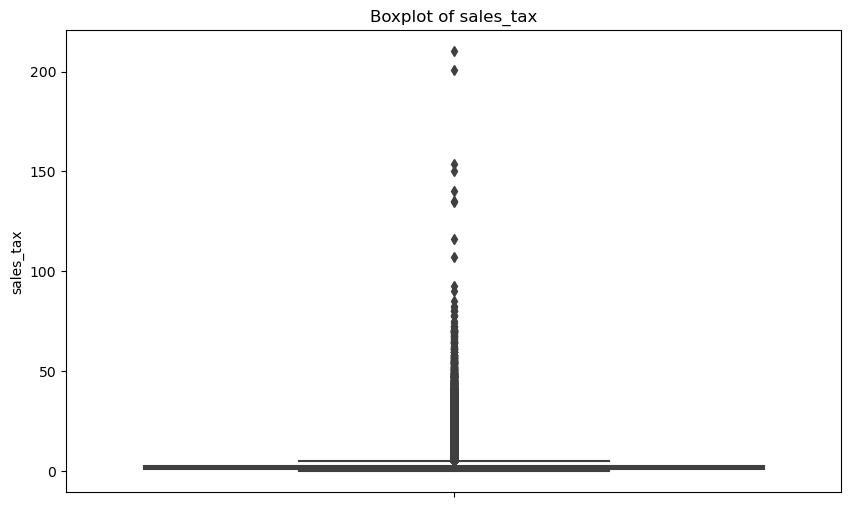

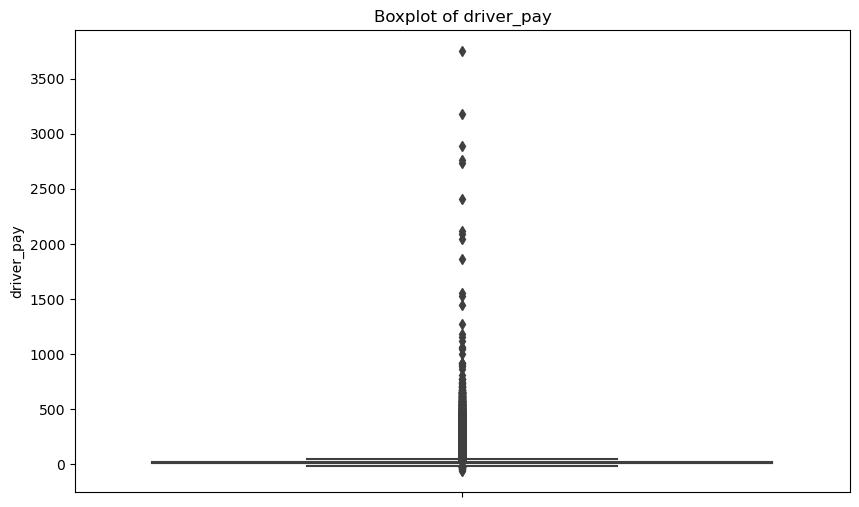

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


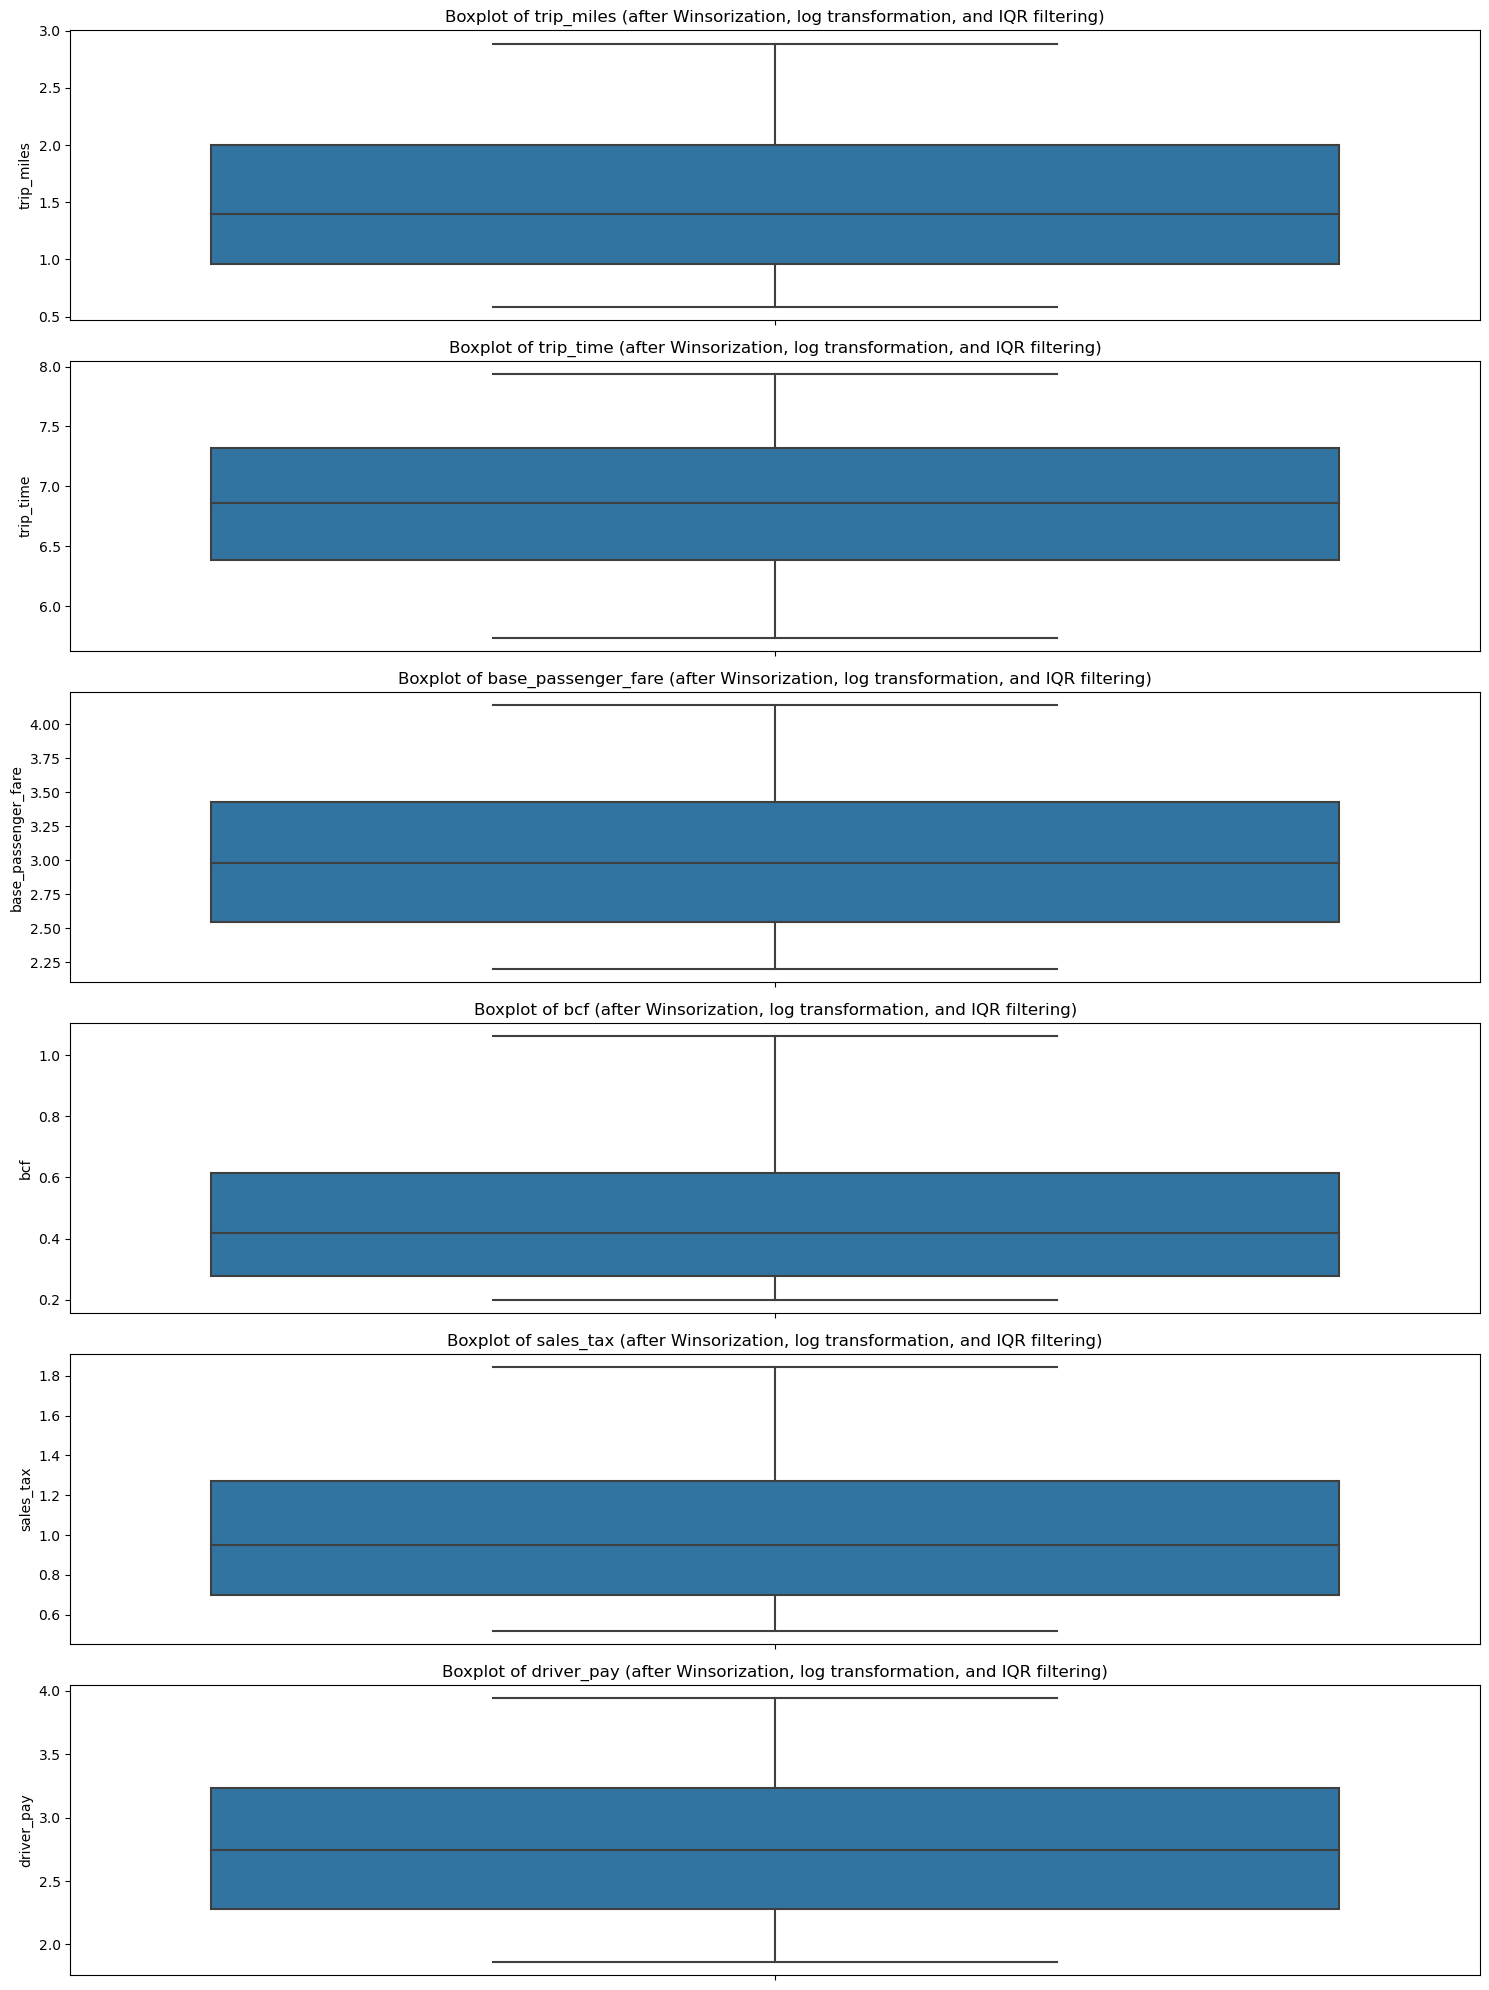

   trip_miles  estimated_emissions  emission_levels
0    1.756132           709.477446                0
1    2.001480           808.597920                0
2    1.903599           769.053976                0
3    1.011601           408.686768                0
5    1.124930           454.471557                0


/tmp/ipykernel_8187/4105208306.py:138: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = july_new.corr()


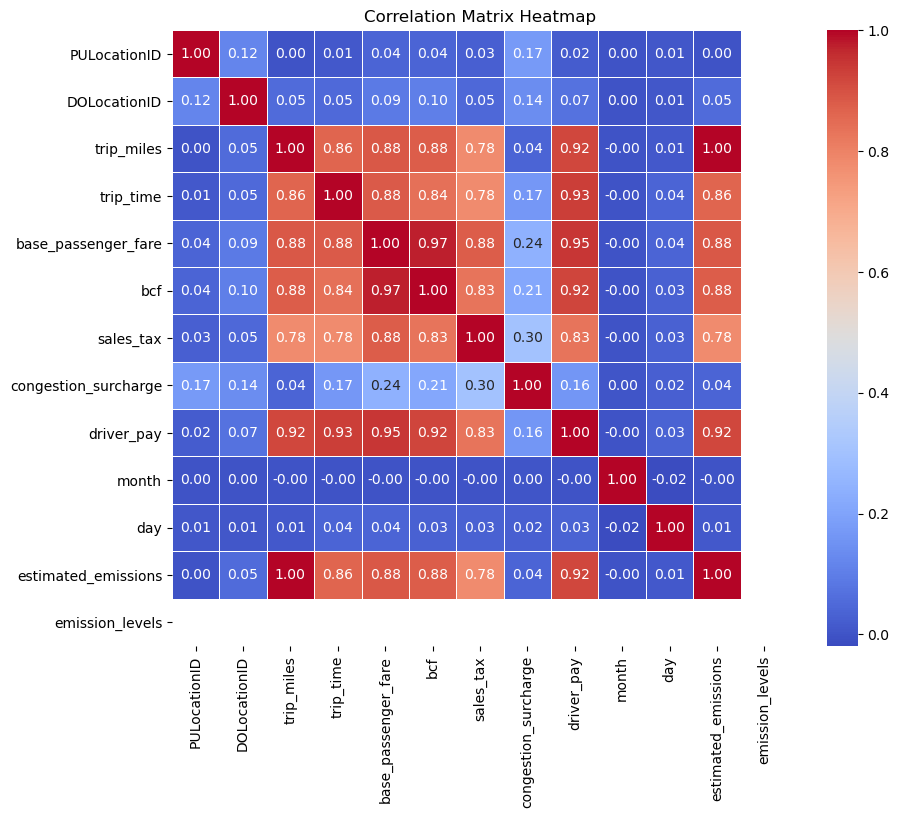

Shape of july_df: (13730883, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:04:21   
1               B03404               B03404         00:40:25   
2               B03404               B03404         00:20:31   
3               B03404               B03404         00:42:50   
5               B03404               B03404         23:59:34   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:07:59        00:08:30         00:33:33            72   
1          00:40:35        00:42:10         01:08:06            26   
2          00:24:05        00:25:00         00:42:38           263   
3          00:47:37        00:48:57         00:57:04            79   
5          00:03:57        00:05:57         00:22:42           233   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0            26    1.756132   7.315884             3.150169  0.476234   
1            37

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

july = pd.read_parquet("Users/ekulshre/2023/fhvhv_tripdata_2023-07.parquet")
july.head()
null_counts = july.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = july['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

july_filtered = july[~july['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
july_filtered = july_filtered.drop(columns=['airport_fee'])
july_filtered = july_filtered.dropna(subset=['originating_base_num'])
null_counts = july_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
july_filtered.shape
july_filtered.info()
july_filtered = july_filtered.drop(columns=['hvfhs_license_num'])
july_filtered['date'] = july_filtered['request_datetime'].dt.date
july_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
july_filtered['date'] = pd.to_datetime(july_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
july_filtered['request_datetime'] = pd.to_datetime(july_filtered['request_datetime']).dt.time
july_filtered['on_scene_datetime'] = pd.to_datetime(july_filtered['on_scene_datetime']).dt.time
july_filtered['pickup_datetime'] = pd.to_datetime(july_filtered['pickup_datetime']).dt.time
july_filtered['dropoff_datetime'] = pd.to_datetime(july_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
july_filtered['month'] = pd.to_datetime(july_filtered['date']).dt.month
july_filtered['day'] = pd.to_datetime(july_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(july_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(july_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = july_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", july_filtered['month'].unique())

july_filtered = july_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag', 'tips', 'tolls'])
duplicate_count = july_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
july_filtered = july_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = july_filtered[july_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

july_filtered = july_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(july_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = july_filtered[july_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

july_filtered = july_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(july_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare', 'bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=july_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
july_new = july_filtered.copy()

for column in columns_to_process:
    july_new[column] = winsorize(july_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    july_new[column] = np.log1p(july_new[column])

for column in columns_to_process:
    Q1 = july_new[column].quantile(0.25)
    Q3 = july_new[column].quantile(0.75)
    IQR = Q3 - Q1
    july_new = july_new[(july_new[column] >= (Q1 - 1.5 * IQR)) & (july_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=july_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
july_new['estimated_emissions'] = july_new['trip_miles'] * emission_factor
emission_threshold = 3000
july_new['emission_levels'] = july_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(july_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = july_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = july_new['dispatching_base_num'].value_counts()
top_10_bases = july_new['dispatching_base_num'].value_counts().head(10).index
july_new = july_new[july_new['dispatching_base_num'].isin(top_10_bases)]
july_new.shape
july_new.head()

# Save july_new to a new DataFrame called july_df
july_df = july_new.copy()

# Display the shape and first few rows of july_df to verify
print("Shape of july_df:", july_df.shape)
print(july_df.head())


# August EDA

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 3, 11, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    5165571
request_datetime              0
on_scene_datetime       5165571
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0005' 'HV0003']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

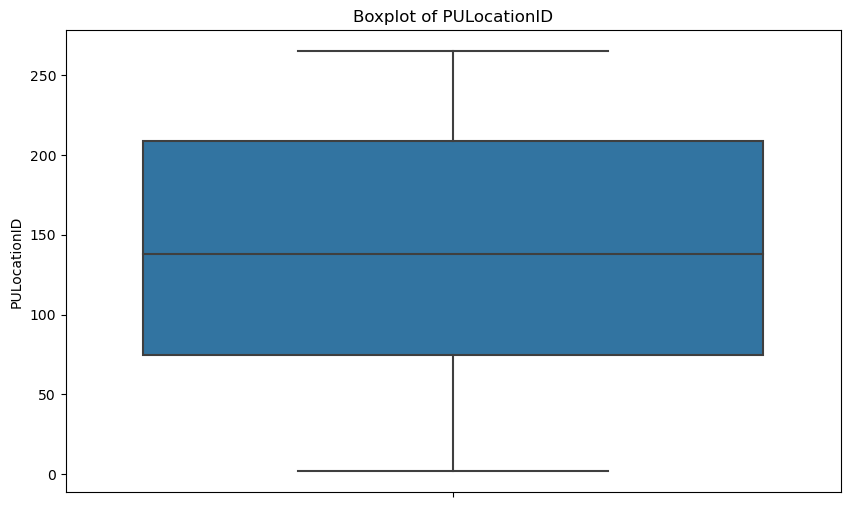

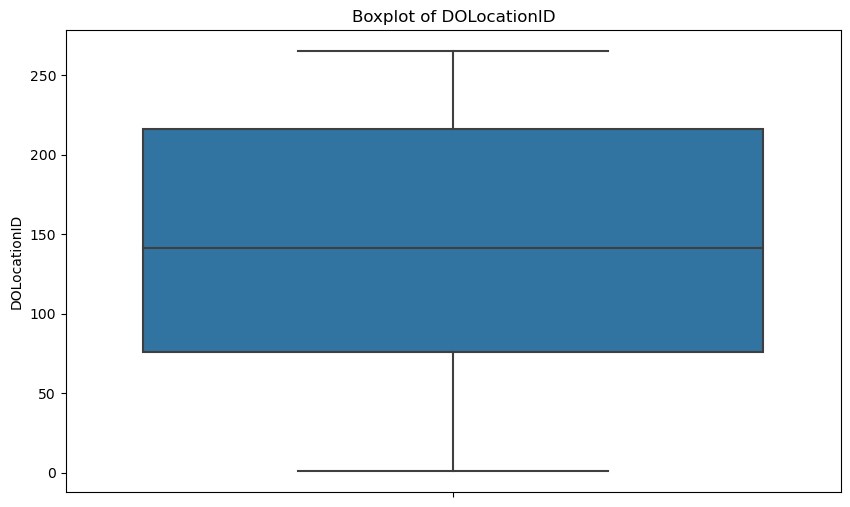

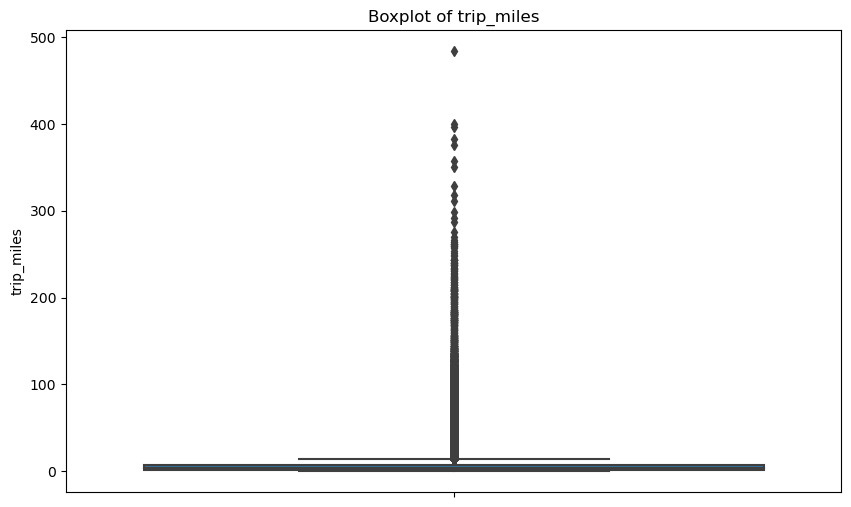

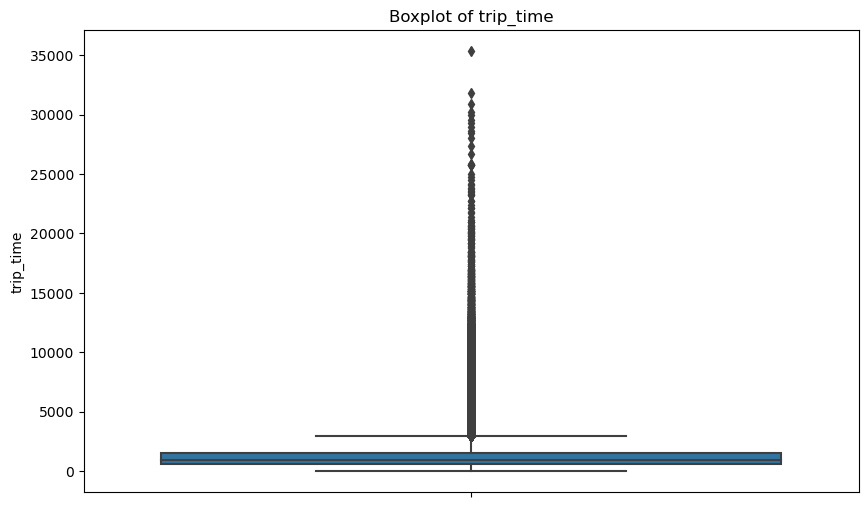

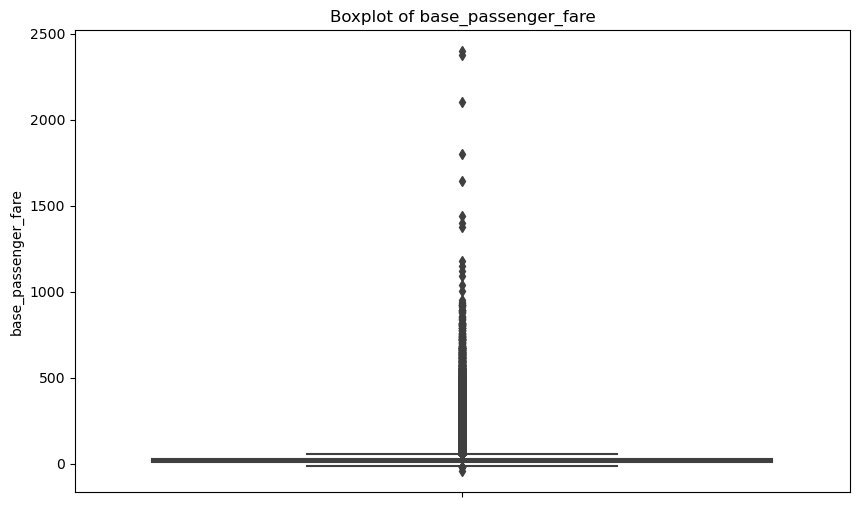

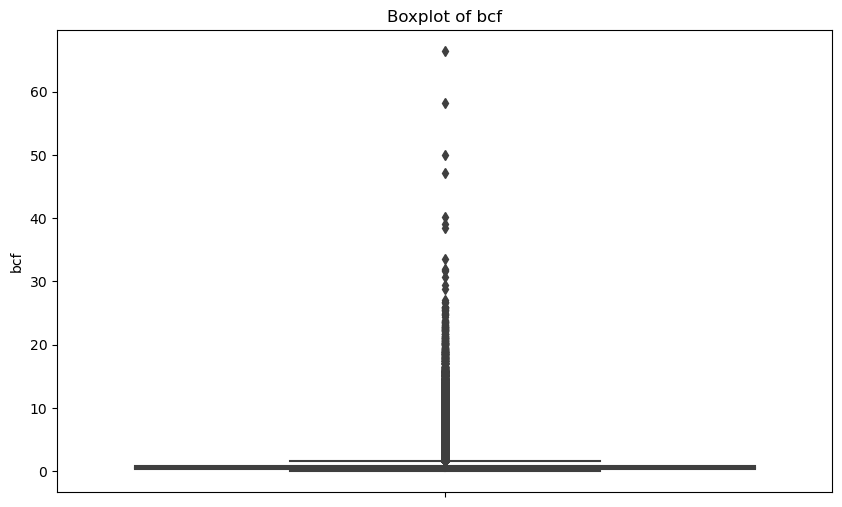

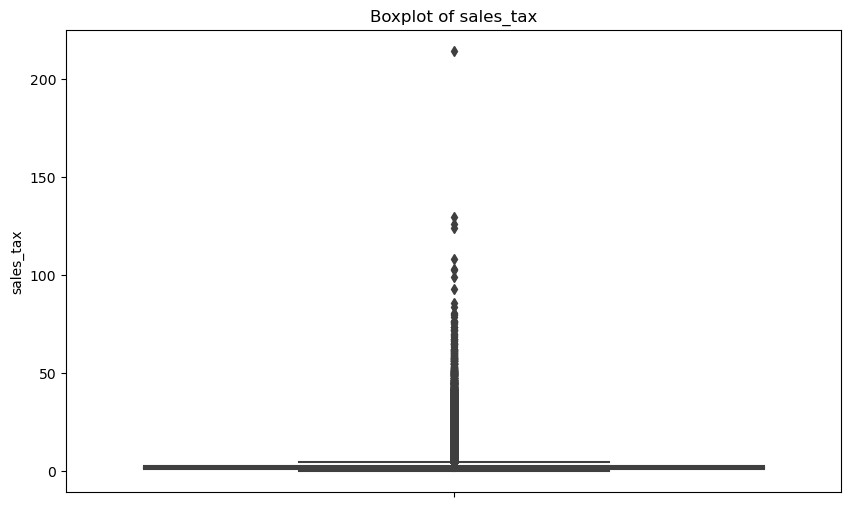

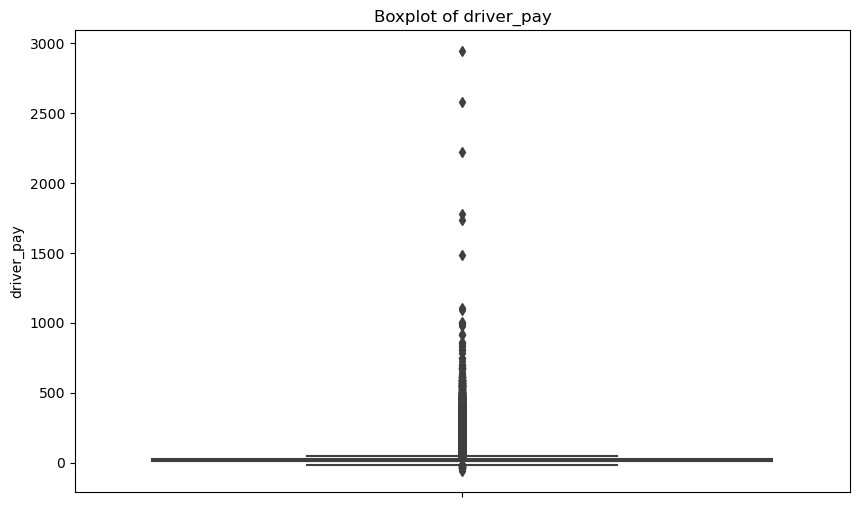

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


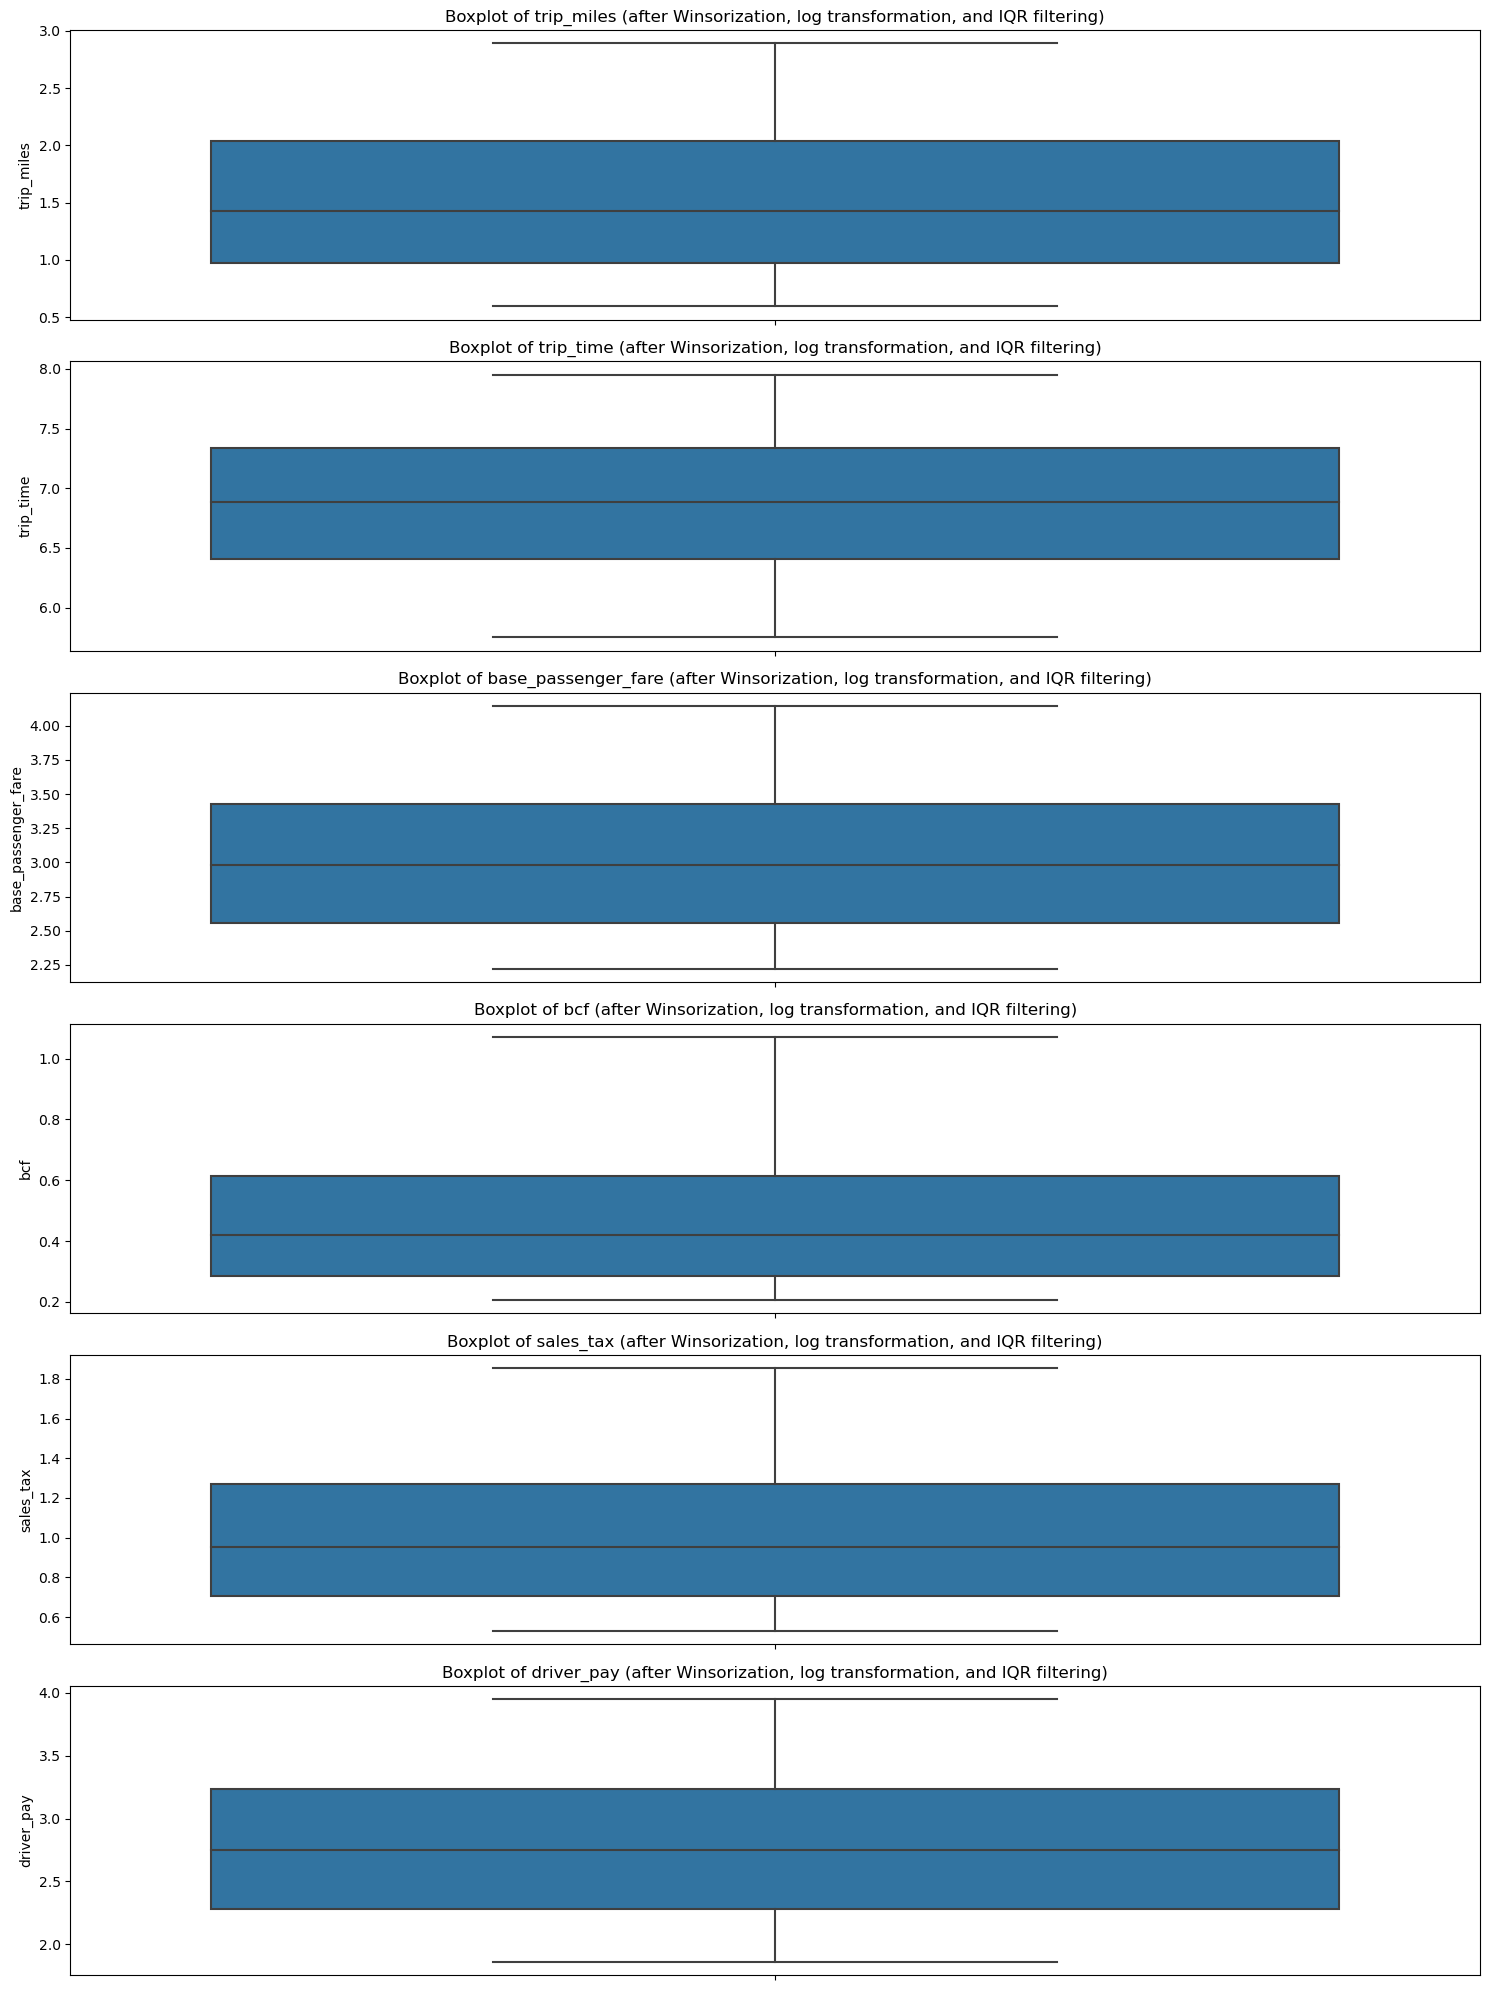

   trip_miles  estimated_emissions  emission_levels
2    1.329724           537.208500                0
3    0.783902           316.696224                0
4    1.467874           593.021237                0
5    0.792993           320.368976                0
6    2.372111           958.332907                0


/tmp/ipykernel_8187/3958737049.py:137: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = aug_new.corr()


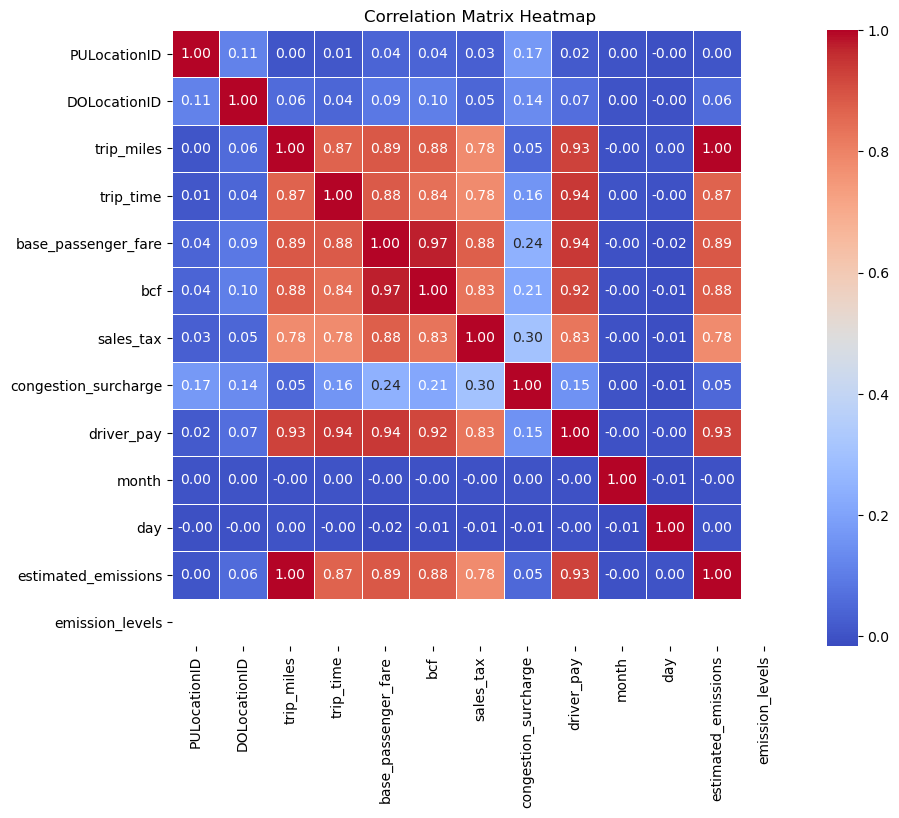

Shape of aug_df: (13143143, 20)
  dispatching_base_num originating_base_num request_datetime  \
2               B03404               B03404         00:34:25   
3               B03404               B03404         00:09:21   
4               B03404               B03404         00:25:44   
5               B03404               B03404         00:49:58   
6               B03404               B03404         00:07:05   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
2          00:36:23        00:36:44         00:49:11           161   
3          00:13:01        00:13:08         00:20:58           211   
4          00:30:37        00:31:20         00:46:05           148   
5          00:51:25        00:55:34         01:04:30            68   
6          00:15:43        00:16:37         00:35:52           138   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
2            68    1.329724   6.617403             3.547604  0.657520   
3           232 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

aug = pd.read_parquet("Users/ekulshre/2023/fhvhv_tripdata_2023-08.parquet")
aug.head()
null_counts = aug.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = aug['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)
aug_filtered = aug[~aug['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
aug_filtered = aug_filtered.drop(columns=['airport_fee'])
aug_filtered = aug_filtered.dropna(subset=['originating_base_num'])
null_counts = aug_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
aug_filtered.shape
aug_filtered.info()
aug_filtered = aug_filtered.drop(columns=['hvfhs_license_num'])
aug_filtered['date'] = aug_filtered['request_datetime'].dt.date
aug_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
aug_filtered['date'] = pd.to_datetime(aug_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
aug_filtered['request_datetime'] = pd.to_datetime(aug_filtered['request_datetime']).dt.time
aug_filtered['on_scene_datetime'] = pd.to_datetime(aug_filtered['on_scene_datetime']).dt.time
aug_filtered['pickup_datetime'] = pd.to_datetime(aug_filtered['pickup_datetime']).dt.time
aug_filtered['dropoff_datetime'] = pd.to_datetime(aug_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
aug_filtered['month'] = pd.to_datetime(aug_filtered['date']).dt.month
aug_filtered['day'] = pd.to_datetime(aug_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(aug_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(aug_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = aug_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", aug_filtered['month'].unique())

aug_filtered = aug_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag', 'tips', 'tolls'])
duplicate_count = aug_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
aug_filtered = aug_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = aug_filtered[aug_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

aug_filtered = aug_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(aug_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = aug_filtered[aug_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

aug_filtered = aug_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(aug_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare', 'bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=aug_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
aug_new = aug_filtered.copy()

for column in columns_to_process:
    aug_new[column] = winsorize(aug_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    aug_new[column] = np.log1p(aug_new[column])

for column in columns_to_process:
    Q1 = aug_new[column].quantile(0.25)
    Q3 = aug_new[column].quantile(0.75)
    IQR = Q3 - Q1
    aug_new = aug_new[(aug_new[column] >= (Q1 - 1.5 * IQR)) & (aug_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=aug_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
aug_new['estimated_emissions'] = aug_new['trip_miles'] * emission_factor
emission_threshold = 3000
aug_new['emission_levels'] = aug_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(aug_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = aug_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = aug_new['dispatching_base_num'].value_counts()
top_10_bases = aug_new['dispatching_base_num'].value_counts().head(10).index
aug_new = aug_new[aug_new['dispatching_base_num'].isin(top_10_bases)]
aug_new.shape
aug_new.head()

# Save aug_new to a new DataFrame called aug_df
aug_df = aug_new.copy()

# Display the shape and first few rows of aug_df to verify
print("Shape of aug_df:", aug_df.shape)
print(aug_df.head())


In [7]:
merge_5 = pd.concat([july_df, aug_df], ignore_index=True)

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 3, 12, Finished, Available, Finished)

In [8]:
merge_5.to_parquet('july_aug_2023.parquet', index=False)

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 3, 13, Finished, Available, Finished)

# SEP EDA

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 6, 6, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    5528568
request_datetime              0
on_scene_datetime       5528568
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

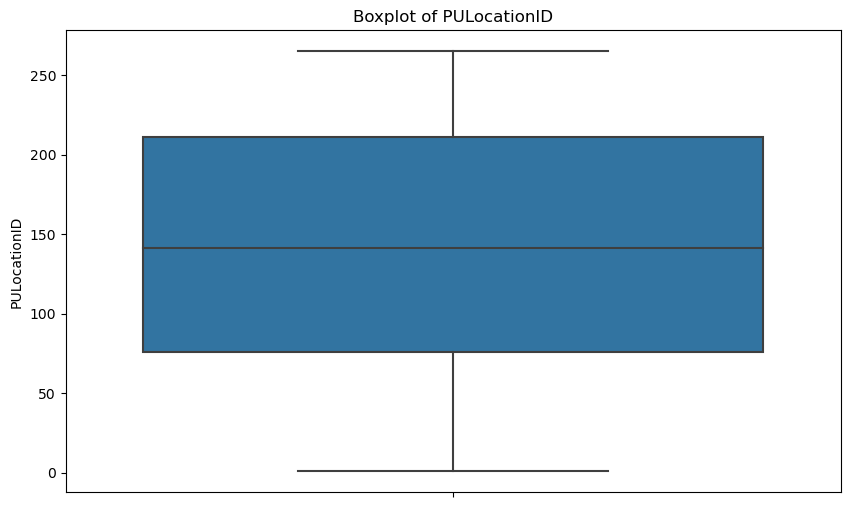

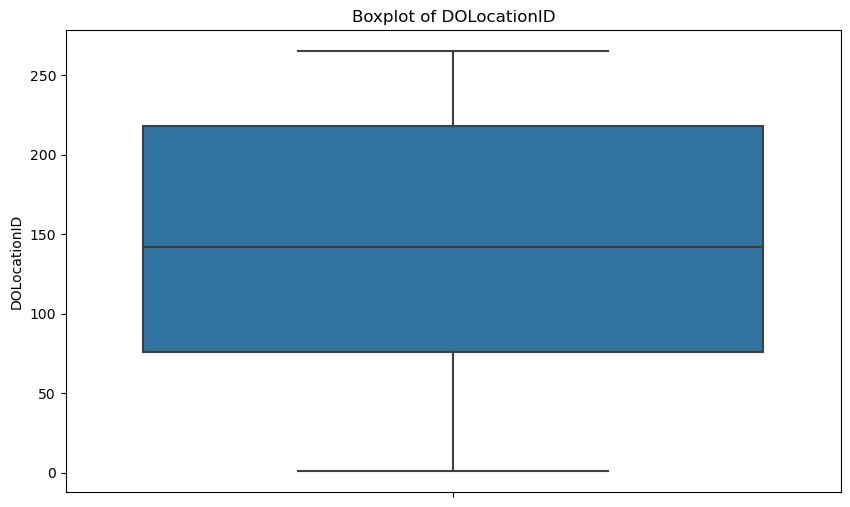

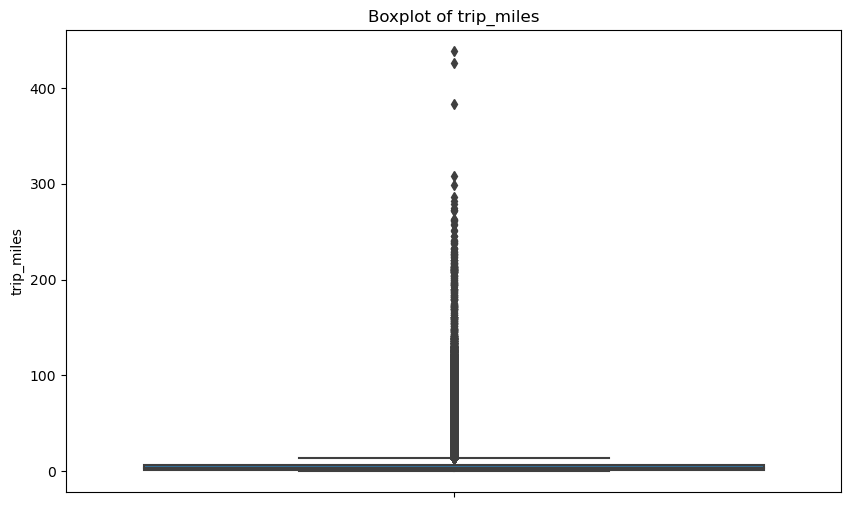

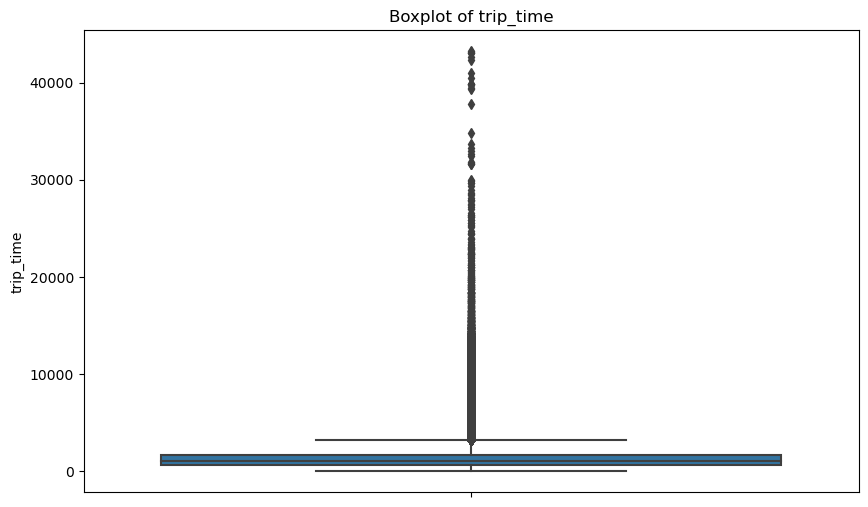

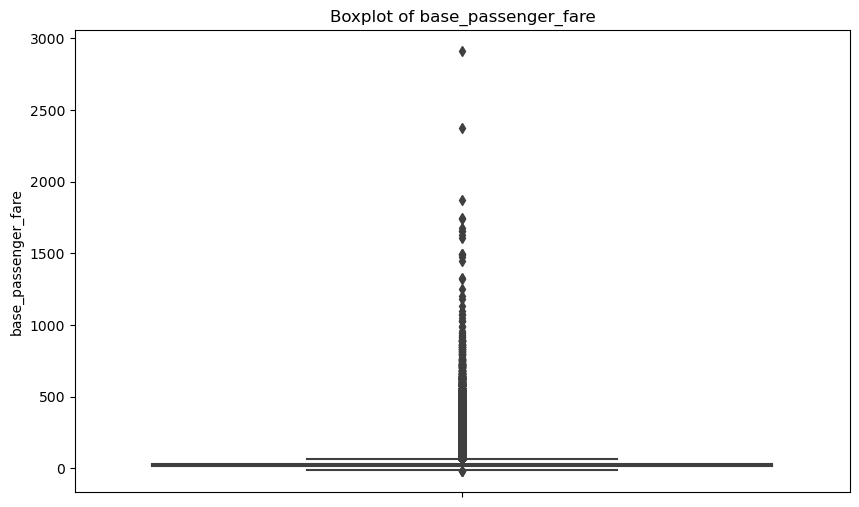

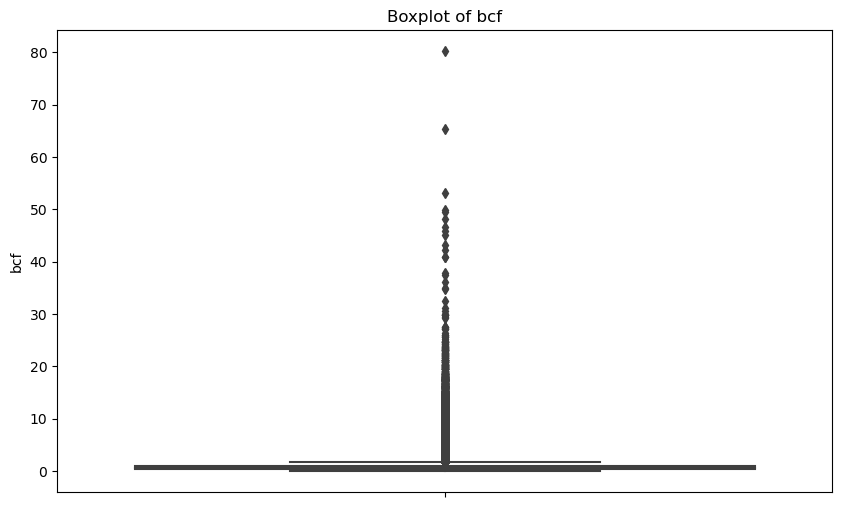

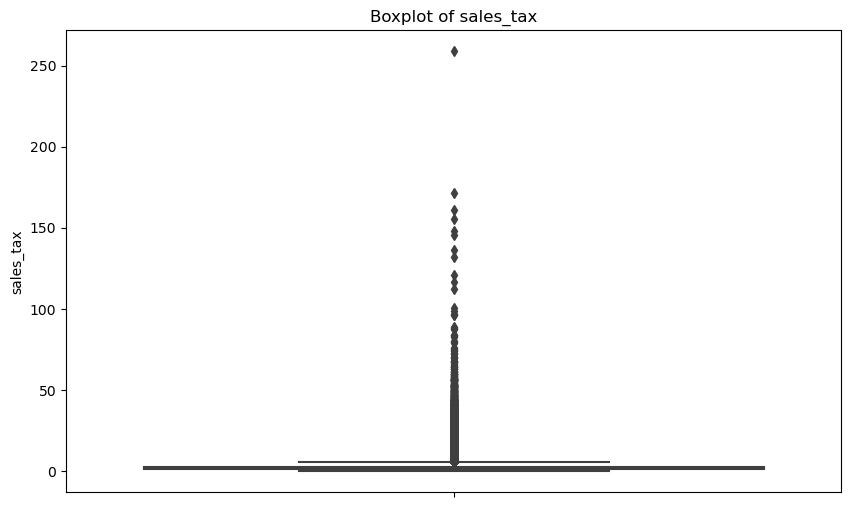

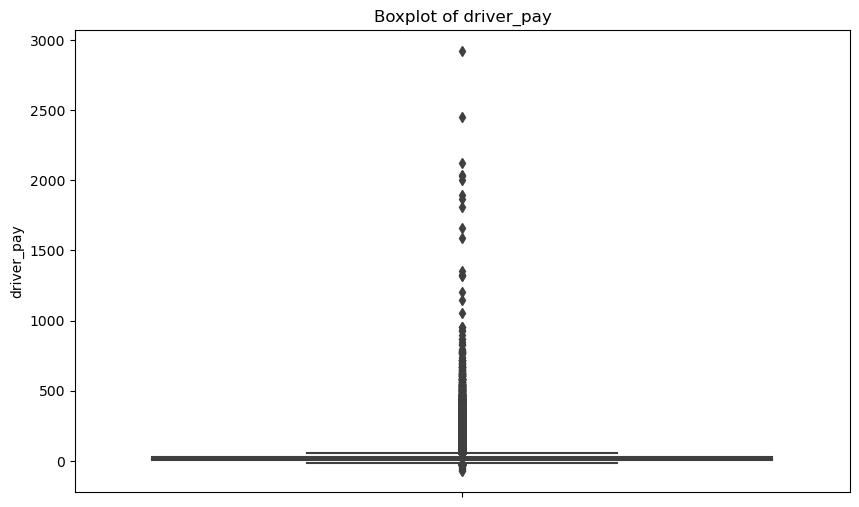

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


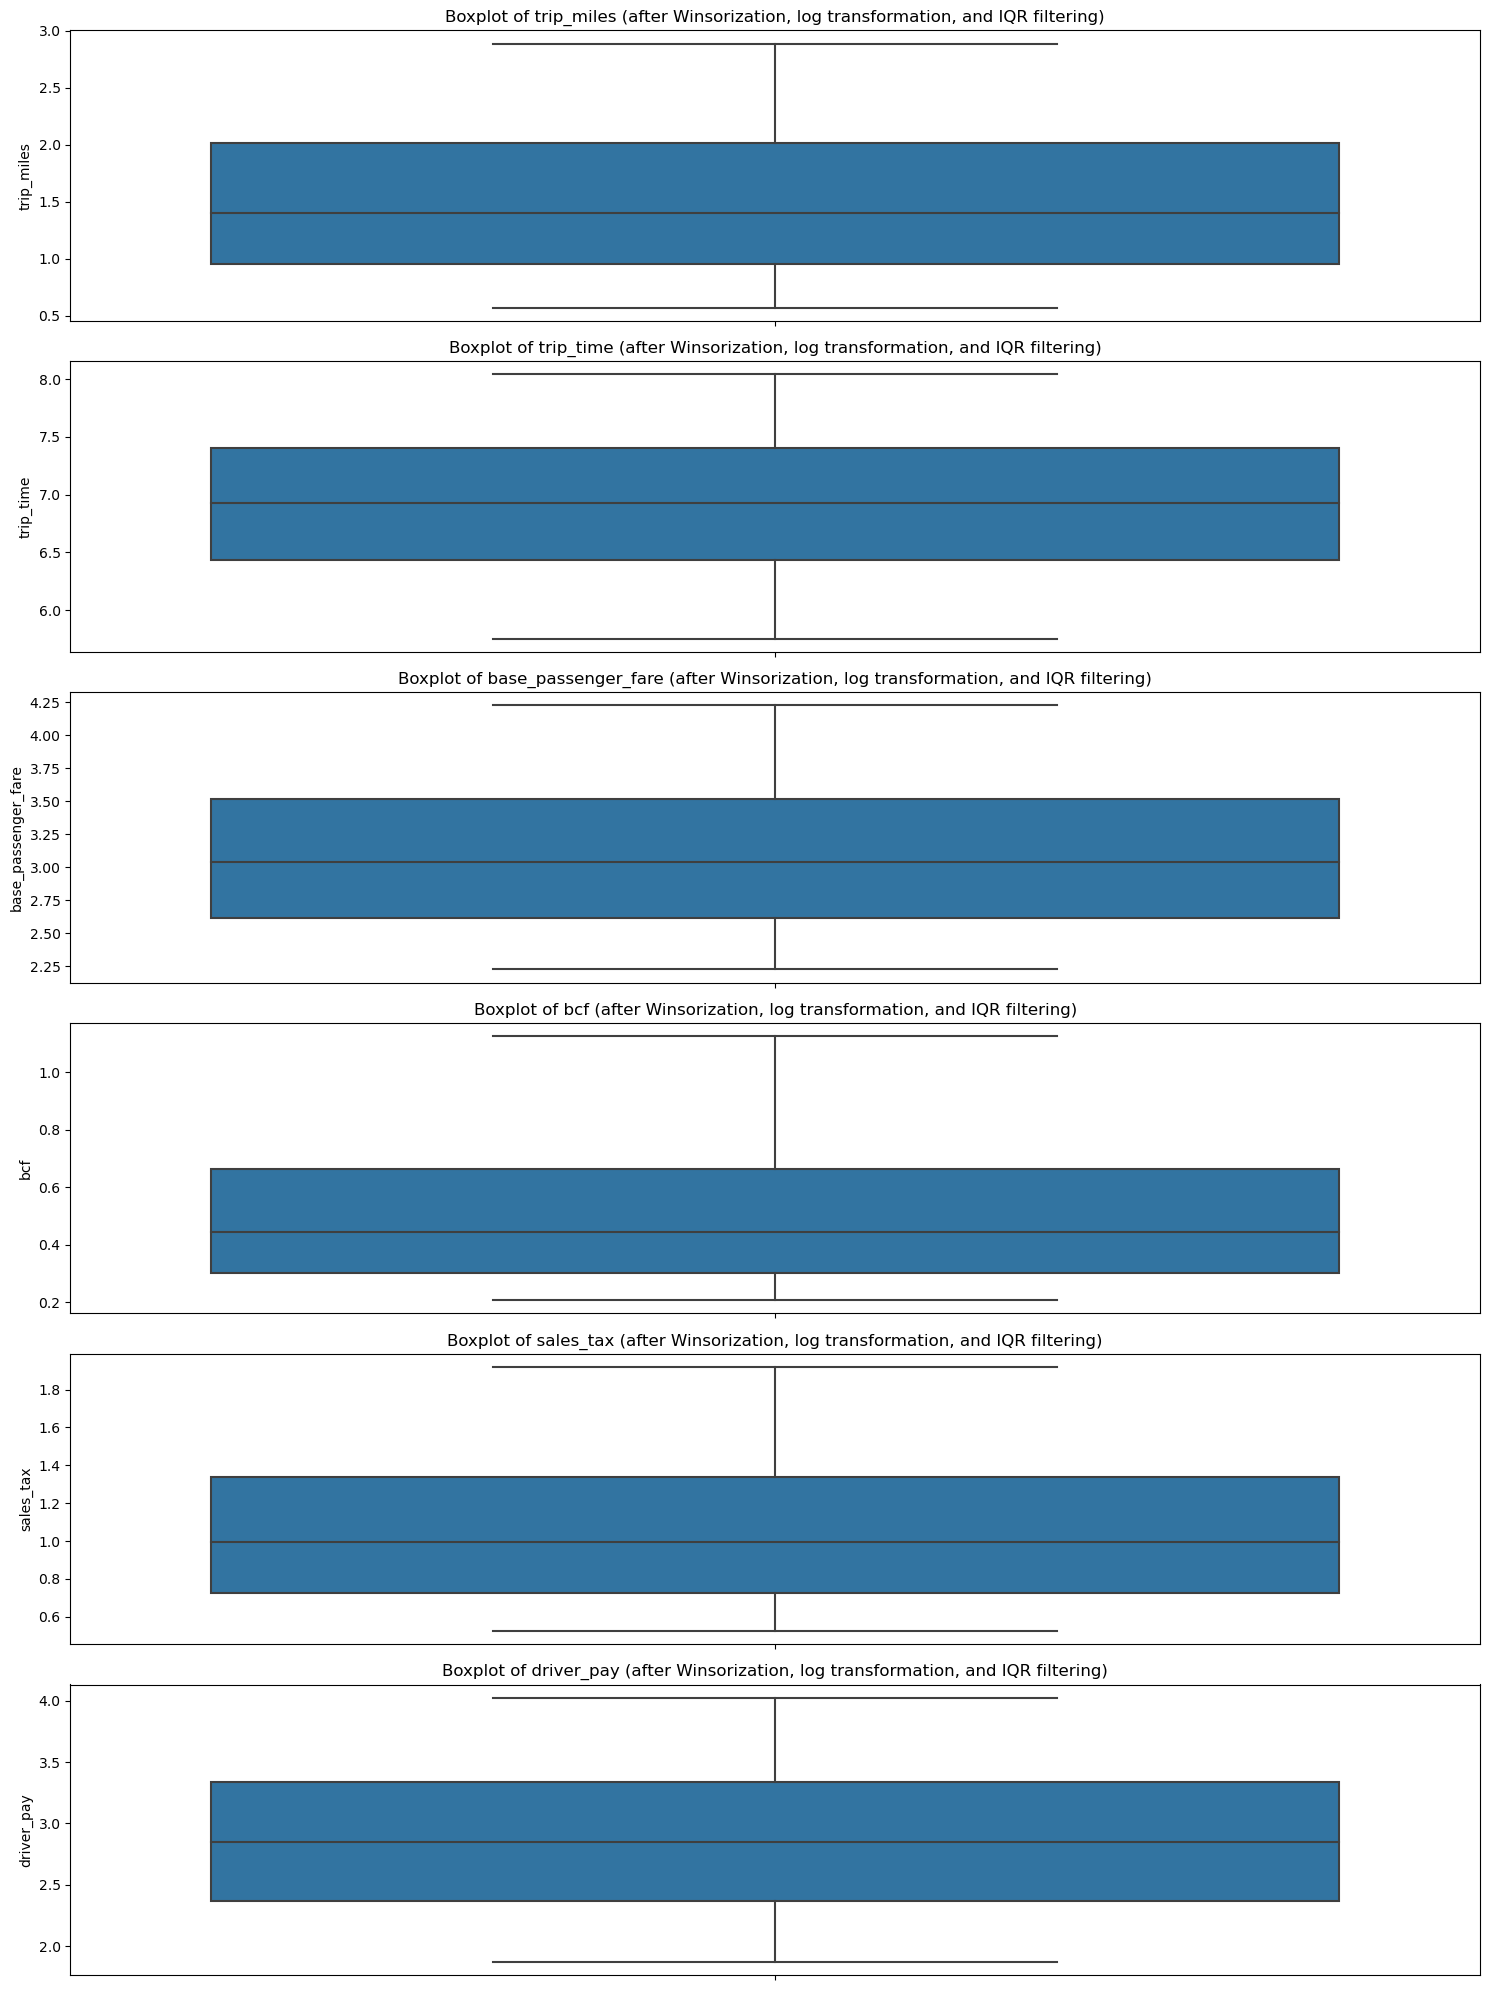

   trip_miles  estimated_emissions  emission_levels
0    1.208960           488.419980                0
1    2.052841           829.347707                0
2    0.959350           387.577489                0
3    0.862890           348.607542                0
4    0.828552           334.734934                0


/tmp/ipykernel_5976/295758960.py:138: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sep_new.corr()


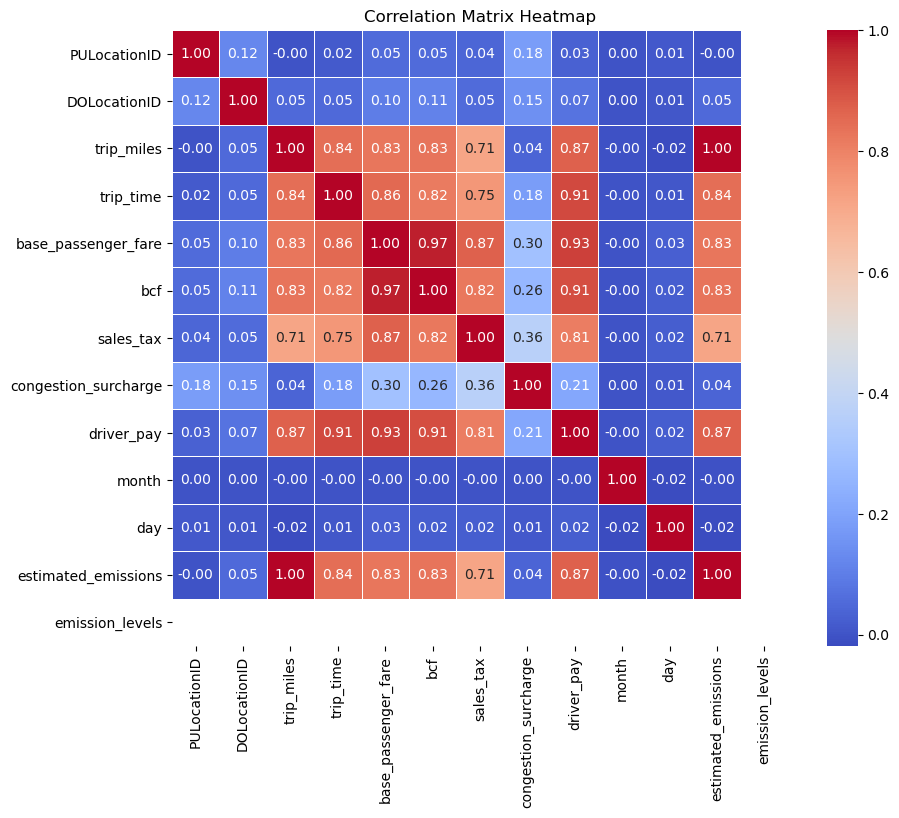

Shape of sep_df: (14311596, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:00:13   
1               B03404               B03404         00:27:24   
2               B03404               B03404         00:25:14   
3               B03404               B03404         00:31:44   
4               B03404               B03404         00:08:33   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:02:47        00:02:56         00:14:08             7   
1          00:29:32        00:29:44         00:59:58           144   
2          00:27:15        00:28:01         00:35:53           186   
3          00:36:51        00:36:51         00:46:48           125   
4          00:10:53        00:12:28         00:27:47           170   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           226    1.208960   6.511745             2.531313  0.277632   
1            36 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

sep = pd.read_parquet("Users/ekulshre/2023/fhvhv_tripdata_2023-09.parquet")
sep.head()
null_counts = sep.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = sep['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

sep_filtered = sep[~sep['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
sep_filtered = sep_filtered.drop(columns=['airport_fee'])
sep_filtered = sep_filtered.dropna(subset=['originating_base_num'])
null_counts = sep_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
sep_filtered.shape
sep_filtered.info()
sep_filtered = sep_filtered.drop(columns=['hvfhs_license_num'])
sep_filtered['date'] = sep_filtered['request_datetime'].dt.date
sep_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
sep_filtered['date'] = pd.to_datetime(sep_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
sep_filtered['request_datetime'] = pd.to_datetime(sep_filtered['request_datetime']).dt.time
sep_filtered['on_scene_datetime'] = pd.to_datetime(sep_filtered['on_scene_datetime']).dt.time
sep_filtered['pickup_datetime'] = pd.to_datetime(sep_filtered['pickup_datetime']).dt.time
sep_filtered['dropoff_datetime'] = pd.to_datetime(sep_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
sep_filtered['month'] = pd.to_datetime(sep_filtered['date']).dt.month
sep_filtered['day'] = pd.to_datetime(sep_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(sep_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(sep_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = sep_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", sep_filtered['month'].unique())

sep_filtered = sep_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag', 'tips', 'tolls'])
duplicate_count = sep_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
sep_filtered = sep_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = sep_filtered[sep_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

sep_filtered = sep_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(sep_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = sep_filtered[sep_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

sep_filtered = sep_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(sep_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare', 'bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=sep_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
sep_new = sep_filtered.copy()

for column in columns_to_process:
    sep_new[column] = winsorize(sep_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    sep_new[column] = np.log1p(sep_new[column])

for column in columns_to_process:
    Q1 = sep_new[column].quantile(0.25)
    Q3 = sep_new[column].quantile(0.75)
    IQR = Q3 - Q1
    sep_new = sep_new[(sep_new[column] >= (Q1 - 1.5 * IQR)) & (sep_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=sep_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
sep_new['estimated_emissions'] = sep_new['trip_miles'] * emission_factor
emission_threshold = 3000
sep_new['emission_levels'] = sep_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(sep_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = sep_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = sep_new['dispatching_base_num'].value_counts()
top_10_bases = sep_new['dispatching_base_num'].value_counts().head(10).index
sep_new = sep_new[sep_new['dispatching_base_num'].isin(top_10_bases)]
sep_new.shape
sep_new.head()

# Save sep_new to a new DataFrame called sep_df
sep_df = sep_new.copy()

# Display the shape and first few rows of sep_df to verify
print("Shape of sep_df:", sep_df.shape)
print(sep_df.head())


# OCT EDA

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 6, 7, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    5800447
request_datetime              0
on_scene_datetime       5800447
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

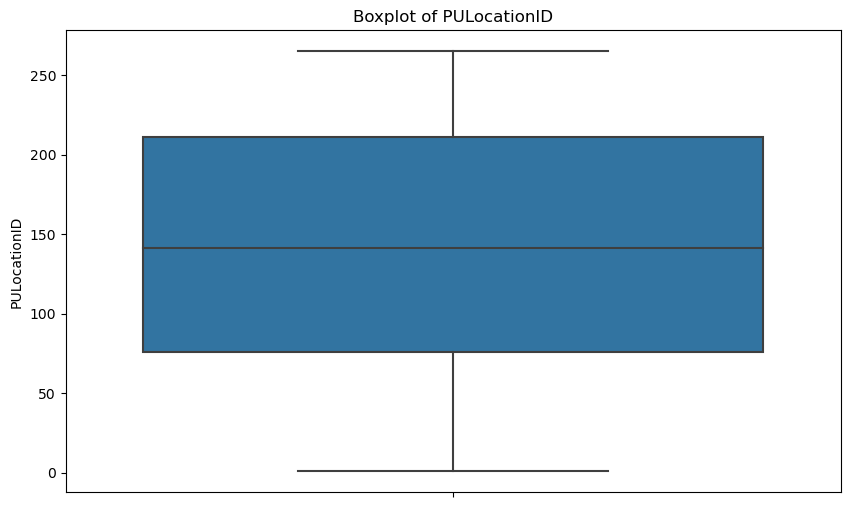

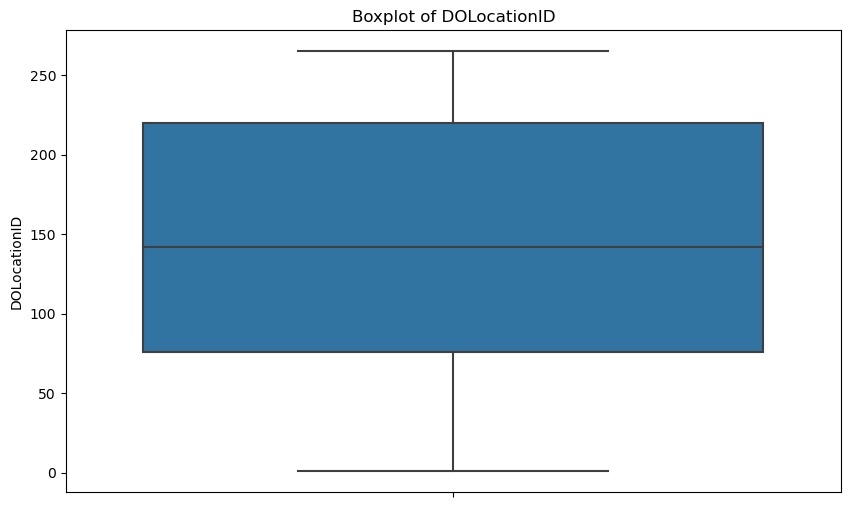

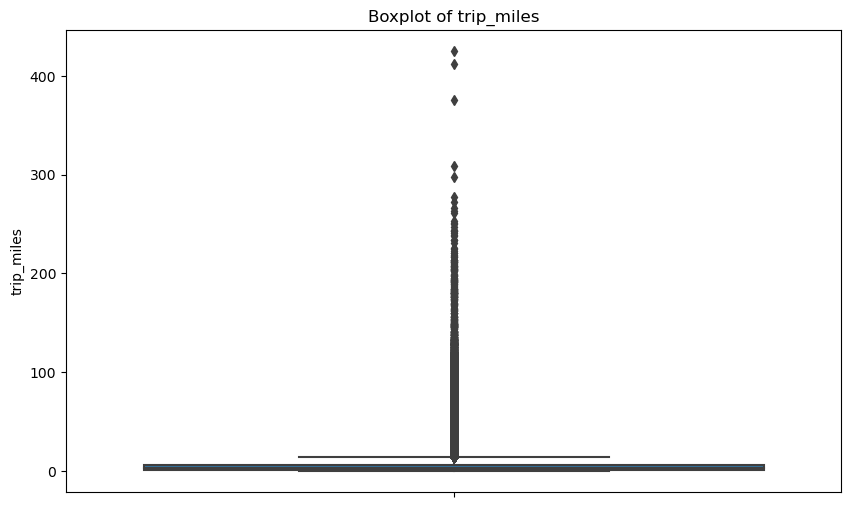

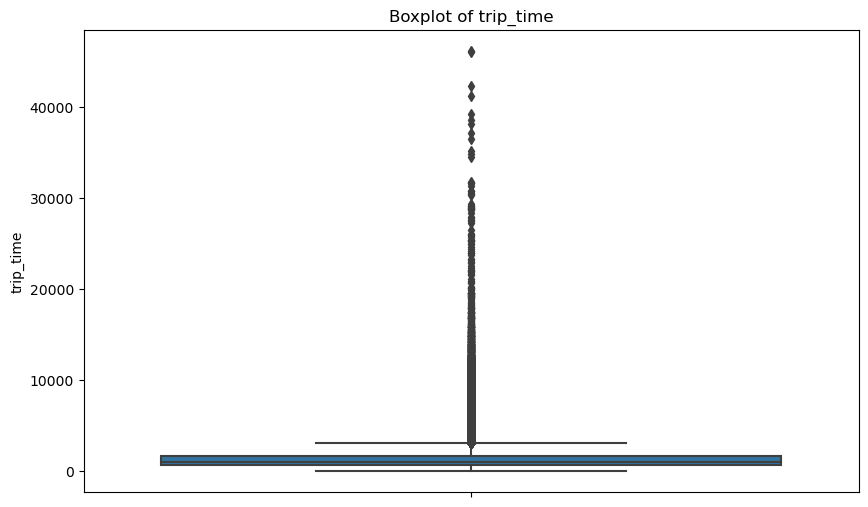

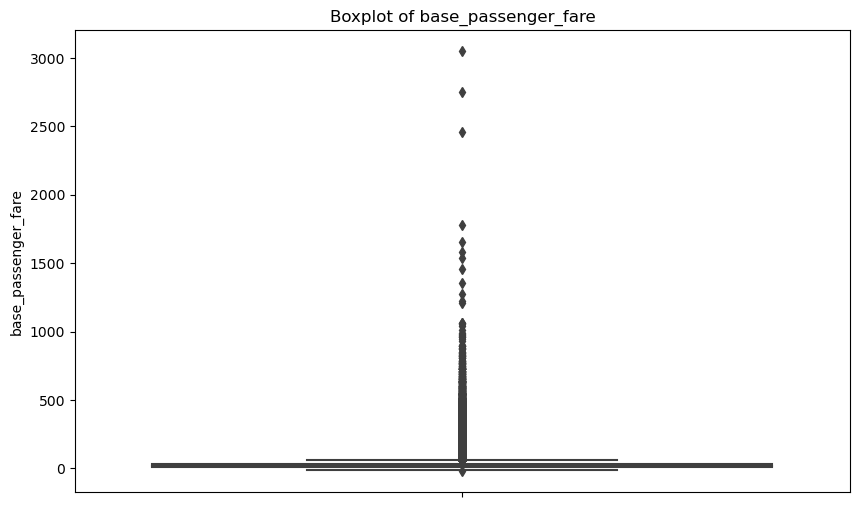

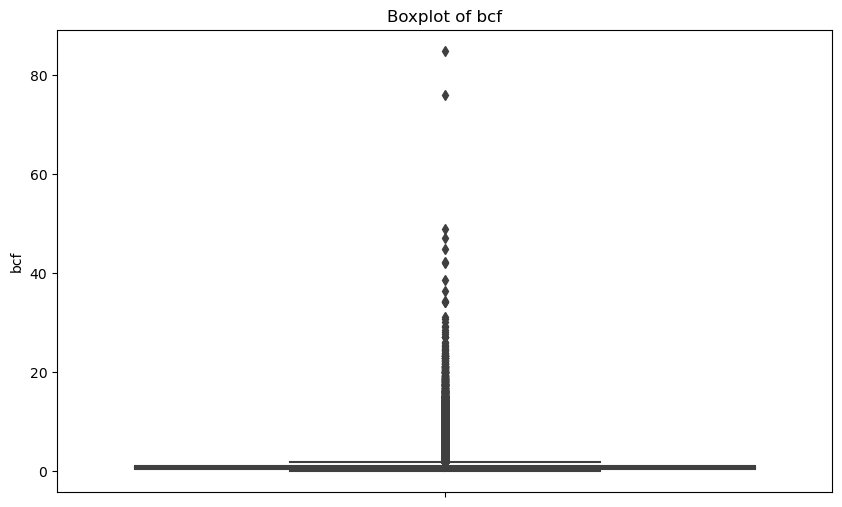

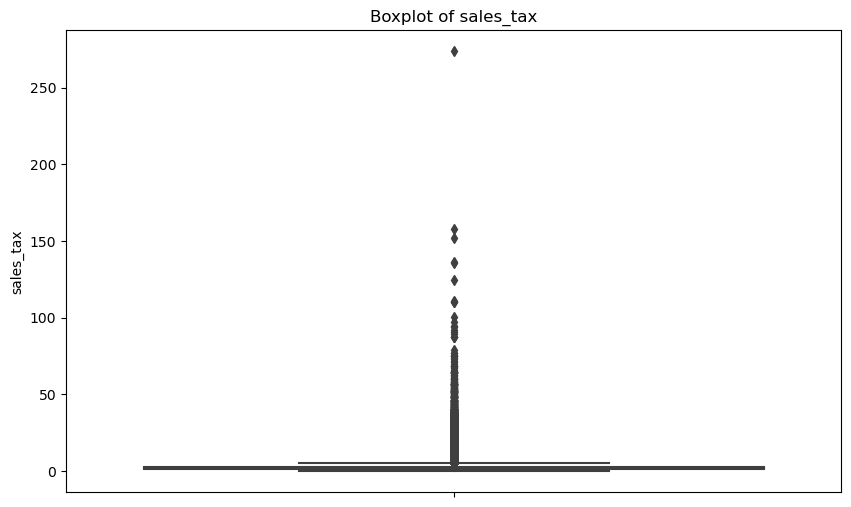

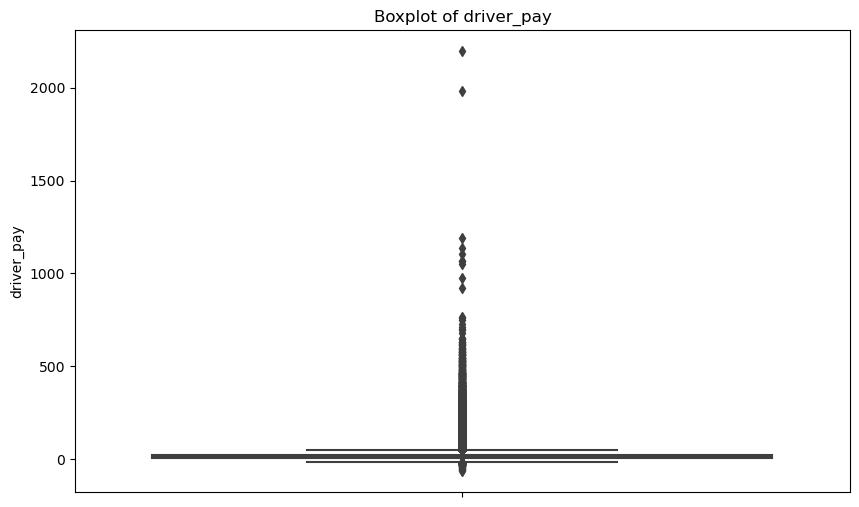

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


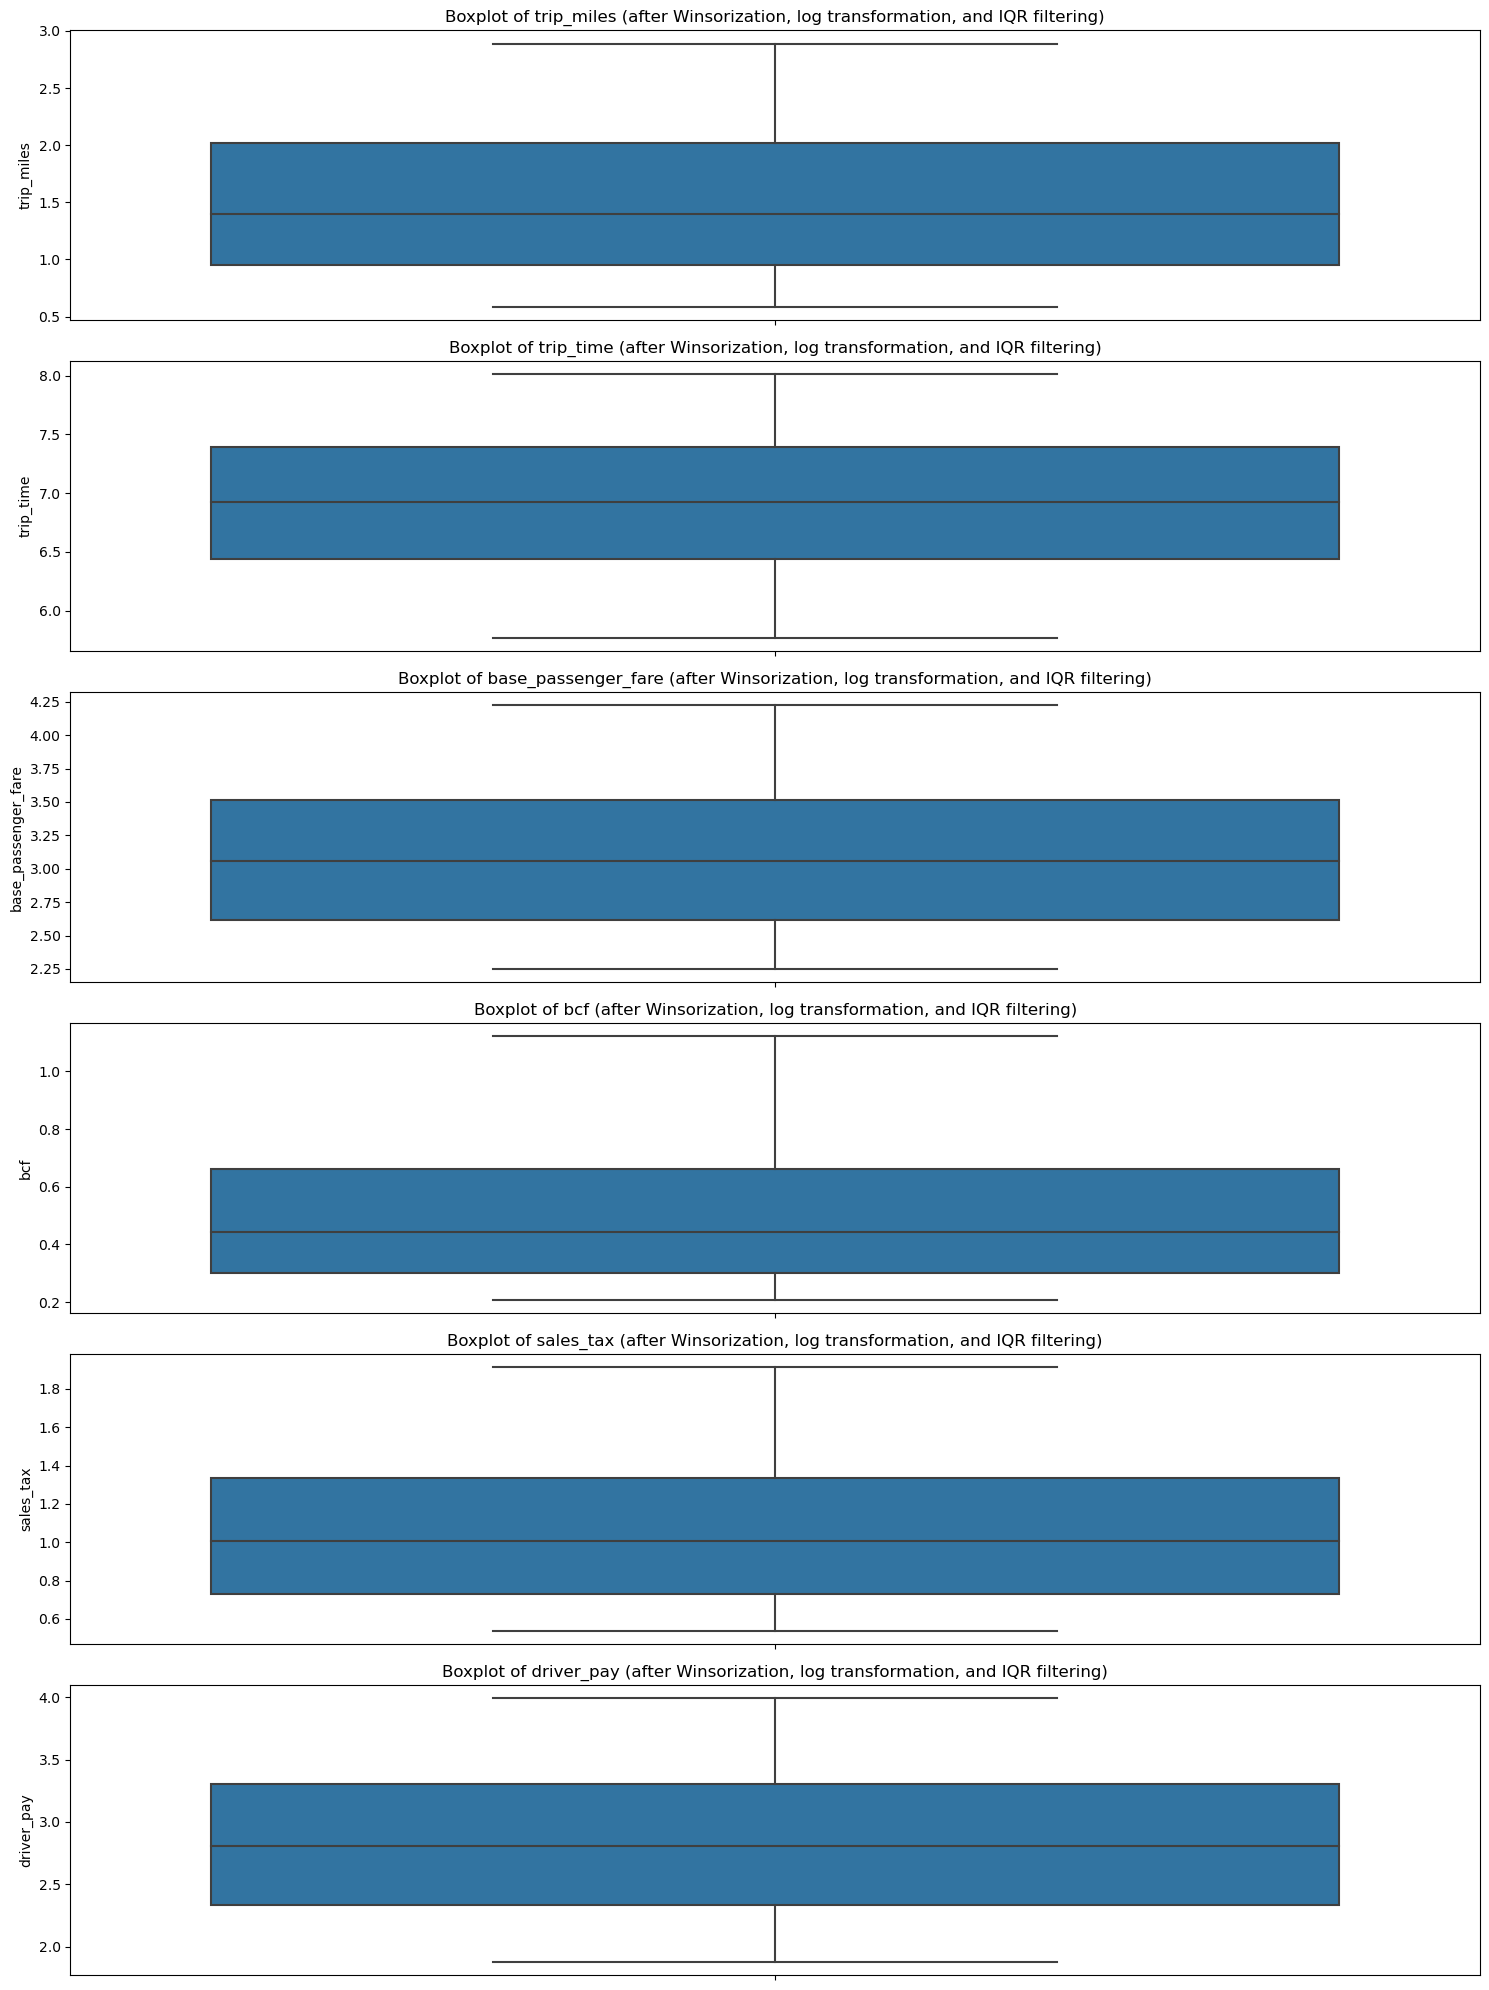

   trip_miles  estimated_emissions  emission_levels
0    2.051556           828.828761                0
1    2.302585           930.244378                0
2    2.889816          1167.485683                0
3    1.199965           484.785772                0
4    1.768150           714.332440                0


/tmp/ipykernel_5976/505792800.py:138: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = oct_new.corr()


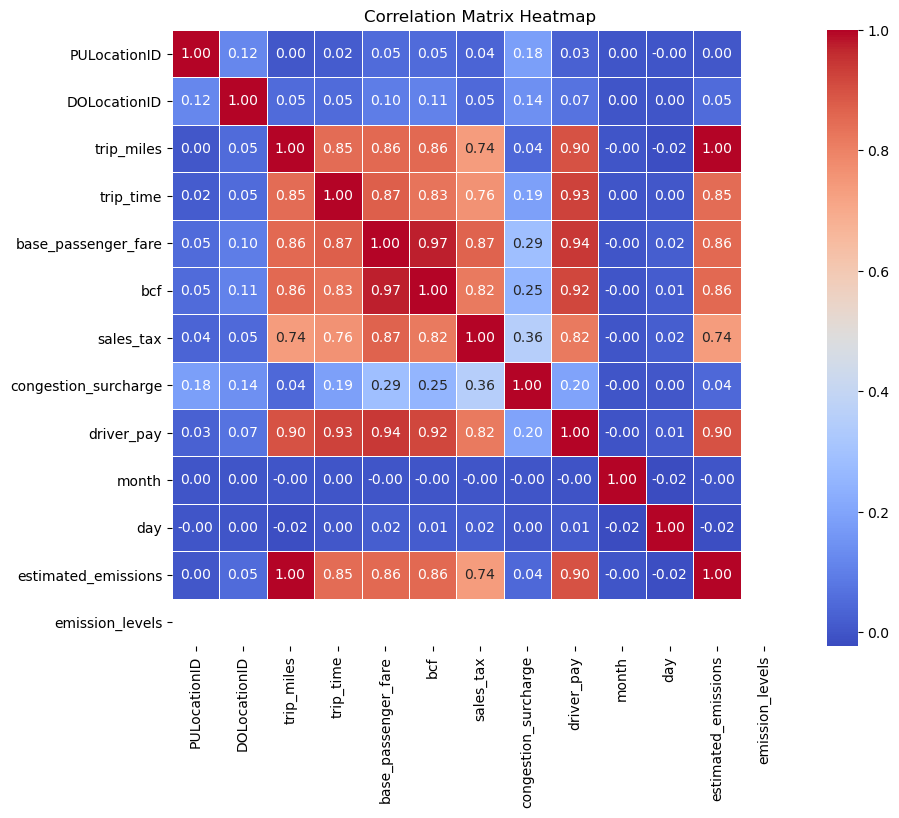

Shape of oct_df: (14372272, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:36:27   
1               B03404               B03404         00:02:41   
2               B03404               B03404         00:29:22   
3               B03404               B03404         23:57:00   
4               B03404               B03404         00:14:45   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:38:11        00:39:13         01:06:47            24   
1          00:06:24        00:07:30         00:31:52           258   
2          00:33:52        00:34:48         01:10:17           255   
3          00:03:35        00:04:04         00:14:15           256   
4          00:24:24        00:24:24         00:40:56           148   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           114    2.051556   7.411556             3.424914  0.598837   
1           255 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

oct = pd.read_parquet("Users/ekulshre/2023/fhvhv_tripdata_2023-10.parquet")
oct.head()
null_counts = oct.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = oct['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

oct_filtered = oct[~oct['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
oct_filtered = oct_filtered.drop(columns=['airport_fee'])
oct_filtered = oct_filtered.dropna(subset=['originating_base_num'])
null_counts = oct_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
oct_filtered.shape
oct_filtered.info()
oct_filtered = oct_filtered.drop(columns=['hvfhs_license_num'])
oct_filtered['date'] = oct_filtered['request_datetime'].dt.date
oct_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
oct_filtered['date'] = pd.to_datetime(oct_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
oct_filtered['request_datetime'] = pd.to_datetime(oct_filtered['request_datetime']).dt.time
oct_filtered['on_scene_datetime'] = pd.to_datetime(oct_filtered['on_scene_datetime']).dt.time
oct_filtered['pickup_datetime'] = pd.to_datetime(oct_filtered['pickup_datetime']).dt.time
oct_filtered['dropoff_datetime'] = pd.to_datetime(oct_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
oct_filtered['month'] = pd.to_datetime(oct_filtered['date']).dt.month
oct_filtered['day'] = pd.to_datetime(oct_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(oct_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(oct_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = oct_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", oct_filtered['month'].unique())

oct_filtered = oct_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag', 'tips', 'tolls'])
duplicate_count = oct_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
oct_filtered = oct_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = oct_filtered[oct_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

oct_filtered = oct_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(oct_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = oct_filtered[oct_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

oct_filtered = oct_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(oct_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare', 'bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=oct_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
oct_new = oct_filtered.copy()

for column in columns_to_process:
    oct_new[column] = winsorize(oct_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    oct_new[column] = np.log1p(oct_new[column])

for column in columns_to_process:
    Q1 = oct_new[column].quantile(0.25)
    Q3 = oct_new[column].quantile(0.75)
    IQR = Q3 - Q1
    oct_new = oct_new[(oct_new[column] >= (Q1 - 1.5 * IQR)) & (oct_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=oct_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
oct_new['estimated_emissions'] = oct_new['trip_miles'] * emission_factor
emission_threshold = 3000
oct_new['emission_levels'] = oct_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(oct_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = oct_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = oct_new['dispatching_base_num'].value_counts()
top_10_bases = oct_new['dispatching_base_num'].value_counts().head(10).index
oct_new = oct_new[oct_new['dispatching_base_num'].isin(top_10_bases)]
oct_new.shape
oct_new.head()

# Save oct_new to a new DataFrame called oct_df
oct_df = oct_new.copy()

# Display the shape and first few rows of oct_df to verify
print("Shape of oct_df:", oct_df.shape)
print(oct_df.head())


In [3]:
merge_6 = pd.concat([sep_df, oct_df], ignore_index=True)

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 6, 8, Finished, Available, Finished)

In [4]:
merge_6.to_parquet('sep_oct_2023.parquet', index=False)

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 6, 9, Finished, Available, Finished)

# Nov EDA

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 6, 10, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    5469048
request_datetime              0
on_scene_datetime       5469048
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

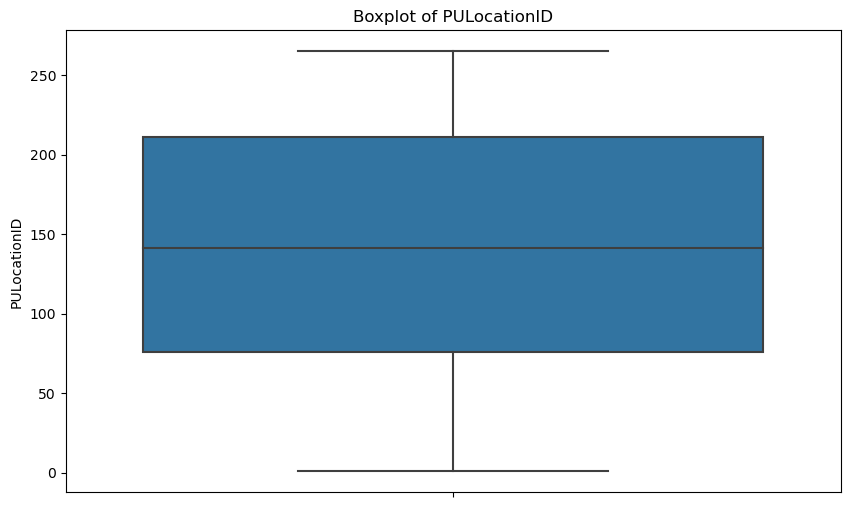

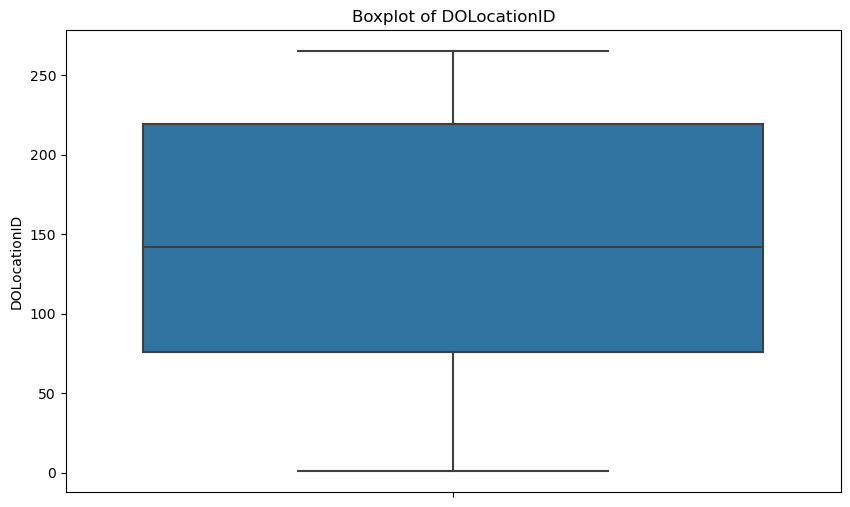

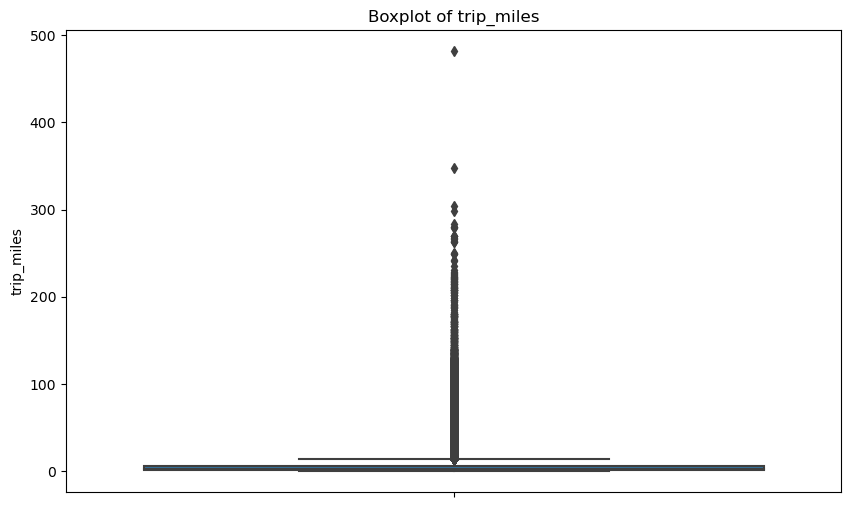

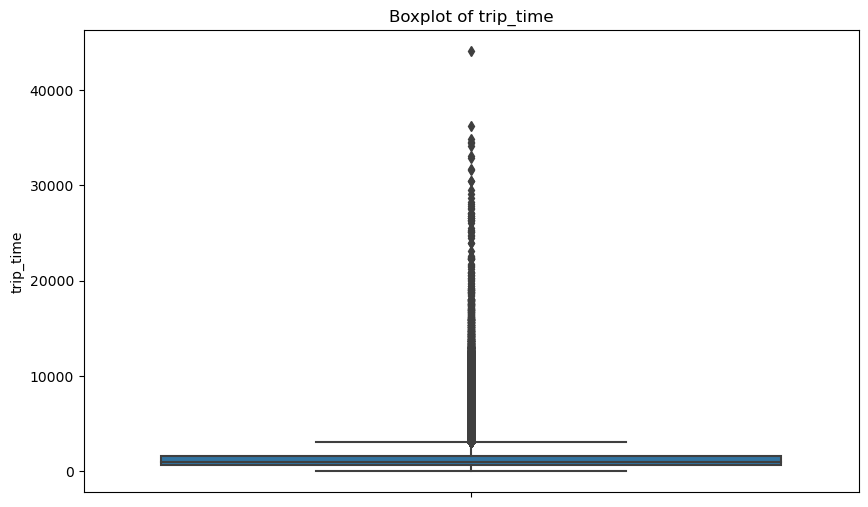

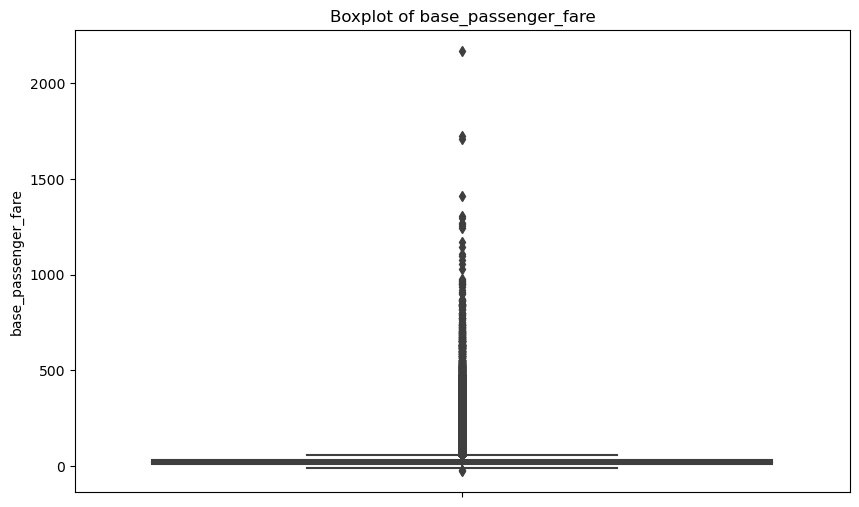

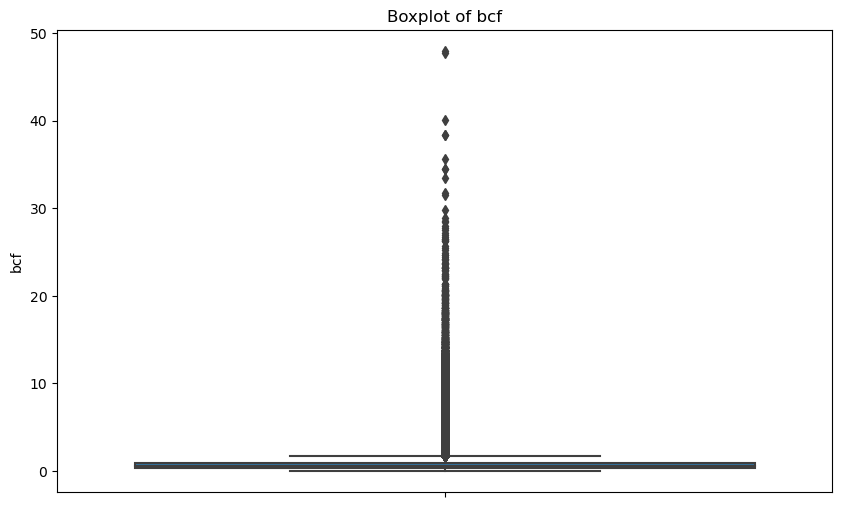

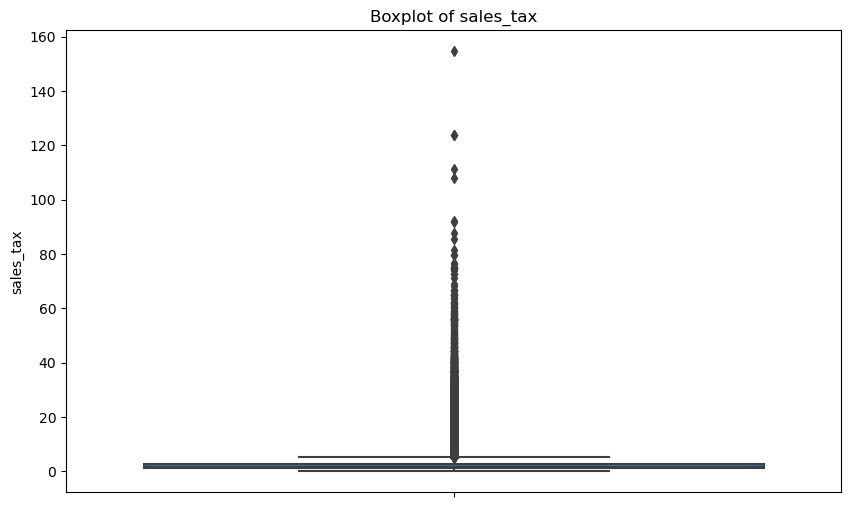

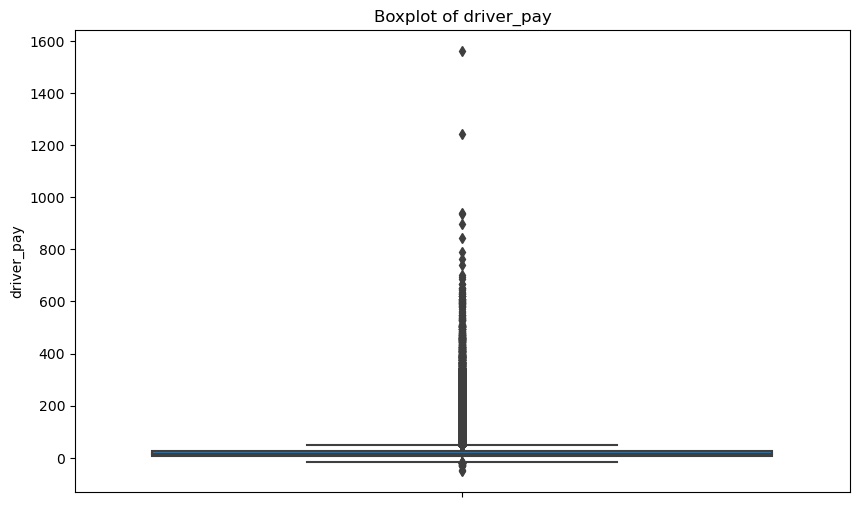

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


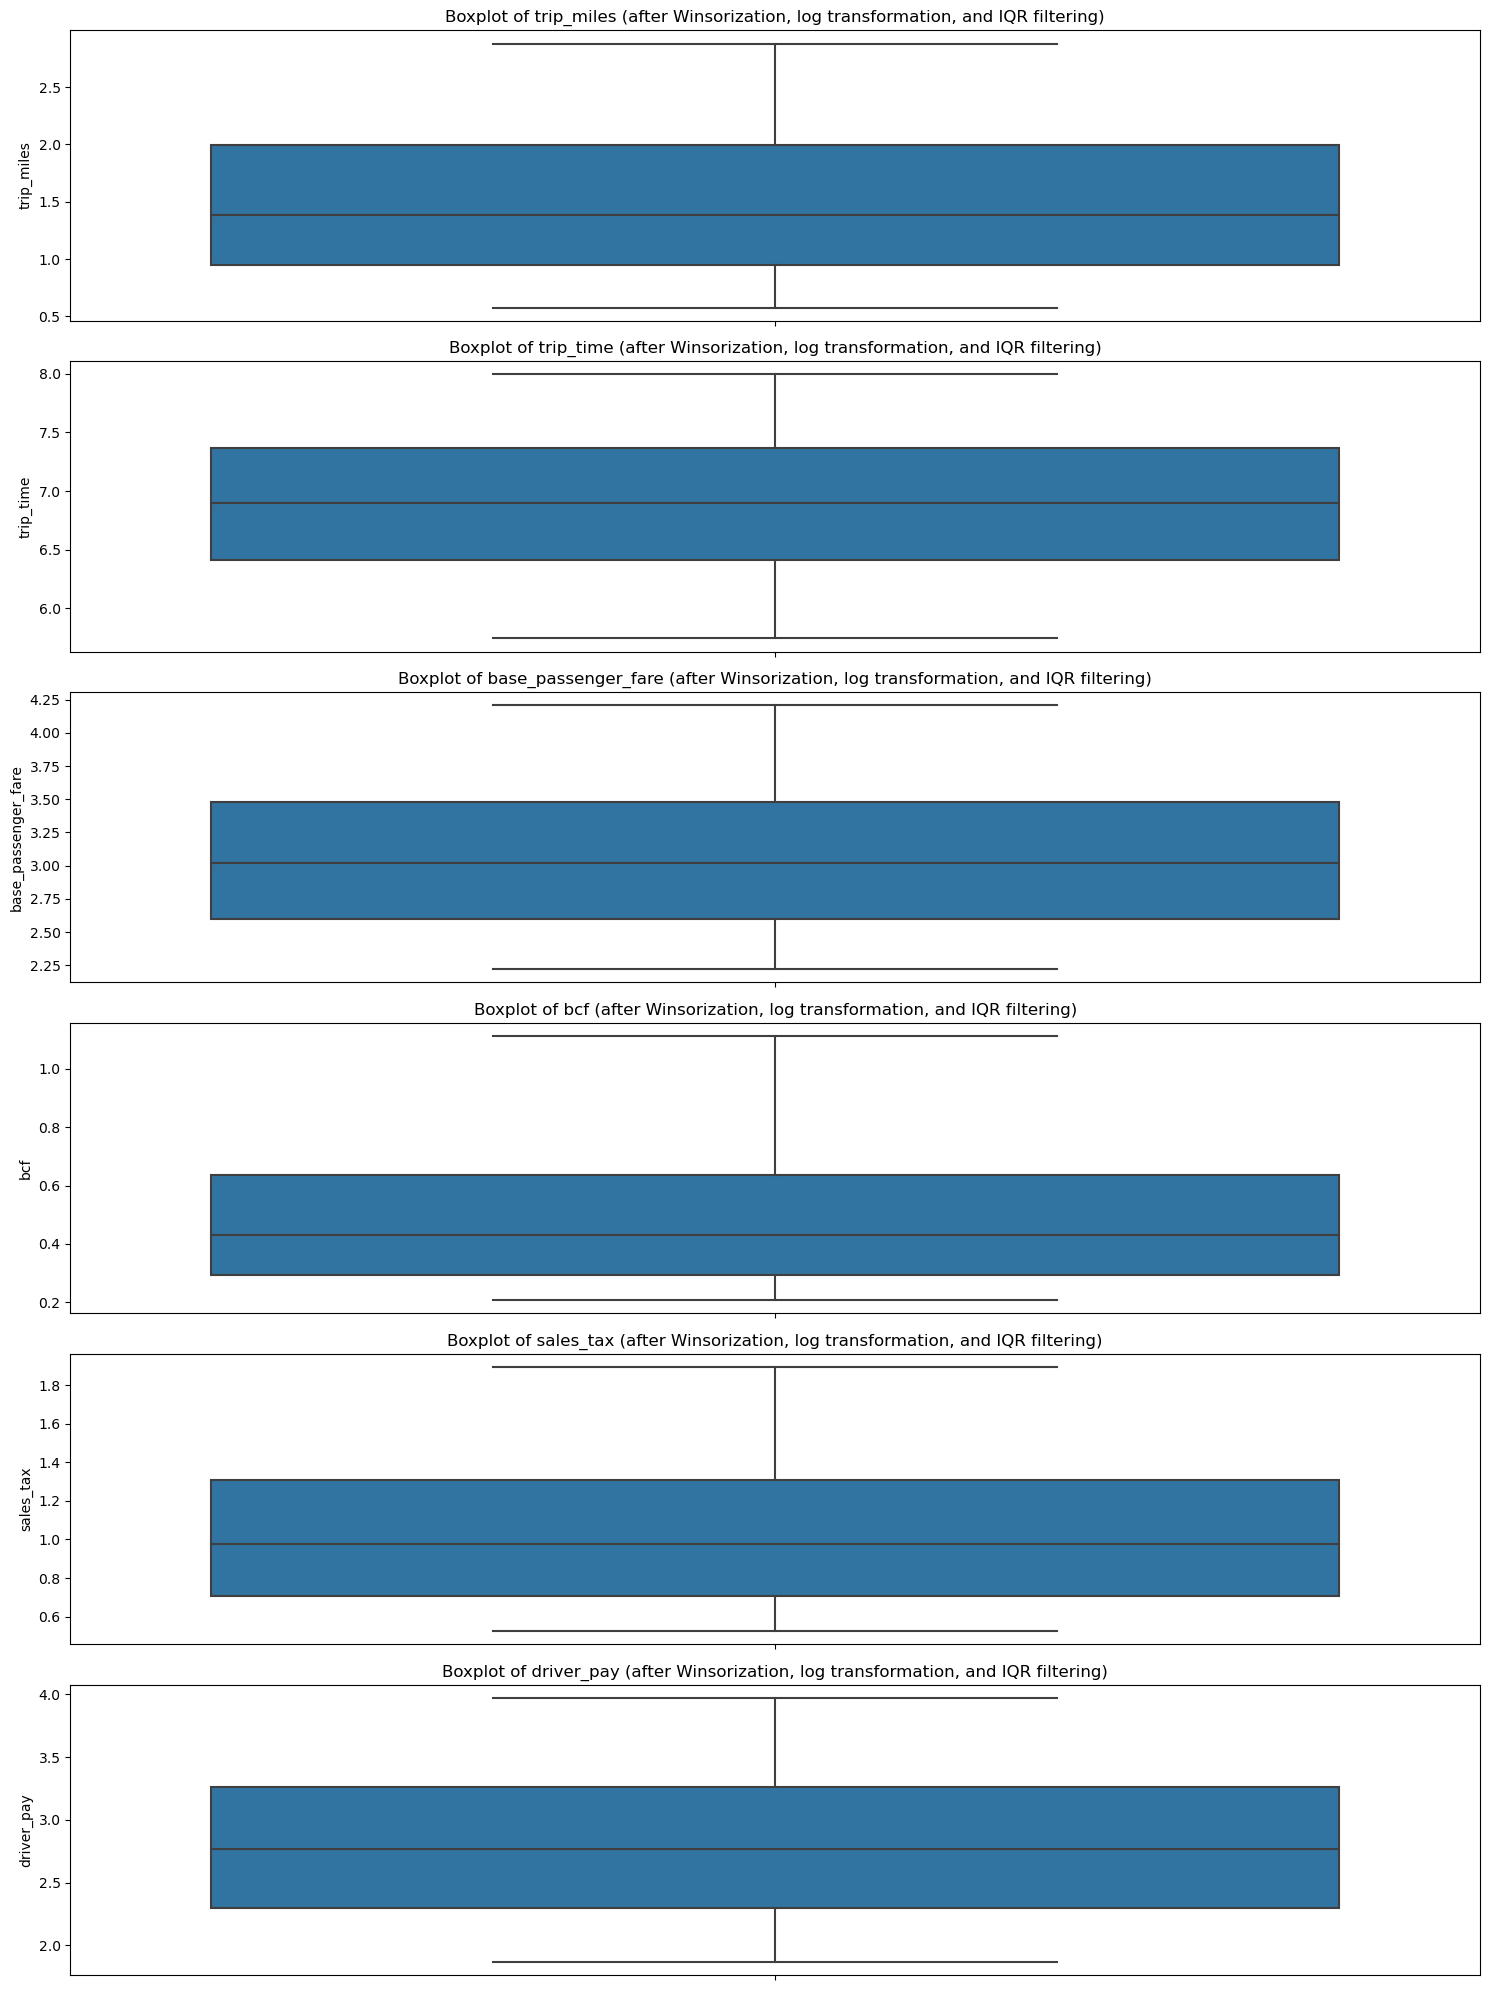

   trip_miles  estimated_emissions  emission_levels
0    0.631272           255.033798                0
1    1.832581           740.362911                0
2    0.576613           232.951799                0
3    2.481568          1002.553370                0
5    1.000632           404.255280                0


/tmp/ipykernel_5976/3854776944.py:138: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = nov_new.corr()


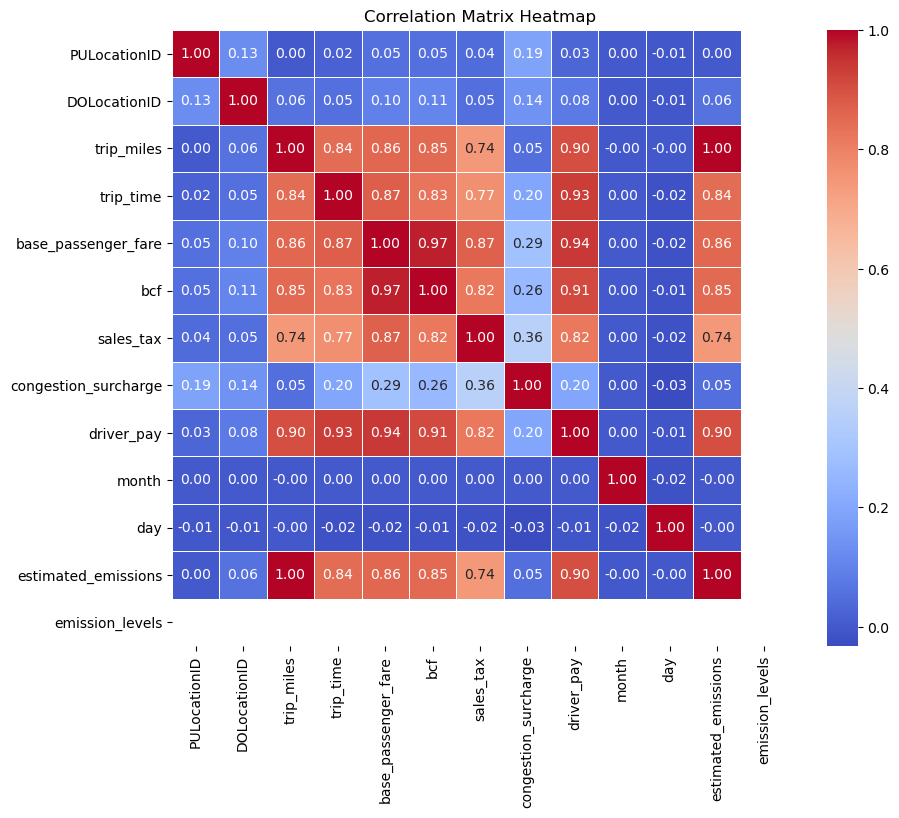

Shape of nov_df: (13787608, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:31:31   
1               B03404               B03404         00:52:22   
2               B03404               B03404         00:11:21   
3               B03404               B03404         00:38:28   
5               B03404               B03404         00:05:54   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:34:10        00:35:59         00:44:09           144   
1          00:55:07        00:56:06         01:11:42           144   
2          00:14:32        00:15:11         00:17:51           187   
3          00:41:44        00:42:19         01:15:09           107   
5          00:13:09        00:14:34         00:22:44           144   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0            79    0.631272   6.196444             3.034953  0.431782   
1            80 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

nov = pd.read_parquet("Users/ekulshre/2023/fhvhv_tripdata_2023-11.parquet")
nov.head()
null_counts = nov.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = nov['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

nov_filtered = nov[~nov['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
nov_filtered = nov_filtered.drop(columns=['airport_fee'])
nov_filtered = nov_filtered.dropna(subset=['originating_base_num'])
null_counts = nov_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
nov_filtered.shape
nov_filtered.info()
nov_filtered = nov_filtered.drop(columns=['hvfhs_license_num'])
nov_filtered['date'] = nov_filtered['request_datetime'].dt.date
nov_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
nov_filtered['date'] = pd.to_datetime(nov_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
nov_filtered['request_datetime'] = pd.to_datetime(nov_filtered['request_datetime']).dt.time
nov_filtered['on_scene_datetime'] = pd.to_datetime(nov_filtered['on_scene_datetime']).dt.time
nov_filtered['pickup_datetime'] = pd.to_datetime(nov_filtered['pickup_datetime']).dt.time
nov_filtered['dropoff_datetime'] = pd.to_datetime(nov_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
nov_filtered['month'] = pd.to_datetime(nov_filtered['date']).dt.month
nov_filtered['day'] = pd.to_datetime(nov_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(nov_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(nov_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = nov_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", nov_filtered['month'].unique())

nov_filtered = nov_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag', 'tips', 'tolls'])
duplicate_count = nov_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
nov_filtered = nov_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = nov_filtered[nov_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

nov_filtered = nov_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(nov_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = nov_filtered[nov_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

nov_filtered = nov_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(nov_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare', 'bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=nov_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
nov_new = nov_filtered.copy()

for column in columns_to_process:
    nov_new[column] = winsorize(nov_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    nov_new[column] = np.log1p(nov_new[column])

for column in columns_to_process:
    Q1 = nov_new[column].quantile(0.25)
    Q3 = nov_new[column].quantile(0.75)
    IQR = Q3 - Q1
    nov_new = nov_new[(nov_new[column] >= (Q1 - 1.5 * IQR)) & (nov_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=nov_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
nov_new['estimated_emissions'] = nov_new['trip_miles'] * emission_factor
emission_threshold = 3000
nov_new['emission_levels'] = nov_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(nov_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = nov_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = nov_new['dispatching_base_num'].value_counts()
top_10_bases = nov_new['dispatching_base_num'].value_counts().head(10).index
nov_new = nov_new[nov_new['dispatching_base_num'].isin(top_10_bases)]
nov_new.shape
nov_new.head()

# Save nov_new to a new DataFrame called nov_df
nov_df = nov_new.copy()

# Display the shape and first few rows of nov_df to verify
print("Shape of nov_df:", nov_df.shape)
print(nov_df.head())


# Dec EDA

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 6, 11, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    6229158
request_datetime              0
on_scene_datetime       6229158
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

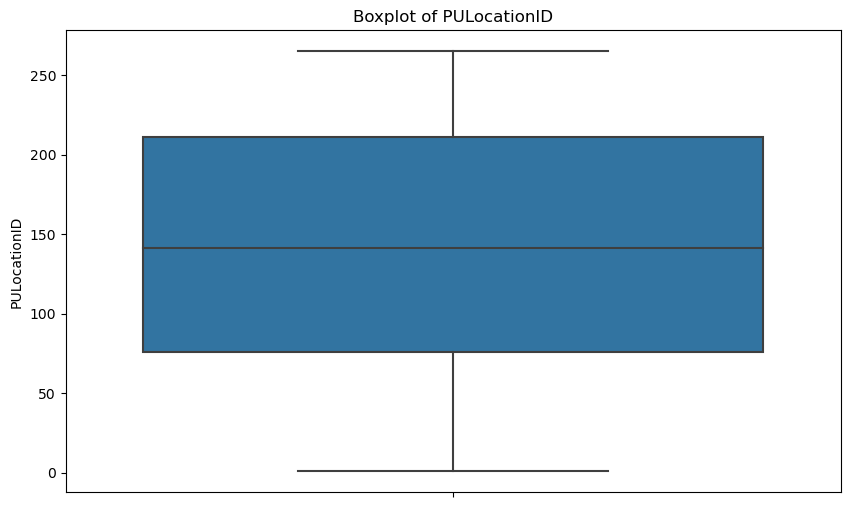

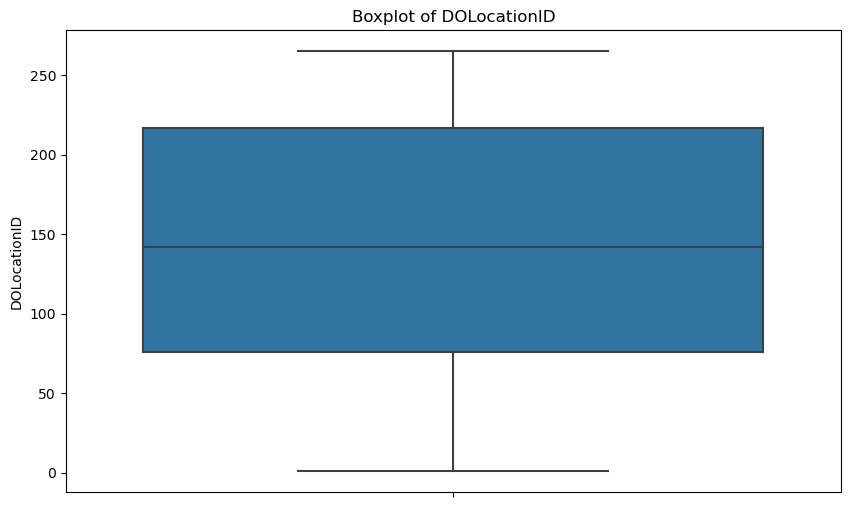

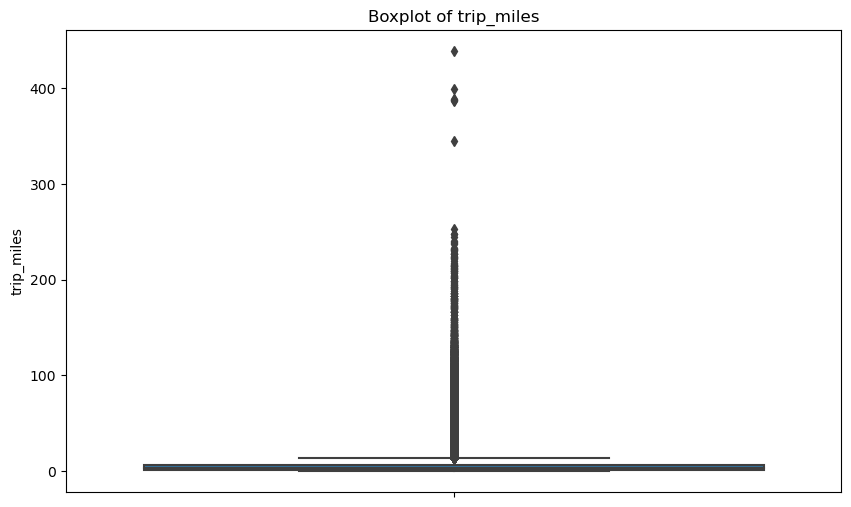

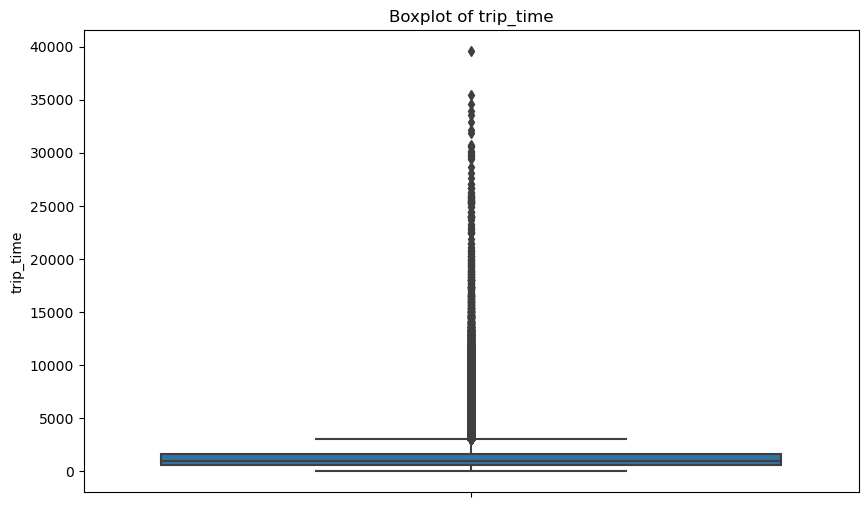

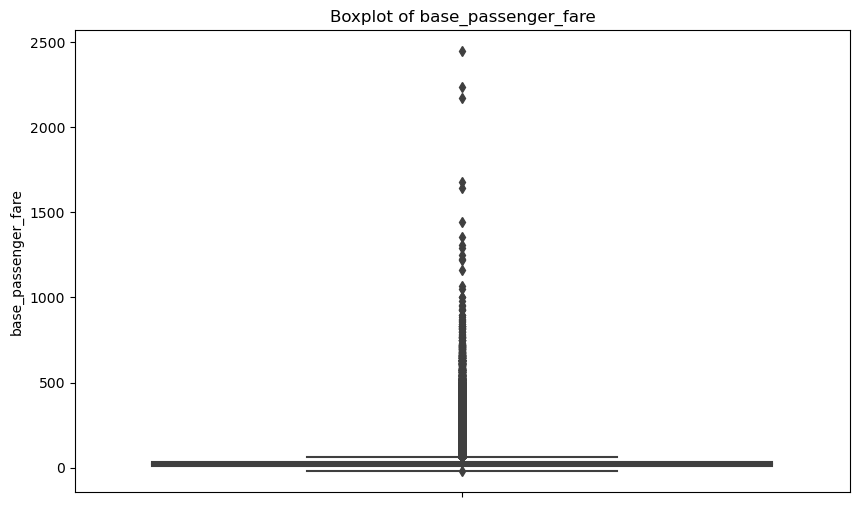

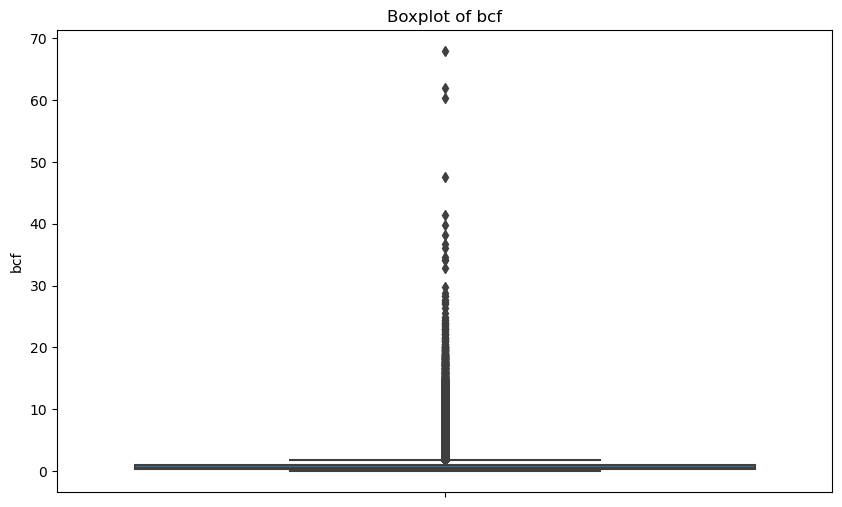

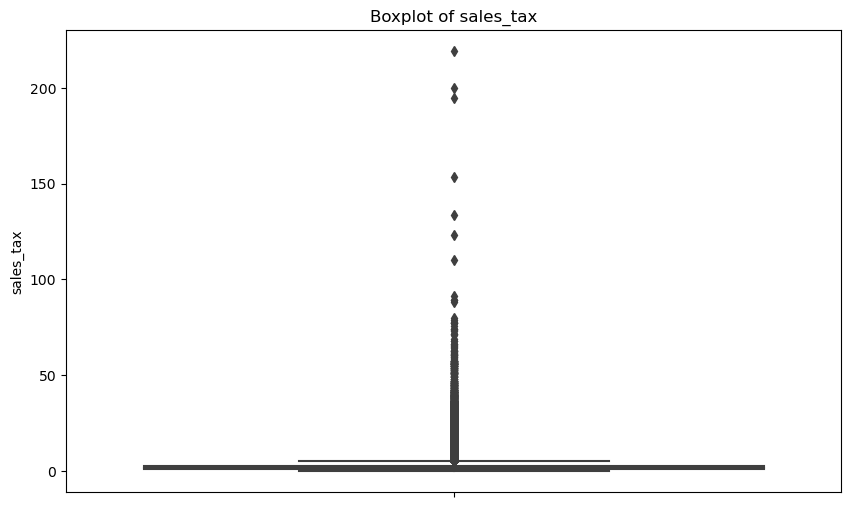

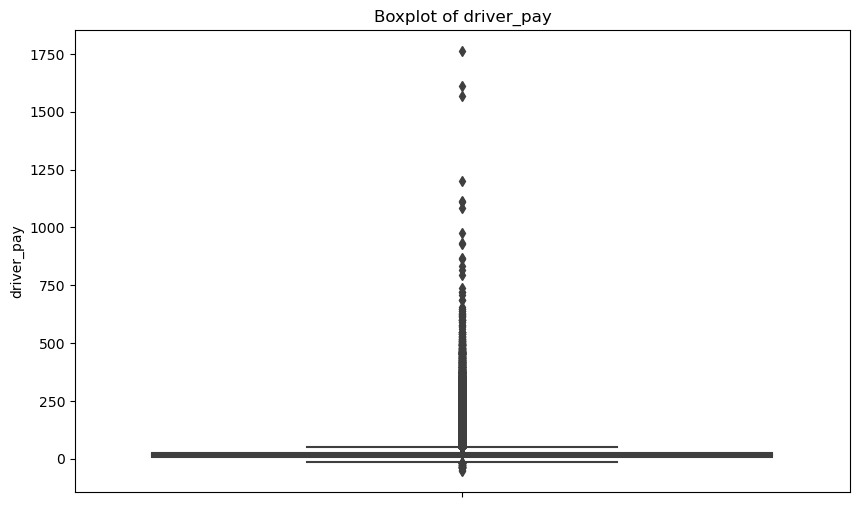

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


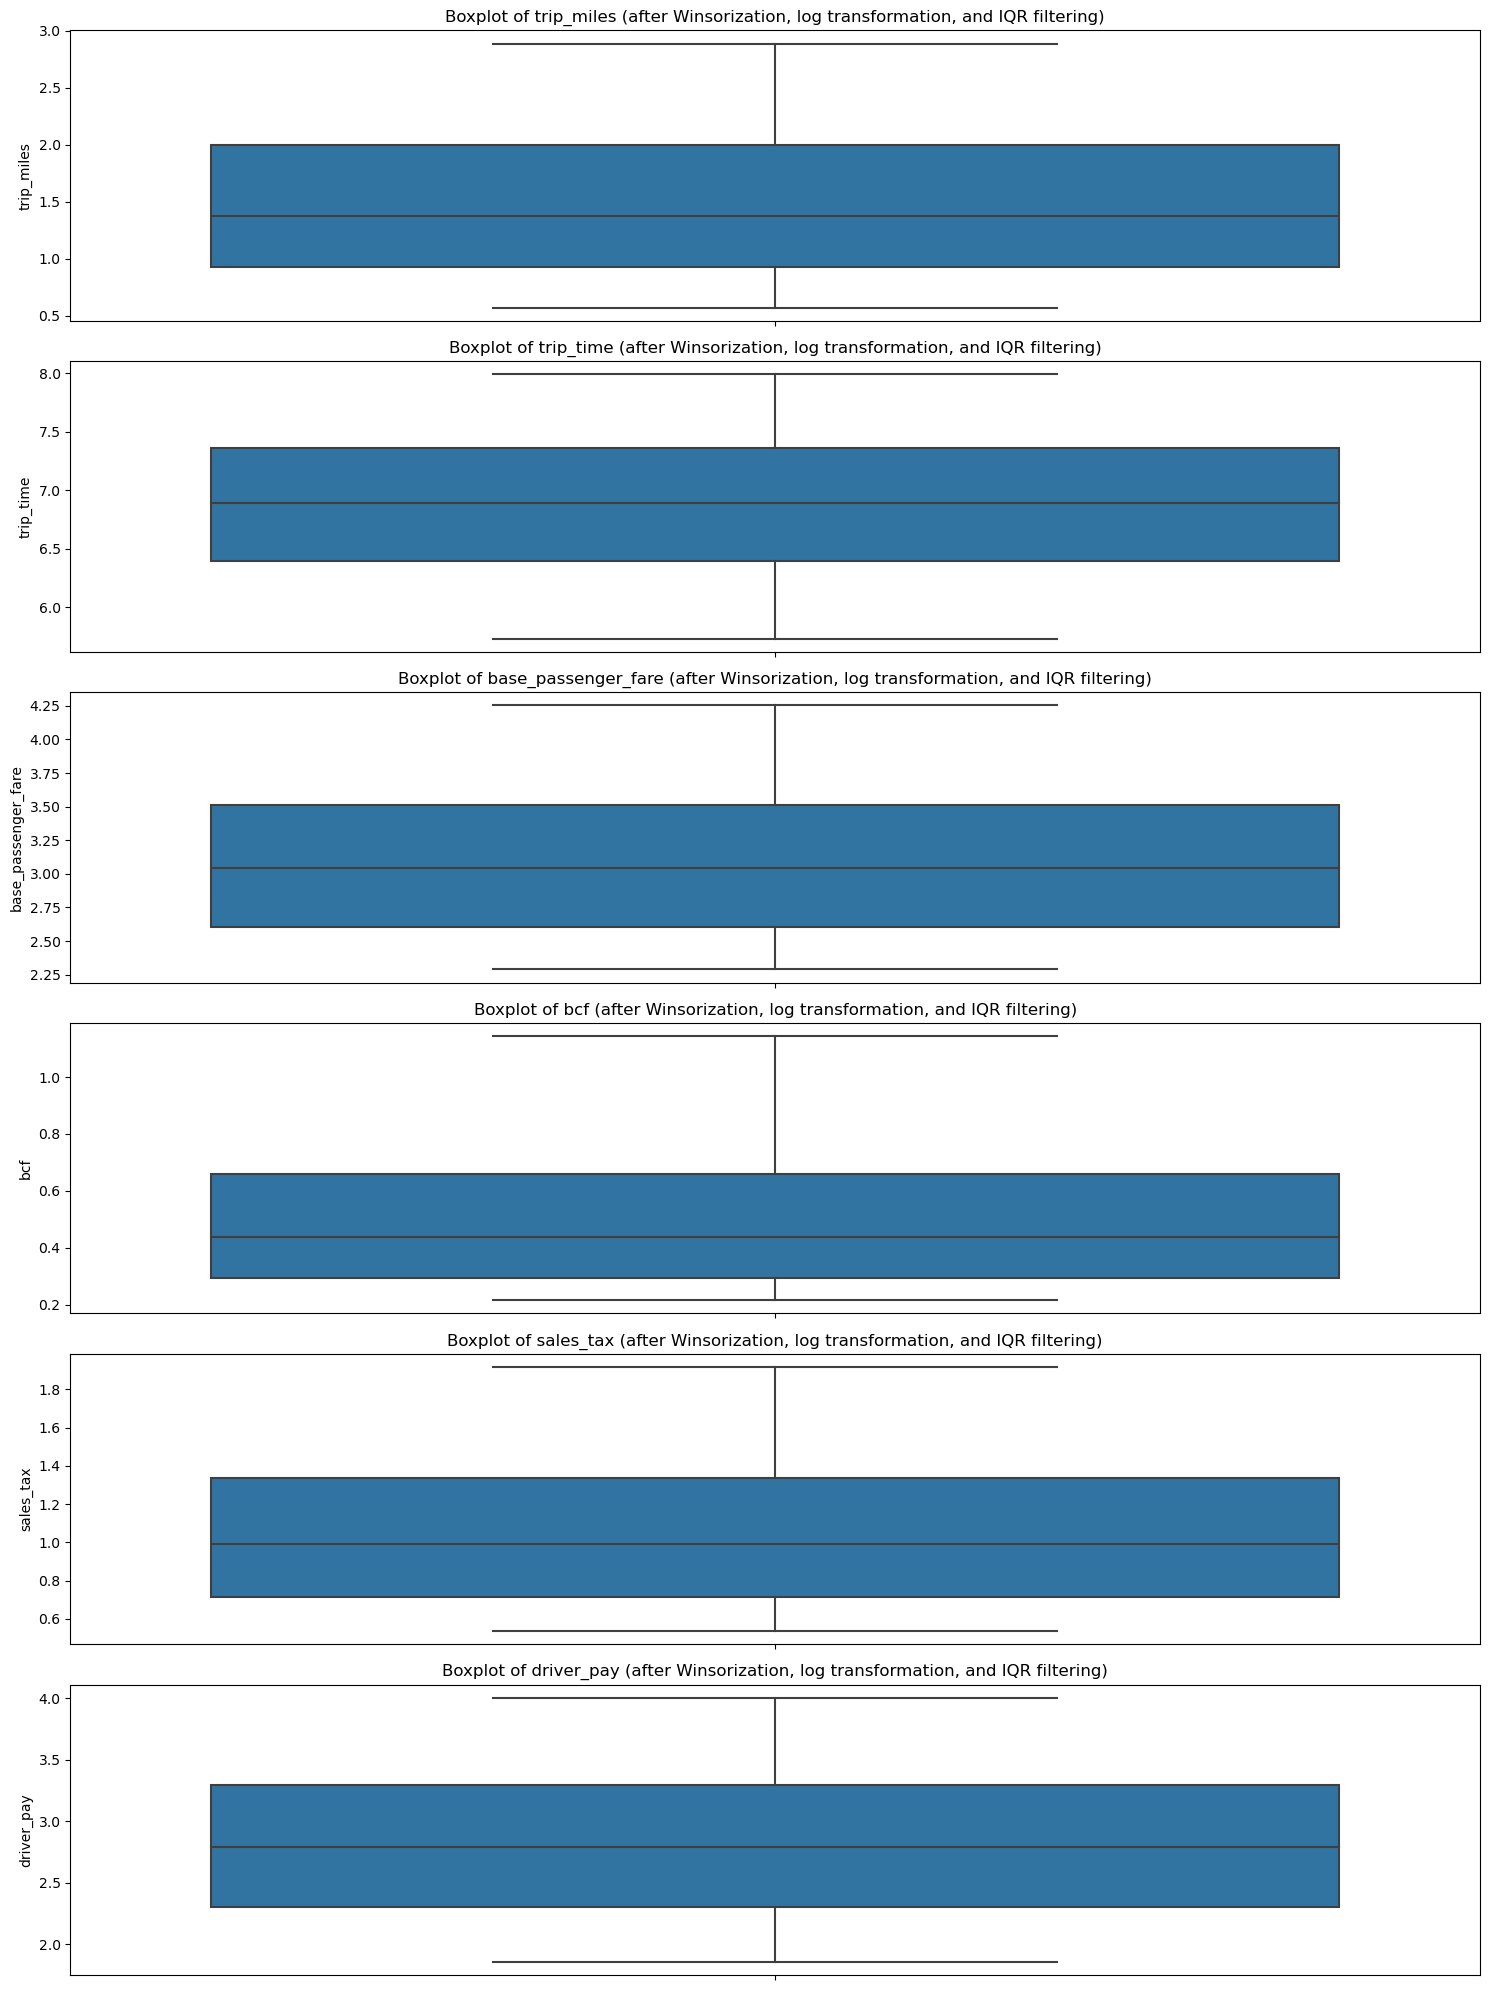

   trip_miles  estimated_emissions  emission_levels
0    1.764731           712.951242                0
1    1.108563           447.859298                0
2    2.181547           881.344893                0
3    2.731115          1103.370652                0
4    2.888704          1167.036295                0


/tmp/ipykernel_5976/1903020619.py:138: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dec_new.corr()


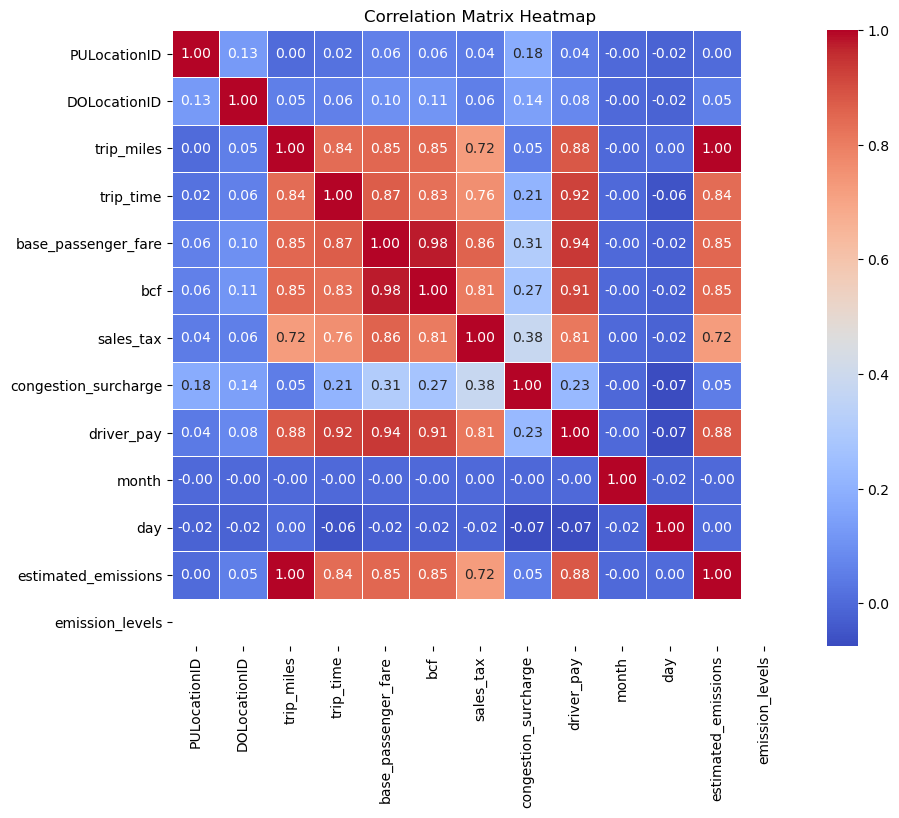

Shape of dec_df: (14273593, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         23:58:32   
1               B03404               B03404         00:37:55   
2               B03404               B03404         23:56:12   
3               B03404               B03404         00:05:59   
4               B03404               B03404         00:16:09   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:02:29        00:03:42         00:26:21            13   
1          00:43:29        00:44:37         00:54:01           163   
2          00:12:07        00:12:26         00:54:03           246   
3          00:09:35        00:10:30         00:39:52           231   
4          00:21:38        00:22:08         01:02:56           231   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           143    1.764731   7.215240             3.795040  0.788457   
1           238 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

dec = pd.read_parquet("Users/ekulshre/2023/fhvhv_tripdata_2023-12.parquet")
dec.head()
null_counts = dec.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = dec['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

dec_filtered = dec[~dec['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
dec_filtered = dec_filtered.drop(columns=['airport_fee'])
dec_filtered = dec_filtered.dropna(subset=['originating_base_num'])
null_counts = dec_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
dec_filtered.shape
dec_filtered.info()
dec_filtered = dec_filtered.drop(columns=['hvfhs_license_num'])
dec_filtered['date'] = dec_filtered['request_datetime'].dt.date
dec_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
dec_filtered['date'] = pd.to_datetime(dec_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
dec_filtered['request_datetime'] = pd.to_datetime(dec_filtered['request_datetime']).dt.time
dec_filtered['on_scene_datetime'] = pd.to_datetime(dec_filtered['on_scene_datetime']).dt.time
dec_filtered['pickup_datetime'] = pd.to_datetime(dec_filtered['pickup_datetime']).dt.time
dec_filtered['dropoff_datetime'] = pd.to_datetime(dec_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
dec_filtered['month'] = pd.to_datetime(dec_filtered['date']).dt.month
dec_filtered['day'] = pd.to_datetime(dec_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(dec_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(dec_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = dec_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", dec_filtered['month'].unique())

dec_filtered = dec_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag', 'tips', 'tolls'])
duplicate_count = dec_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
dec_filtered = dec_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = dec_filtered[dec_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

dec_filtered = dec_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(dec_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = dec_filtered[dec_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

dec_filtered = dec_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(dec_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare', 'bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=dec_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
dec_new = dec_filtered.copy()

for column in columns_to_process:
    dec_new[column] = winsorize(dec_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    dec_new[column] = np.log1p(dec_new[column])

for column in columns_to_process:
    Q1 = dec_new[column].quantile(0.25)
    Q3 = dec_new[column].quantile(0.75)
    IQR = Q3 - Q1
    dec_new = dec_new[(dec_new[column] >= (Q1 - 1.5 * IQR)) & (dec_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=dec_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
dec_new['estimated_emissions'] = dec_new['trip_miles'] * emission_factor
emission_threshold = 3000
dec_new['emission_levels'] = dec_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(dec_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = dec_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = dec_new['dispatching_base_num'].value_counts()
top_10_bases = dec_new['dispatching_base_num'].value_counts().head(10).index
dec_new = dec_new[dec_new['dispatching_base_num'].isin(top_10_bases)]
dec_new.shape
dec_new.head()

# Save dec_new to a new DataFrame called dec_df
dec_df = dec_new.copy()

# Display the shape and first few rows of dec_df to verify
print("Shape of dec_df:", dec_df.shape)
print(dec_df.head())


In [7]:
merge_7 = pd.concat([nov_df, dec_df], ignore_index=True)

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 6, 12, Finished, Available, Finished)

In [8]:
merge_7.to_parquet('nov_dec_2023.parquet', index=False)

StatementMeta(8ee8700f-7691-43ee-8647-5b313b0334c2, 6, 13, Finished, Available, Finished)

In [ ]:
import pandas as pd

# Assuming jab_df, feb_df, ..., dec_df are already defined
merged_2020 = pd.concat([jan_df, feb_df, mar_df, april_df, may_df, june_df, july_df, aug_df, sep_df, oct_df, nov_df, dec_df], ignore_index=True)


StatementMeta(, , , Cancelled, , Cancelled)